## Exercise: The Boids

### Flocking


> The aggregate motion of a flock of birds, a herd of land animals, or a school of fish is a beautiful and familiar
part of the natural world... The aggregate motion of the simulated flock is created by a distributed behavioral model much
like that at work in a natural flock; the birds choose their own course. Each simulated bird is implemented as an independent
actor that navigates according to its local perception of the dynamic environment, the laws of simulated physics that rule its
motion, and a set of behaviors programmed into it... The aggregate motion of the simulated flock is the result of the
dense interaction of the relatively simple behaviors of the individual simulated birds. 

-- Craig W. Reynolds, "Flocks, Herds, and Schools: A Distributed Behavioral Model", *Computer Graphics* **21** _4_ 1987, pp 25-34
See the [original paper](http://www.cs.toronto.edu/~dt/siggraph97-course/cwr87/)


### Boids


* Collision Avoidance: avoid collisions with nearby flockmates
* Velocity Matching: attempt to match velocity with nearby flockmates
* Flock Centering: attempt to stay close to nearby flockmates


### Bad_Boids


I have written some _very bad_ code implementing Boids, based on [Konrad Parker's](http://www.kfish.org/) pseudocode.

Here's the [Github link](https://github.com/jamespjh/bad-boids).

Please fork it on GitHub, and clone your fork.


``` bash
git clone     git@github.com:yourname/bad-boids.git 
# OR git clone https://github.com/yourname/bad-boids.git
```

In [1]:
from JSAnimation import IPython_display

For the Exercise, you should start from the GitHub repository, but here's my terrible code:

In [2]:
"""
A deliberately bad implementation of [Boids](http://dl.acm.org/citation.cfm?doid=37401.37406)
for use as an exercise on refactoring.
"""

from matplotlib import pyplot as plt
from matplotlib import animation

import random

# Deliberately terrible code for teaching purposes

boids_x=[random.uniform(-450,50.0) for x in range(50)]
boids_y=[random.uniform(300.0,600.0) for x in range(50)]
boid_x_velocities=[random.uniform(0,10.0) for x in range(50)]
boid_y_velocities=[random.uniform(-20.0,20.0) for x in range(50)]
boids=(boids_x,boids_y,boid_x_velocities,boid_y_velocities)

def update_boids(boids):
    xs,ys,xvs,yvs=boids
    # Fly towards the middle
    for i in range(len(xs)):
        for j in range(len(xs)):
            xvs[i]=xvs[i]+(xs[j]-xs[i])*0.01/len(xs)
    for i in range(len(xs)):
        for j in range(len(xs)):
            yvs[i]=yvs[i]+(ys[j]-ys[i])*0.01/len(xs)
    # Fly away from nearby boids
    for i in range(len(xs)):
        for j in range(len(xs)):
            if (xs[j]-xs[i])**2 + (ys[j]-ys[i])**2 < 100:
                xvs[i]=xvs[i]+(xs[i]-xs[j])
                yvs[i]=yvs[i]+(ys[i]-ys[j])
    # Try to match speed with nearby boids
    for i in range(len(xs)):
        for j in range(len(xs)):
            if (xs[j]-xs[i])**2 + (ys[j]-ys[i])**2 < 10000:
                xvs[i]=xvs[i]+(xvs[j]-xvs[i])*0.125/len(xs)
                yvs[i]=yvs[i]+(yvs[j]-yvs[i])*0.125/len(xs)
    # Move according to velocities
    for i in range(len(xs)):
        xs[i]=xs[i]+xvs[i]
        ys[i]=ys[i]+yvs[i]


figure=plt.figure()
axes=plt.axes(xlim=(-500,1500), ylim=(-500,1500))
scatter=axes.scatter(boids[0],boids[1])

def animate(frame):
   update_boids(boids)
   scatter.set_offsets(zip(boids[0],boids[1]))


anim = animation.FuncAnimation(figure, animate,
                               frames=200, interval=50)

### Look at the birdies!


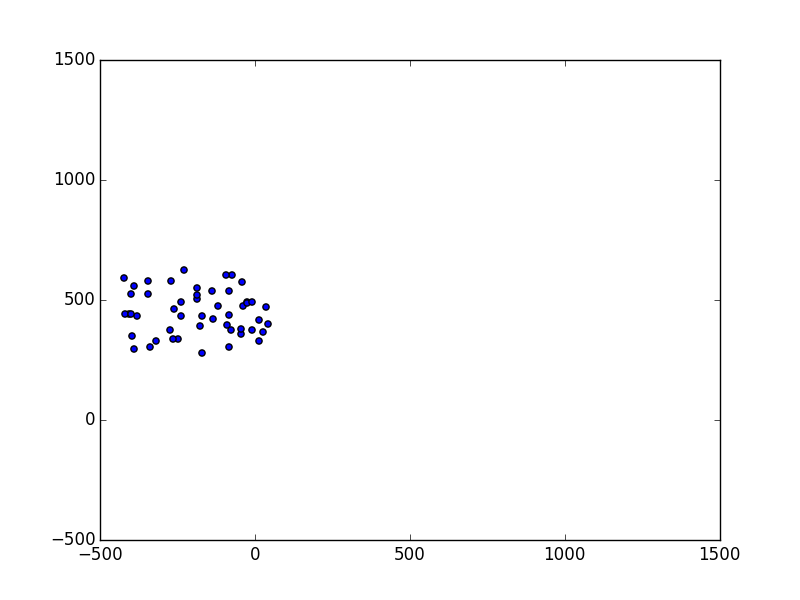
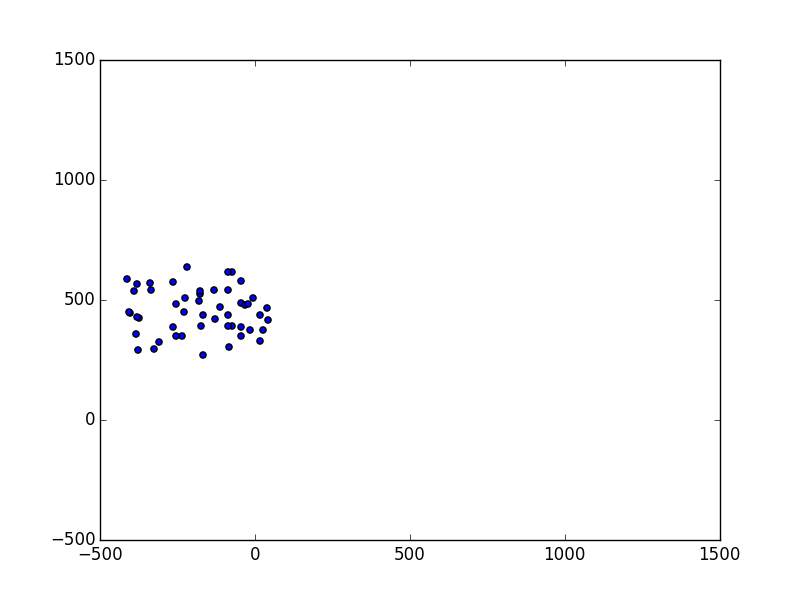
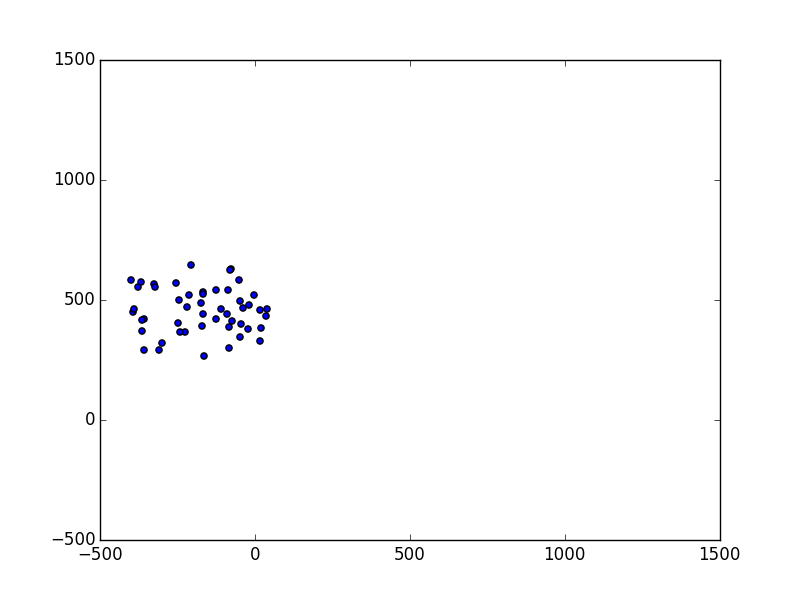
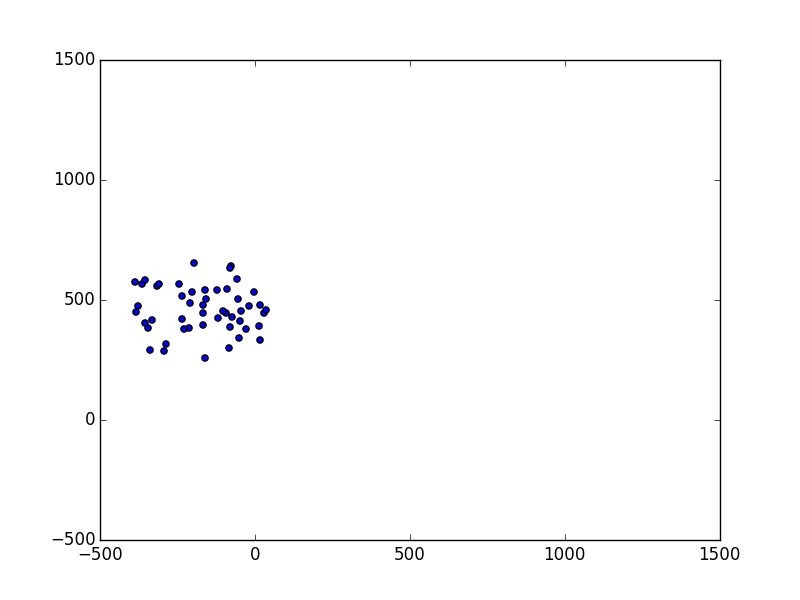
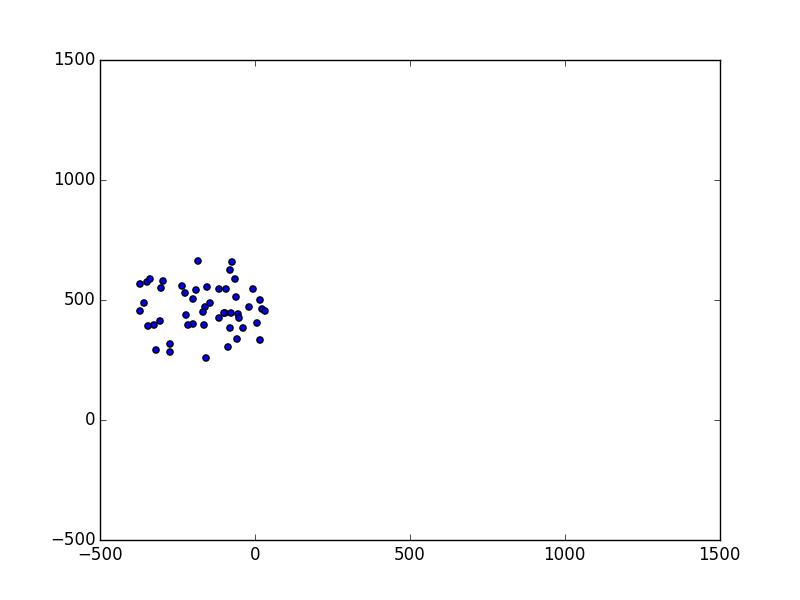
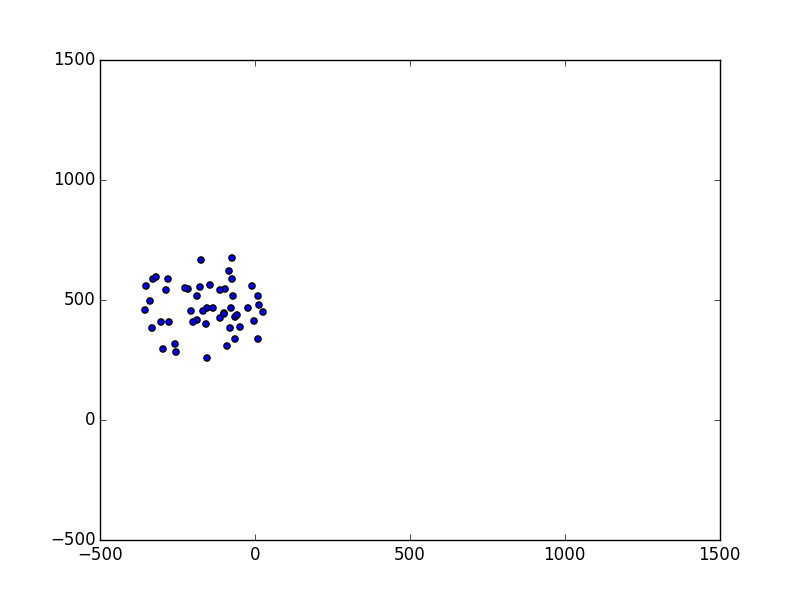
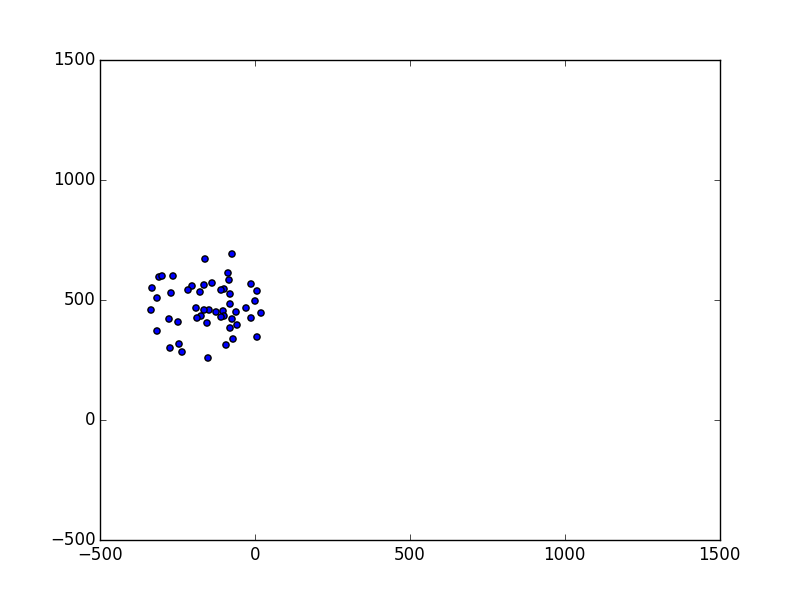
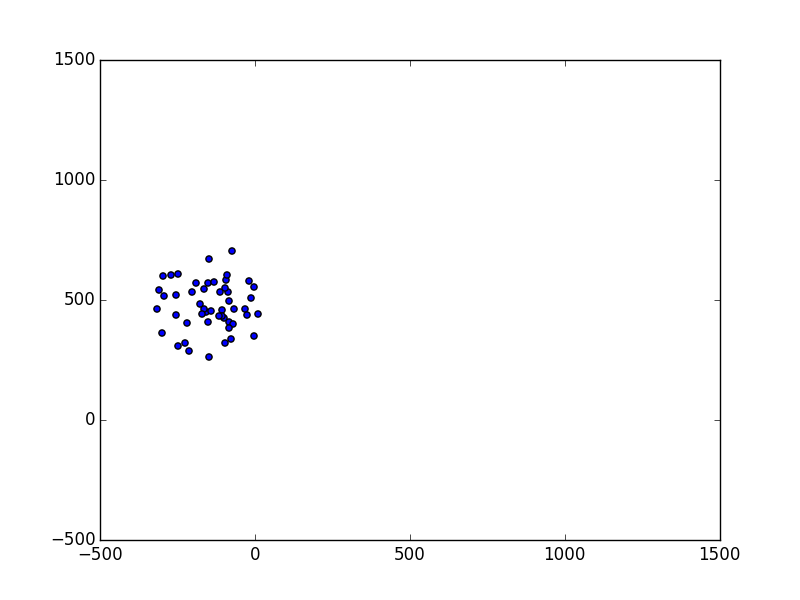
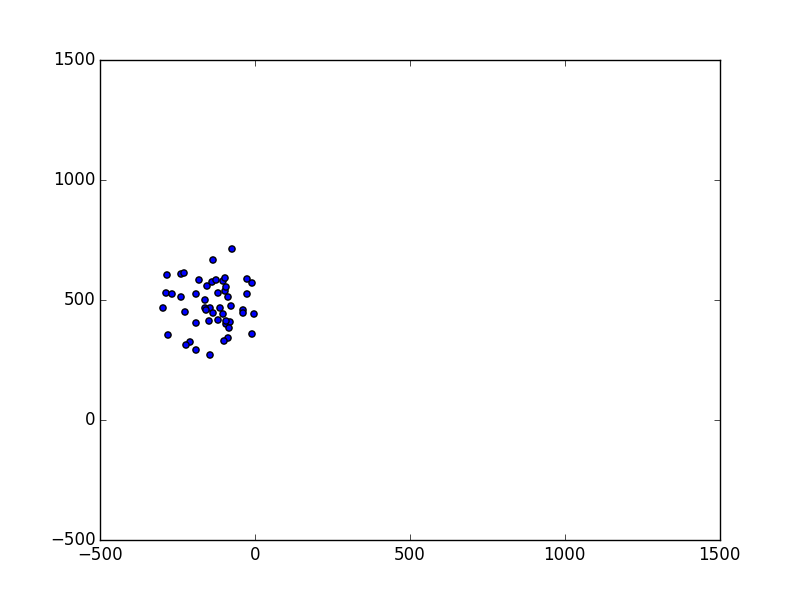
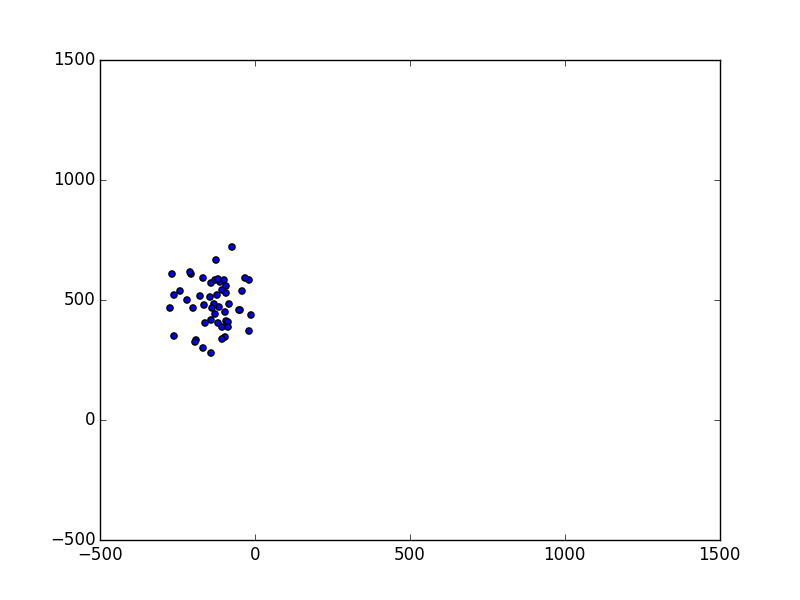
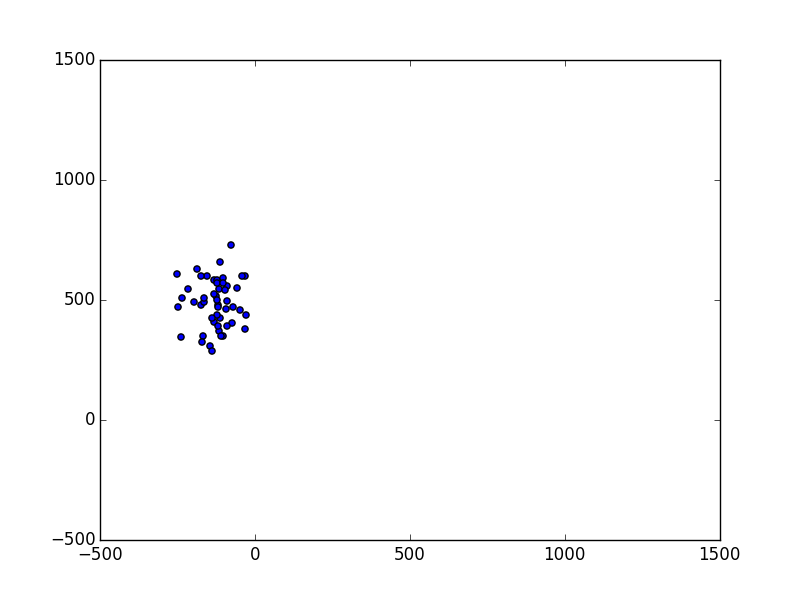
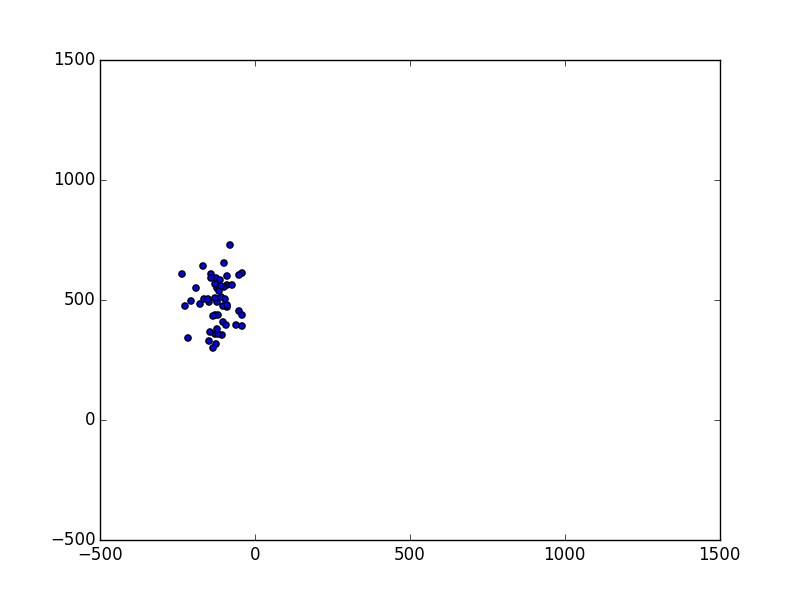
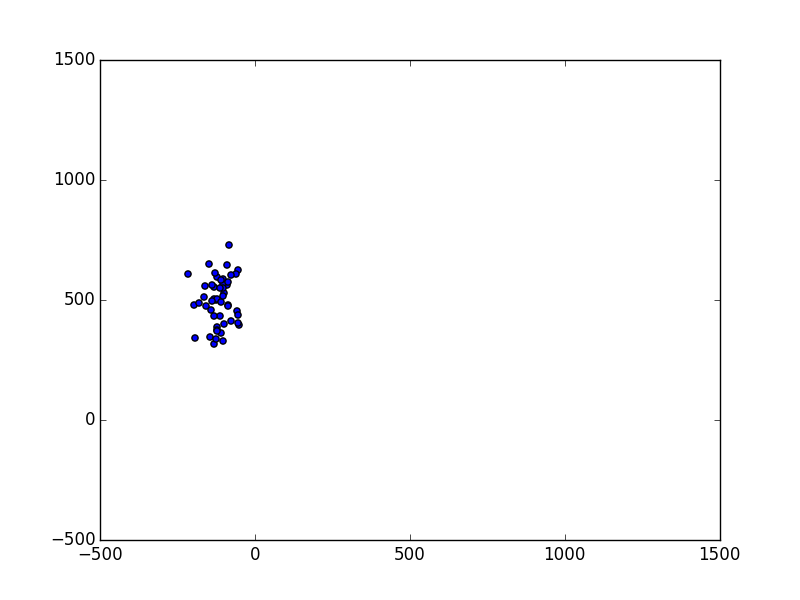
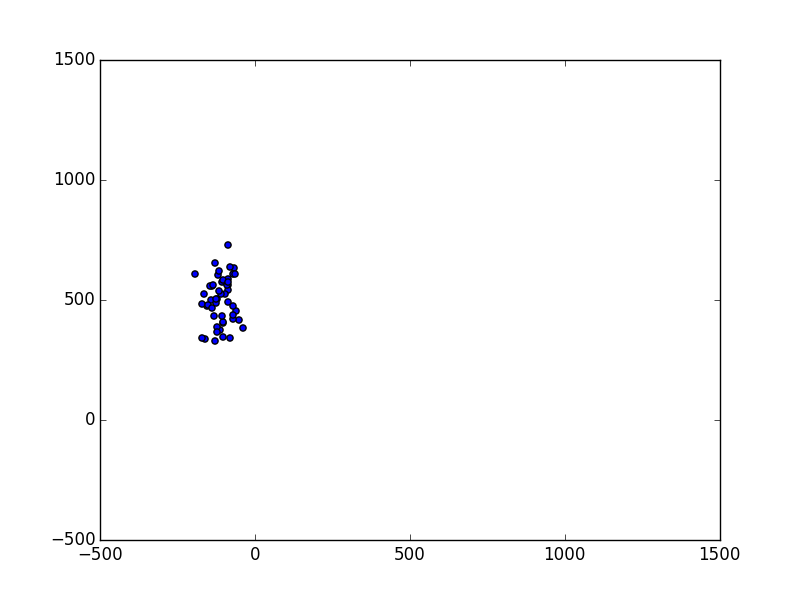
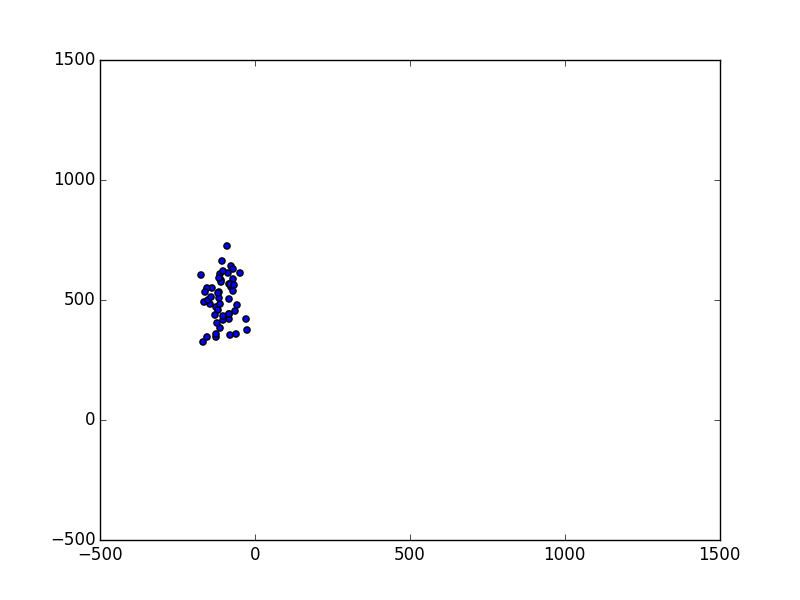
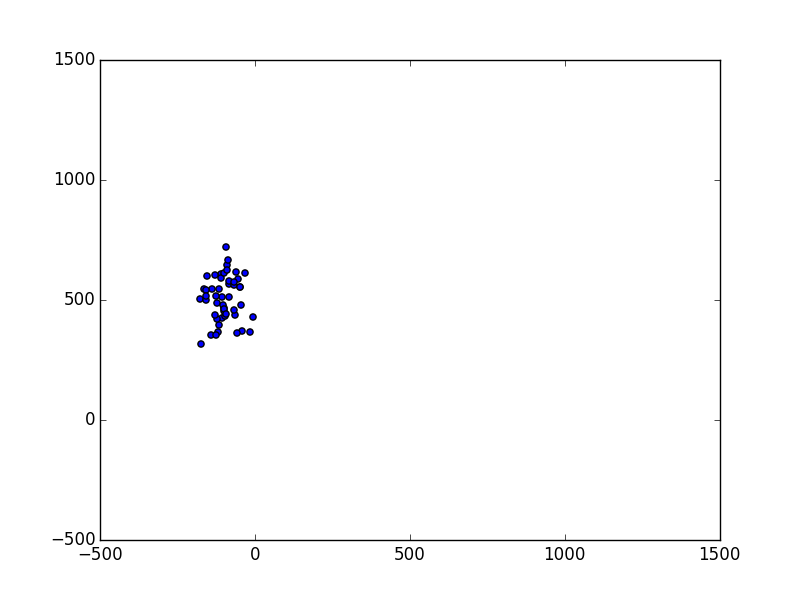
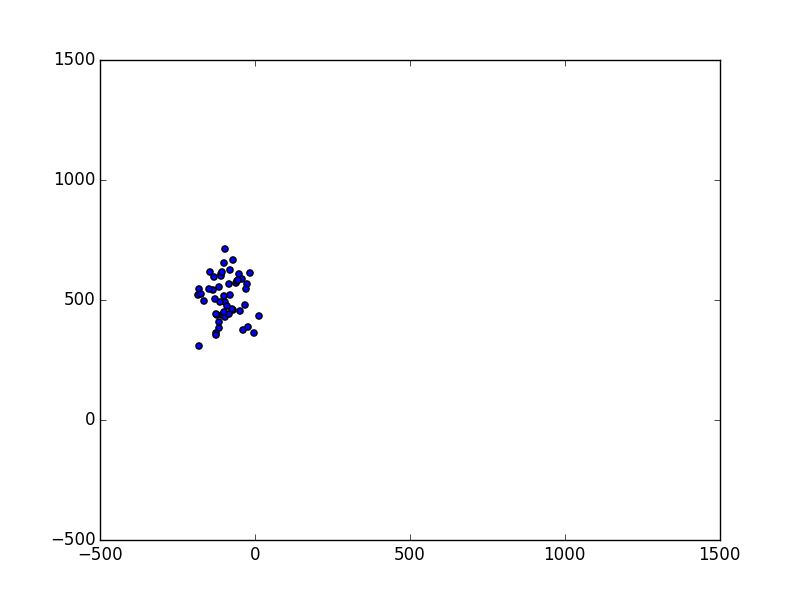
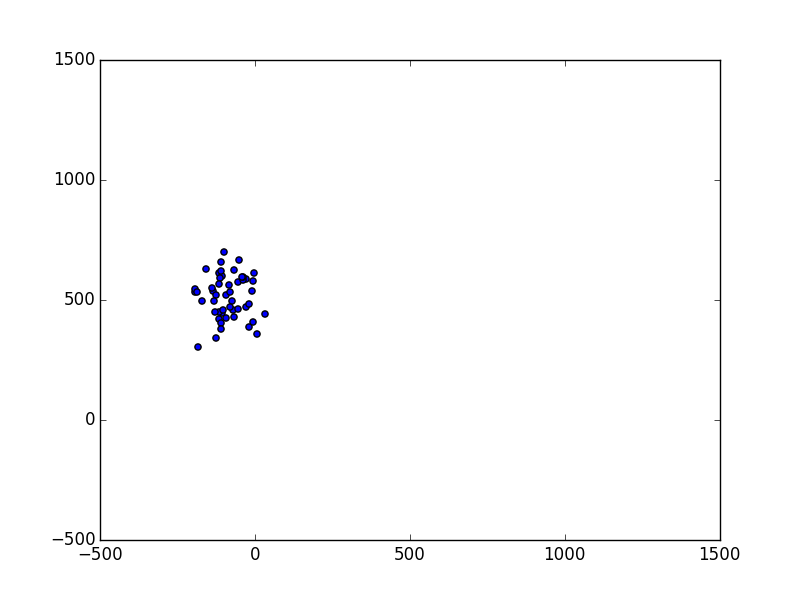
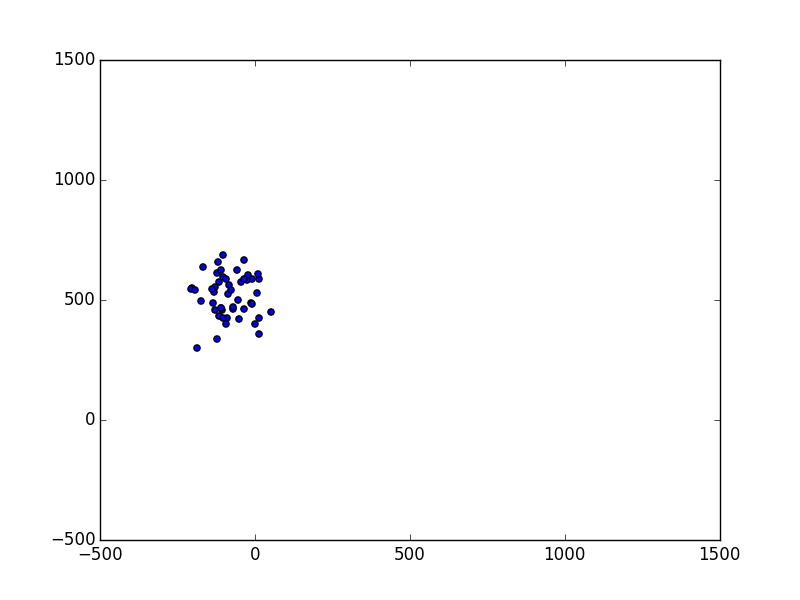
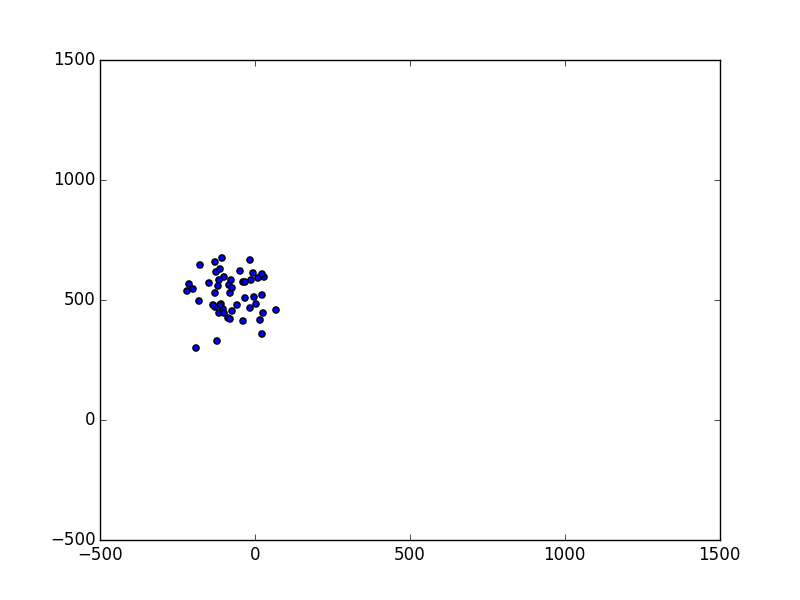
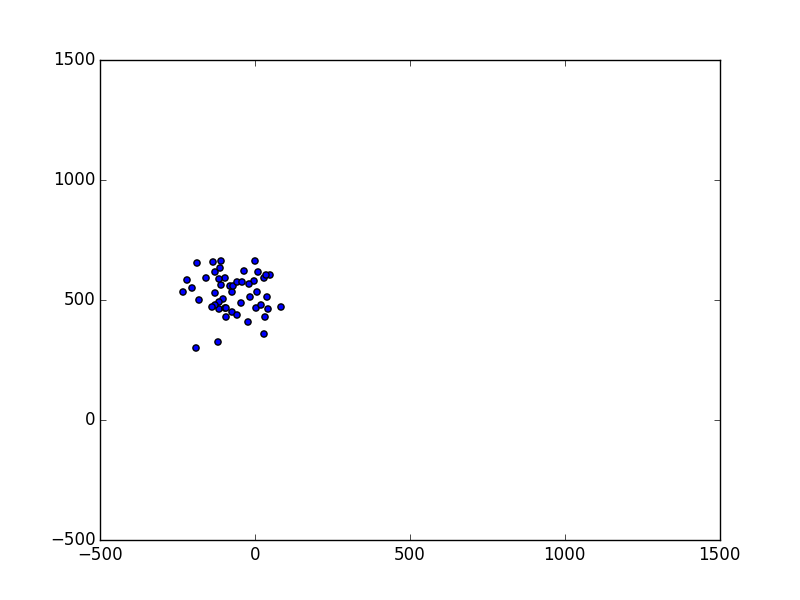
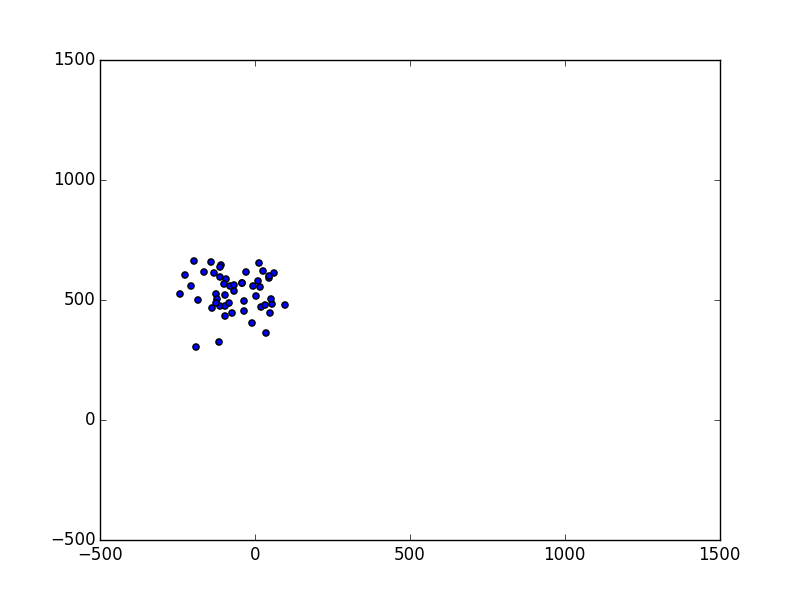
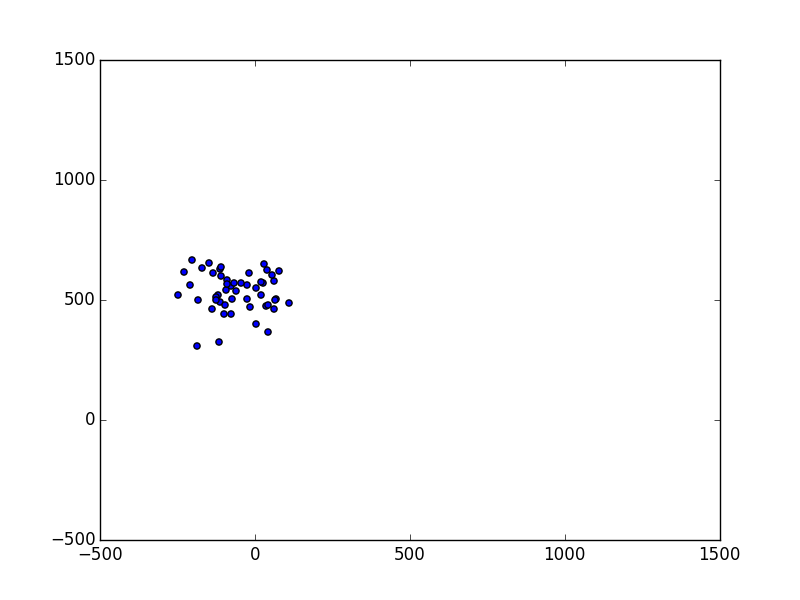
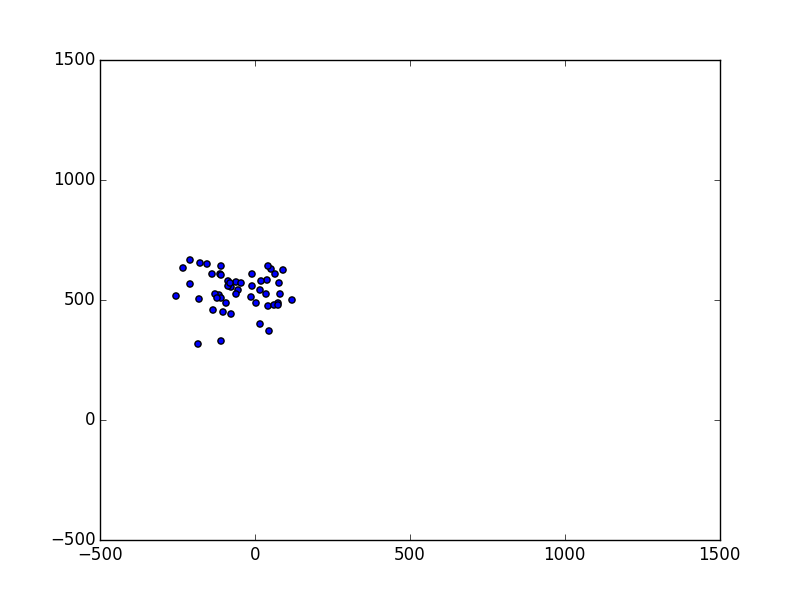
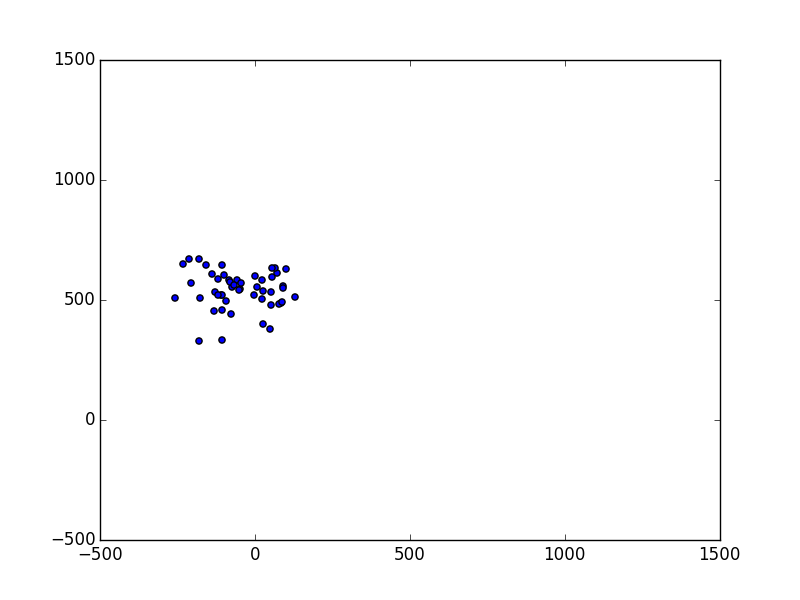
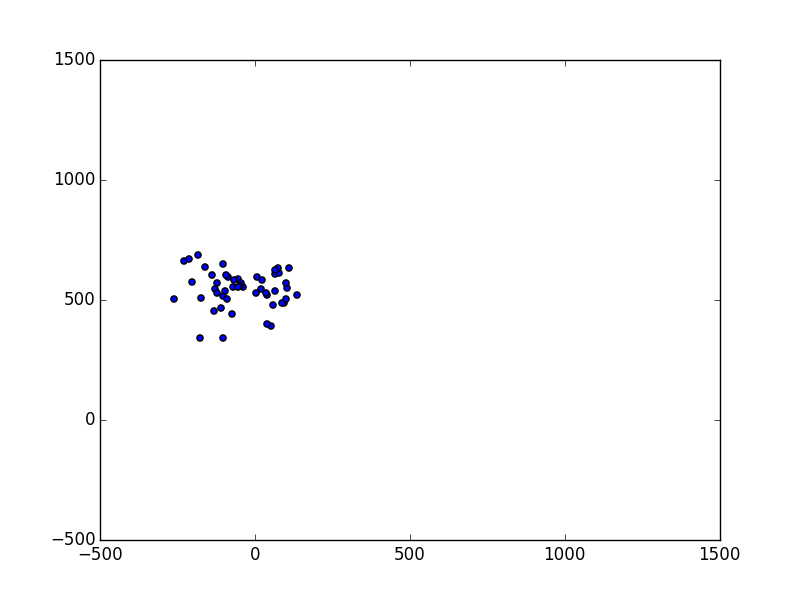
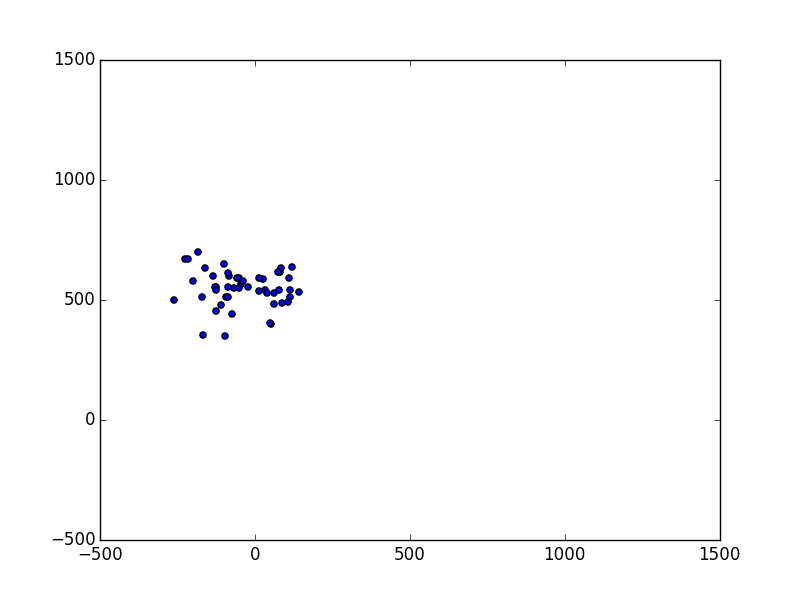
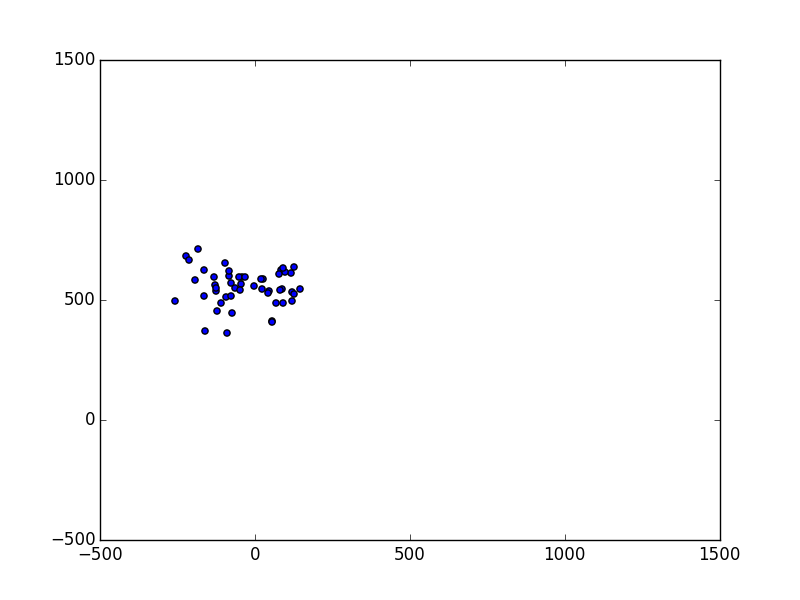
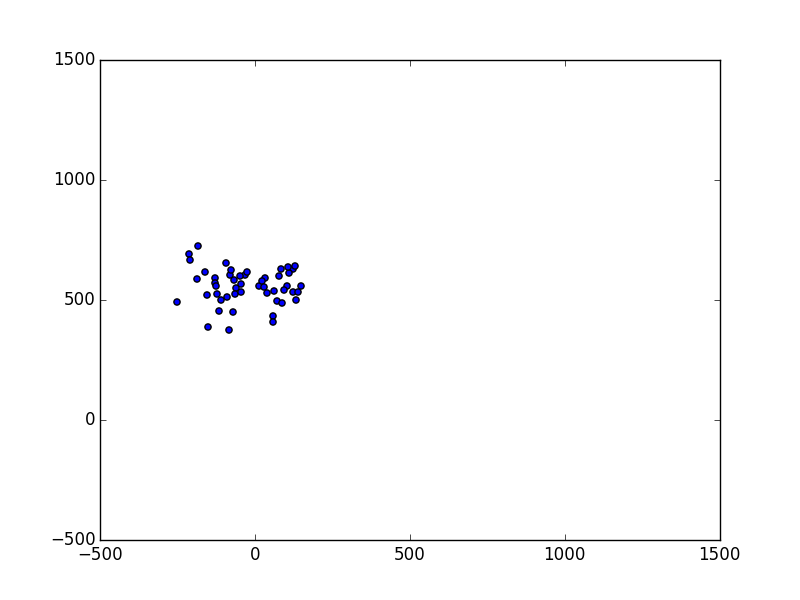
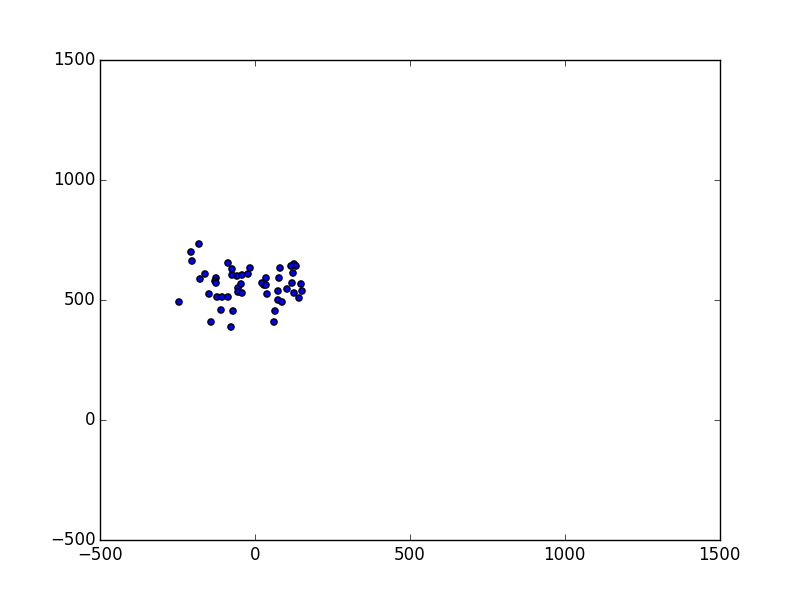
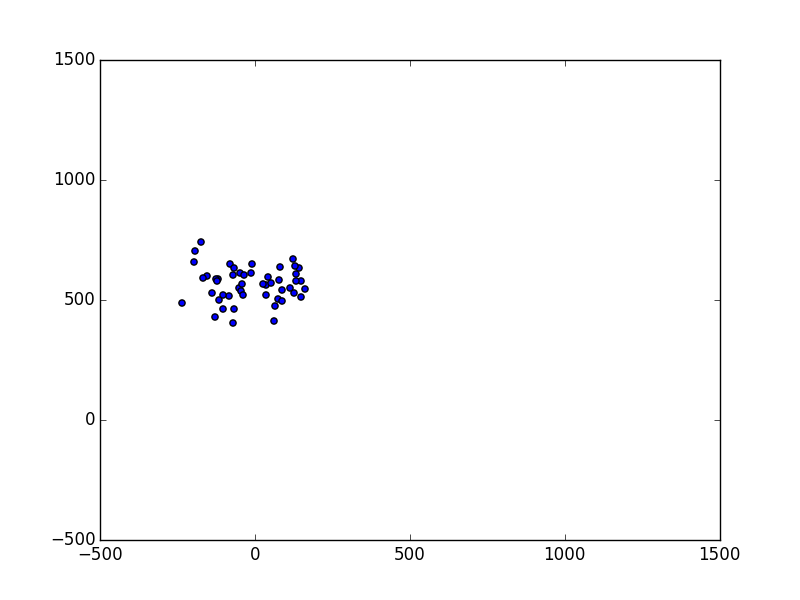
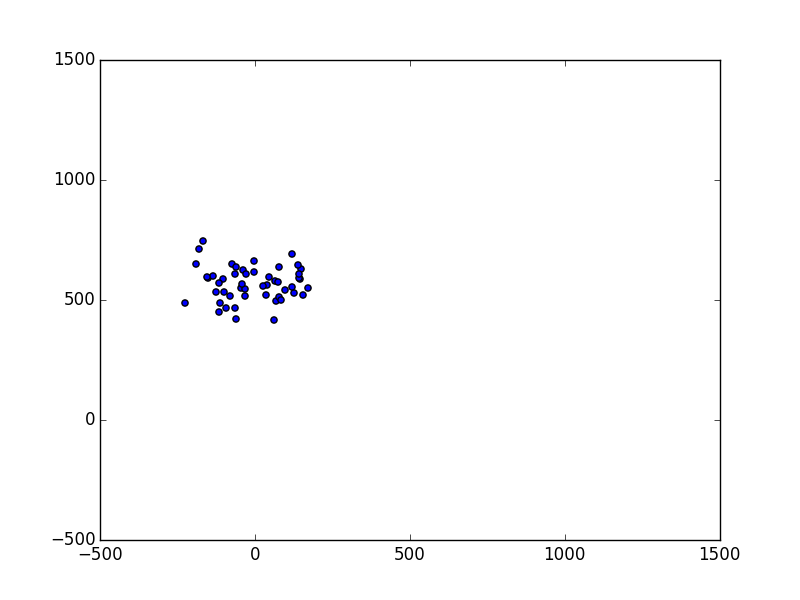
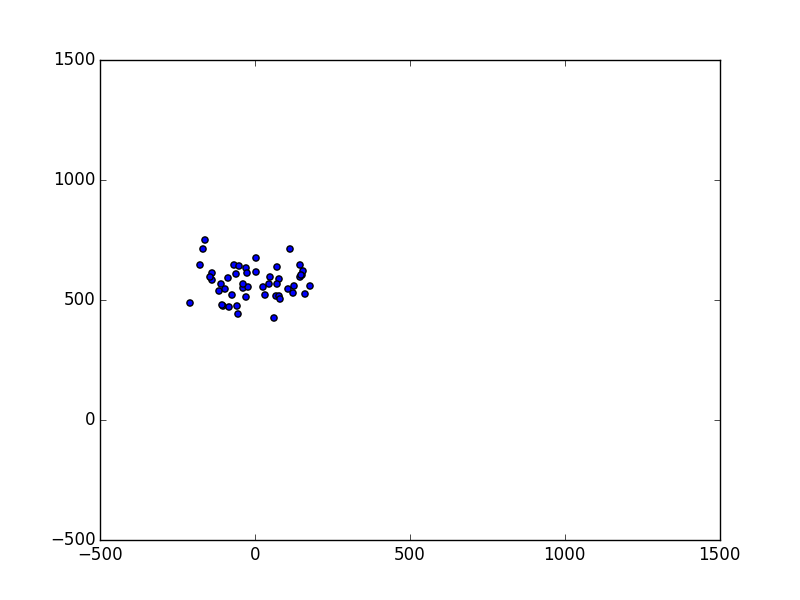
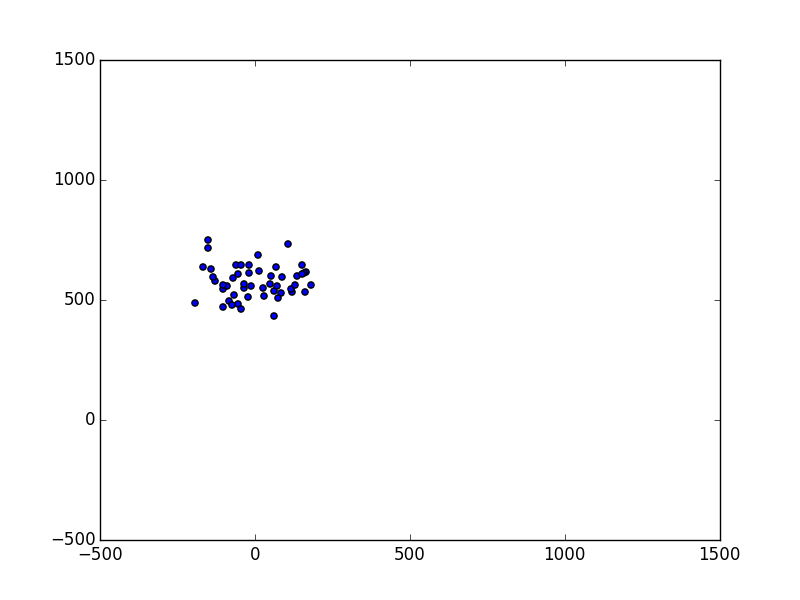
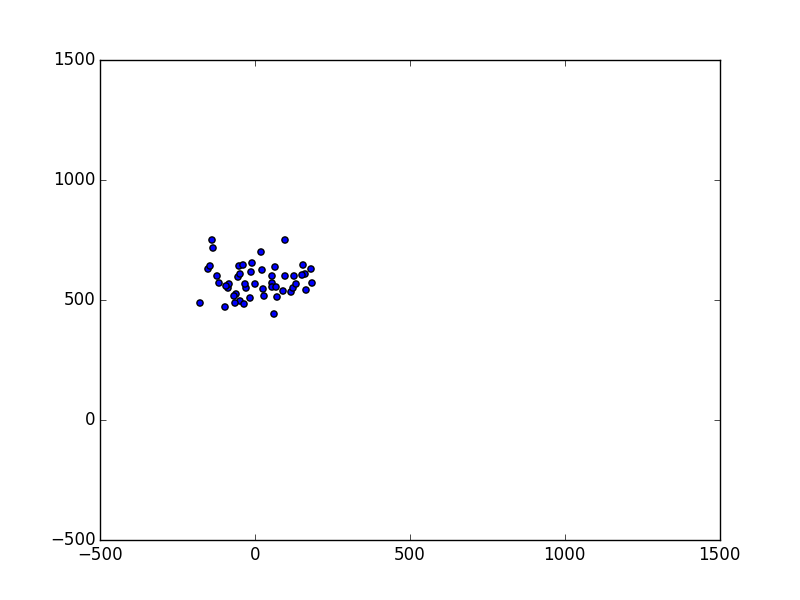
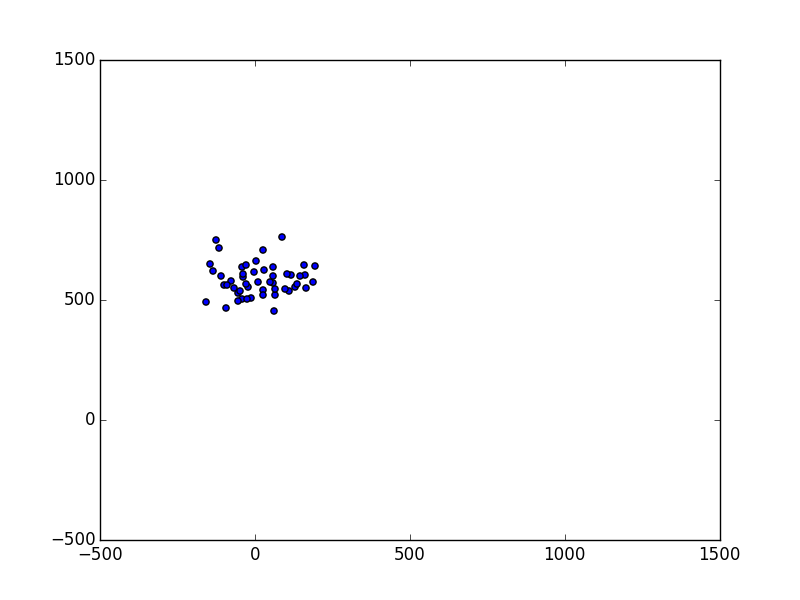
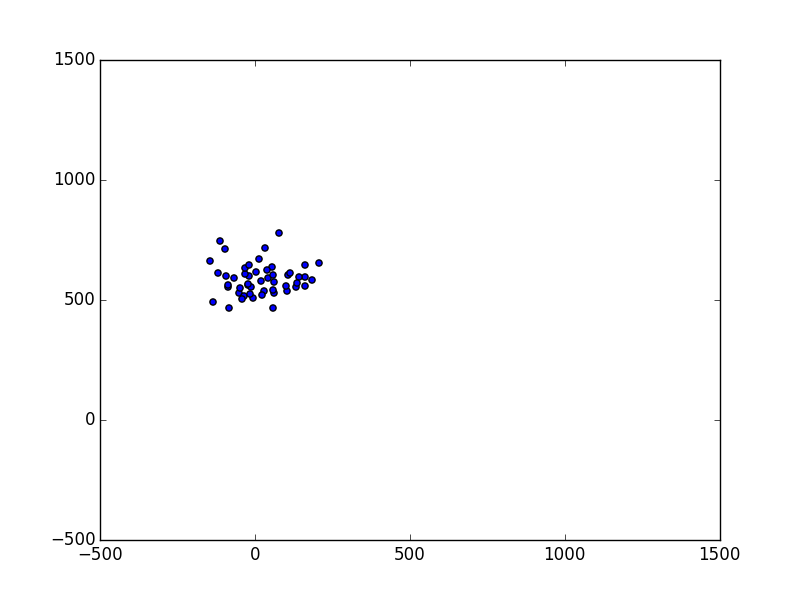
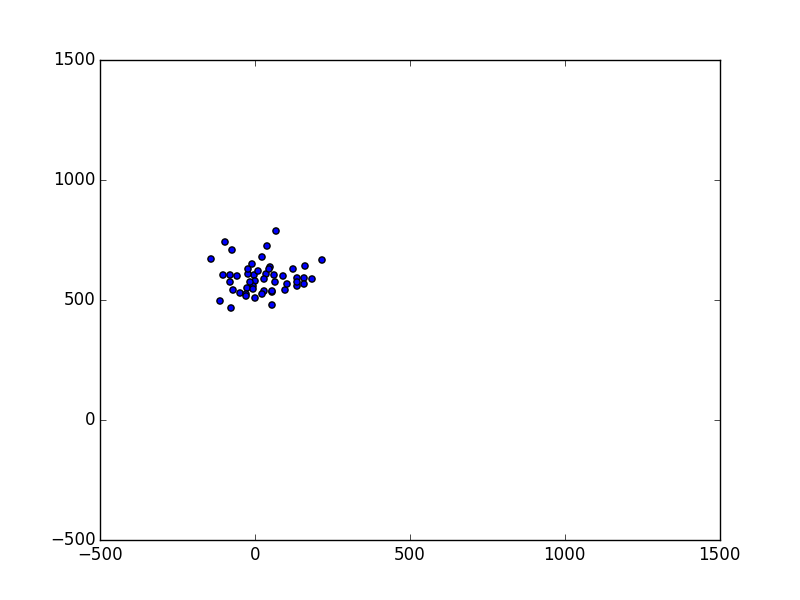
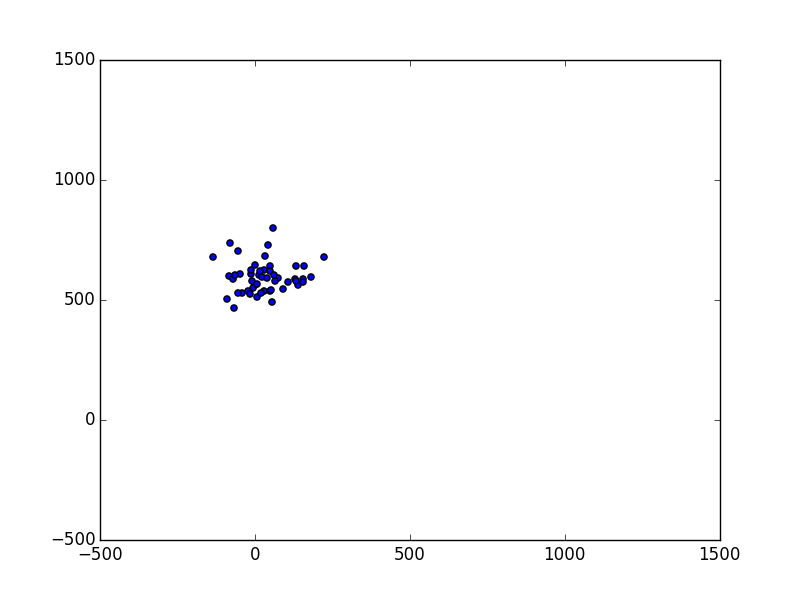
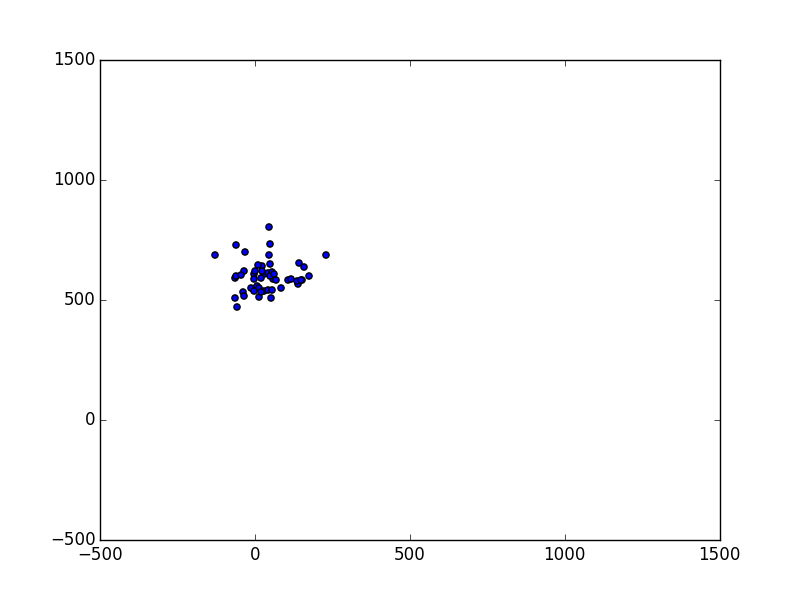
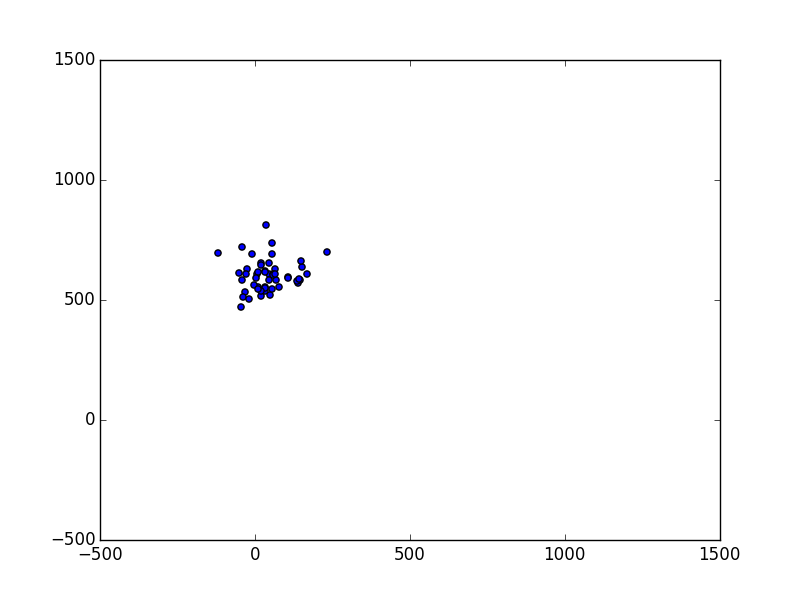
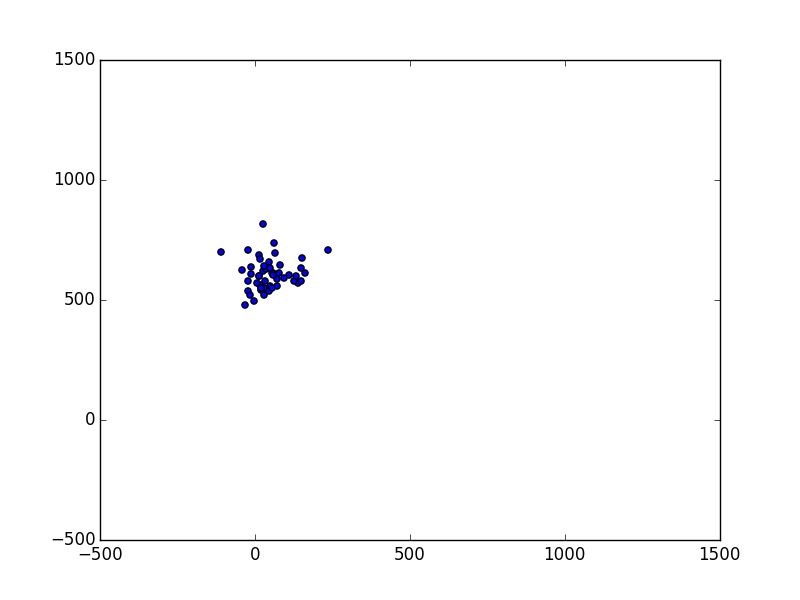
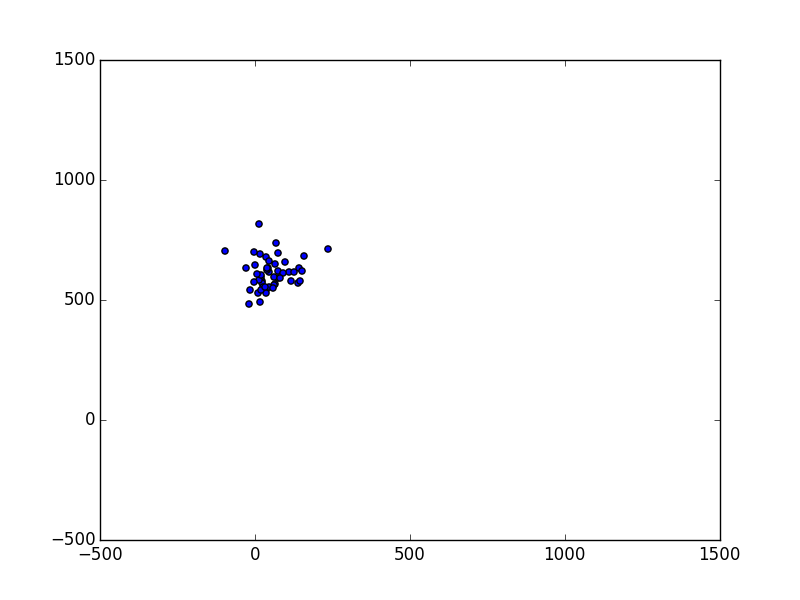
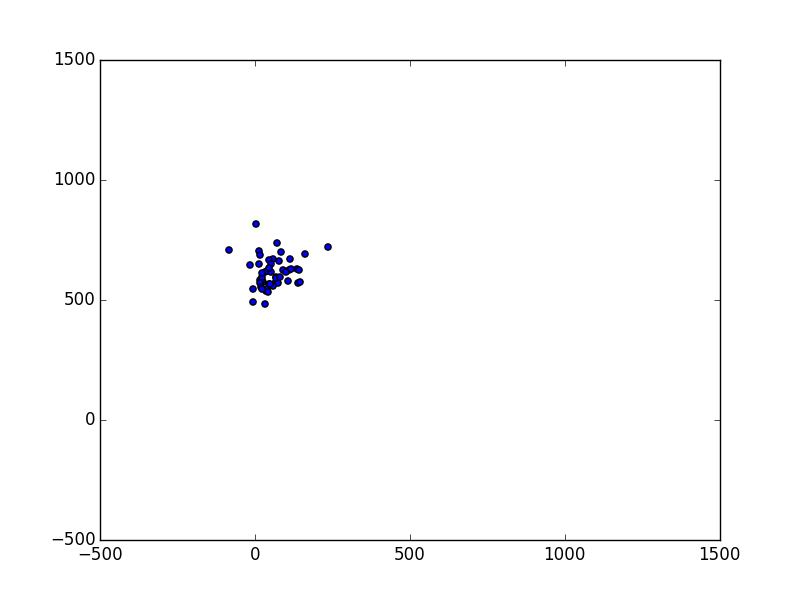
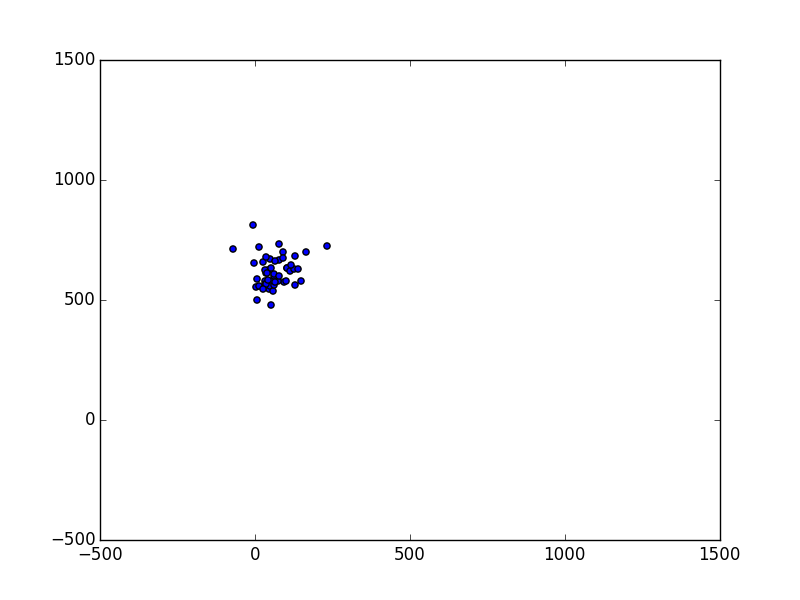
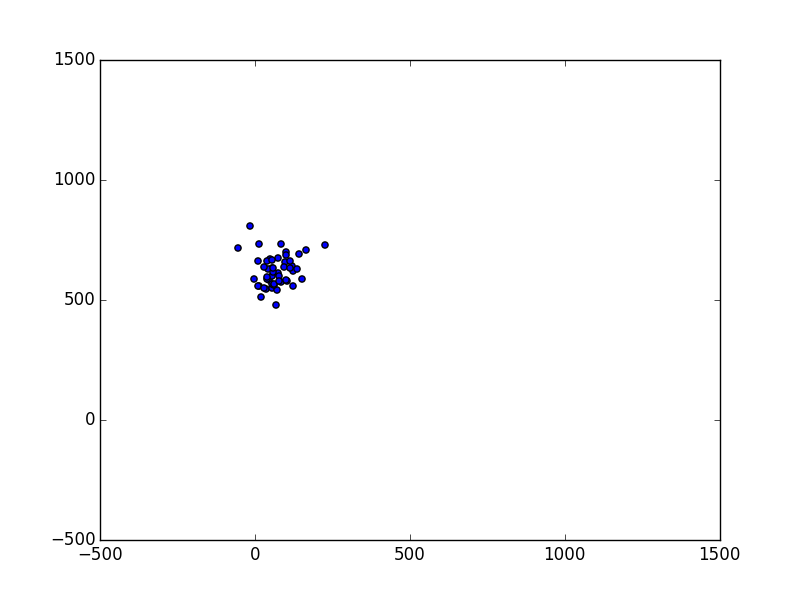
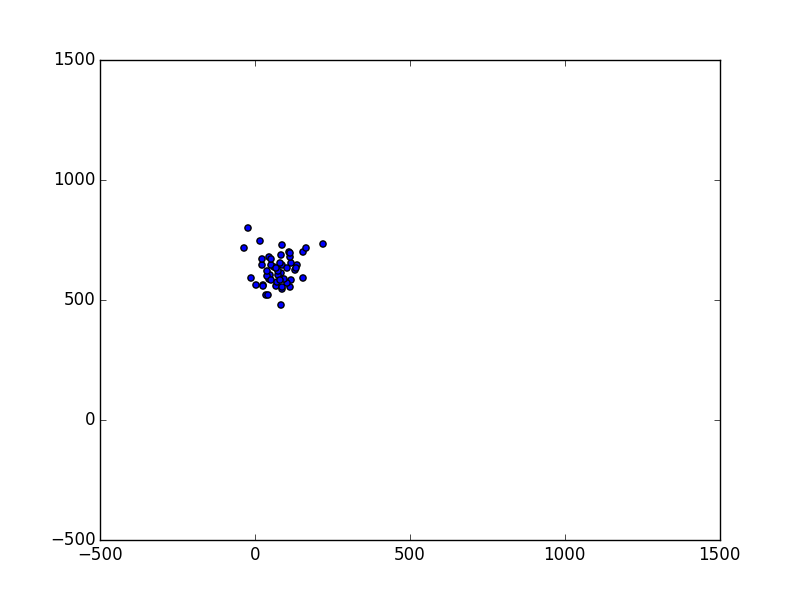
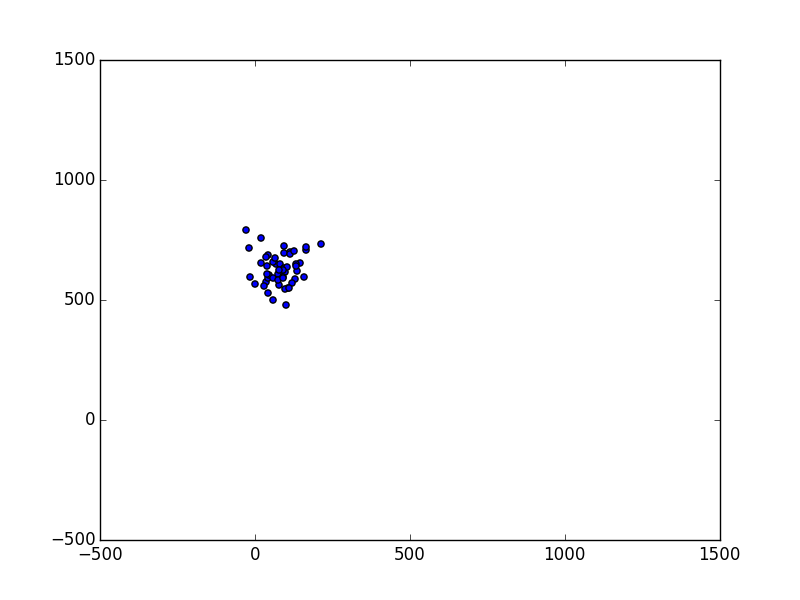
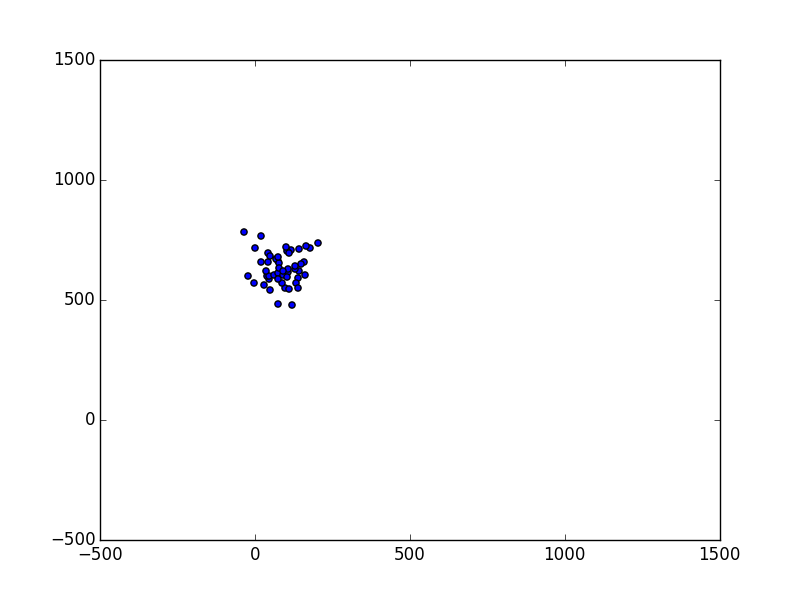
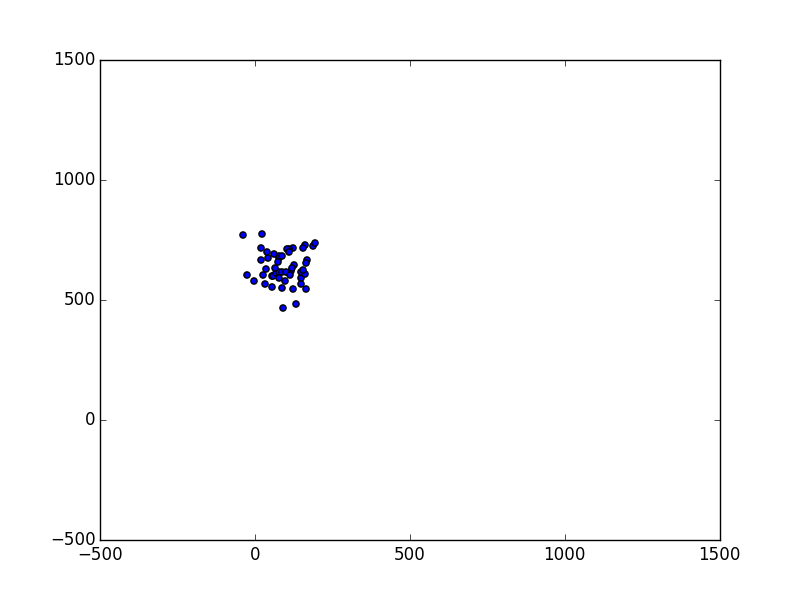
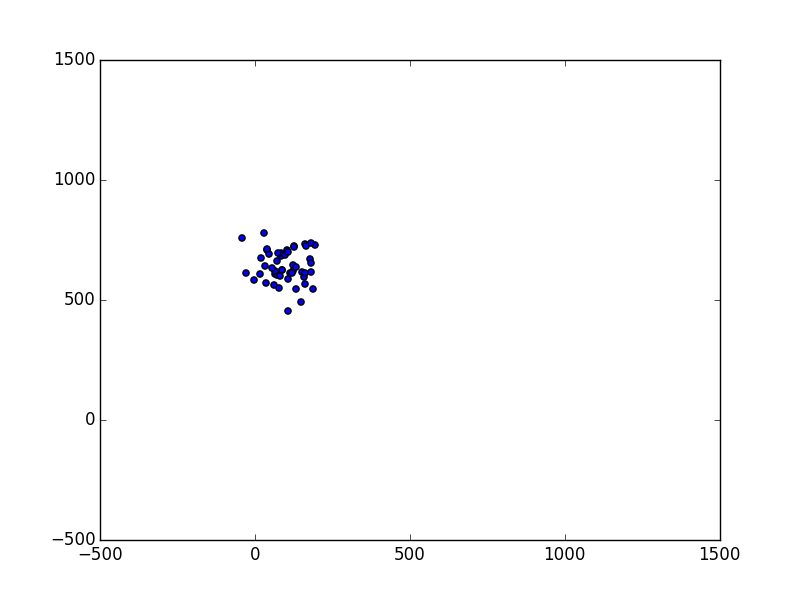
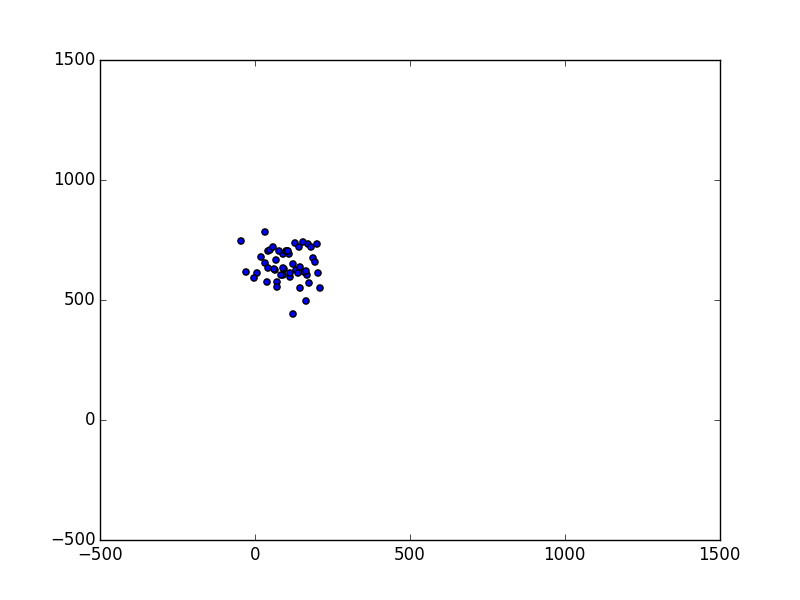
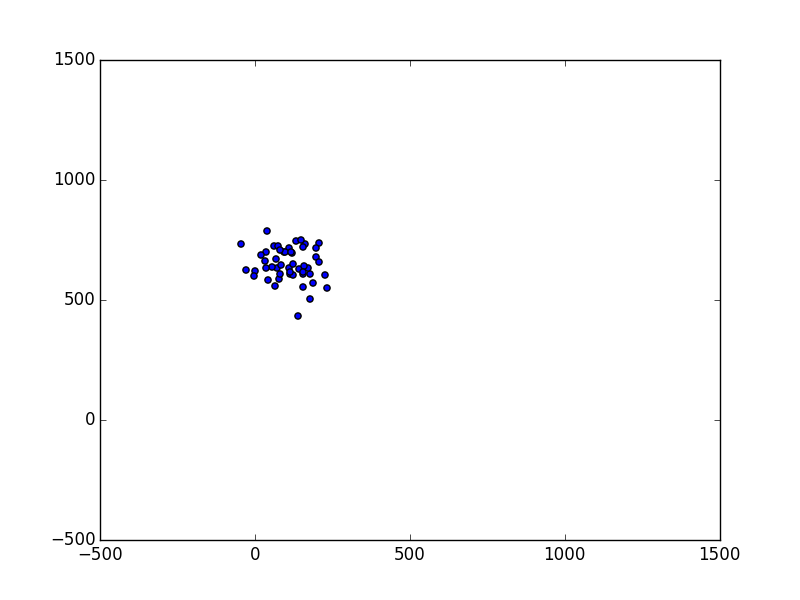
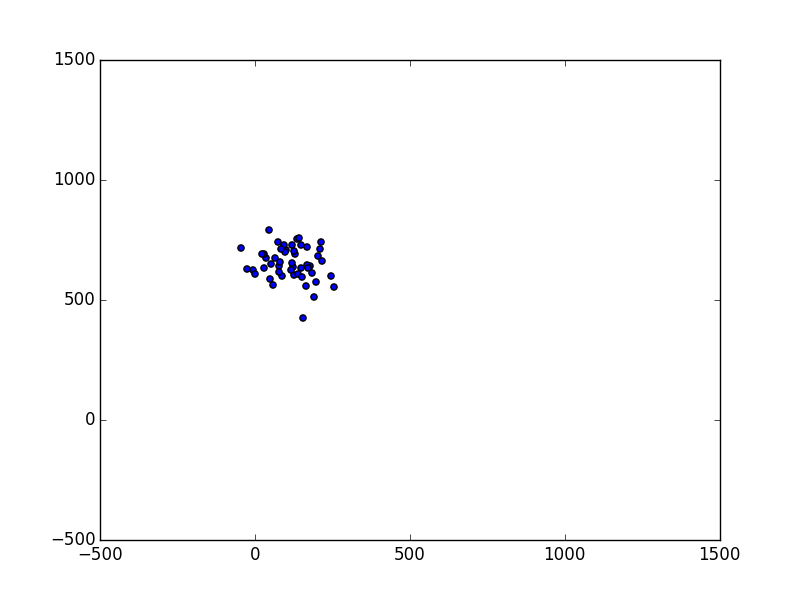
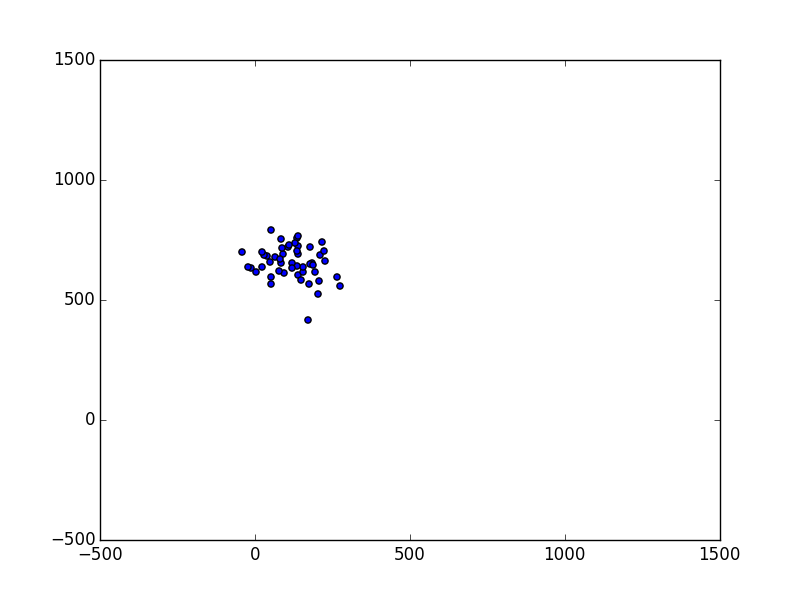
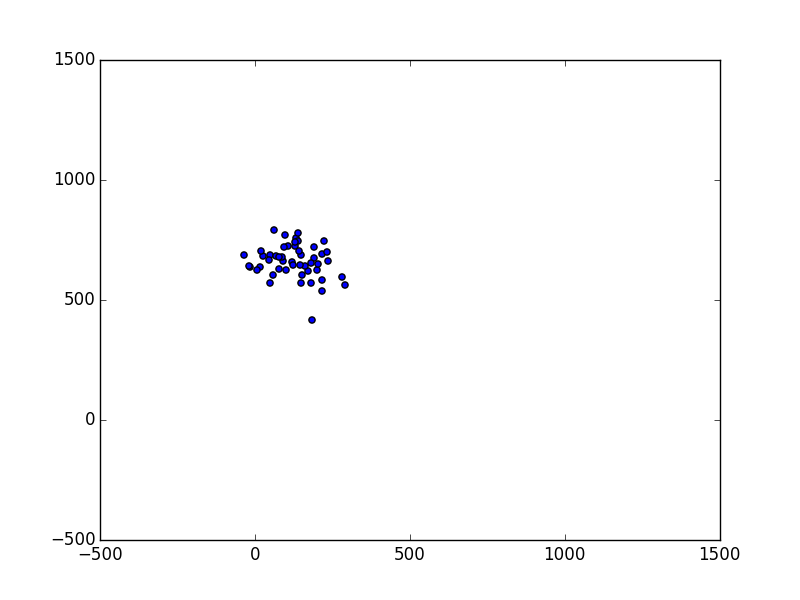
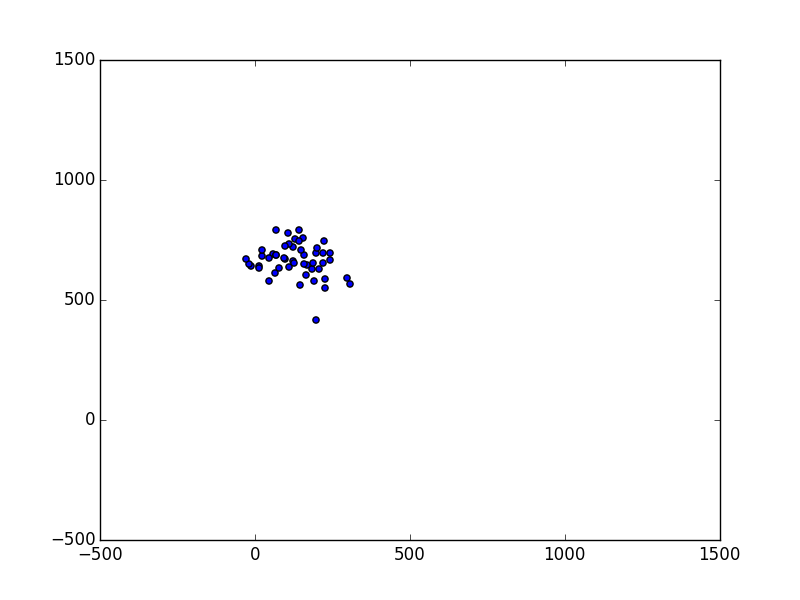
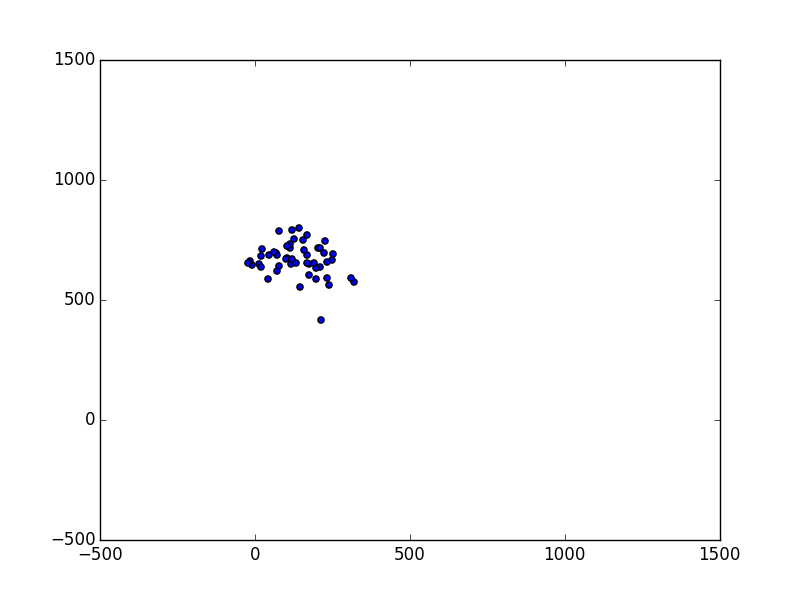
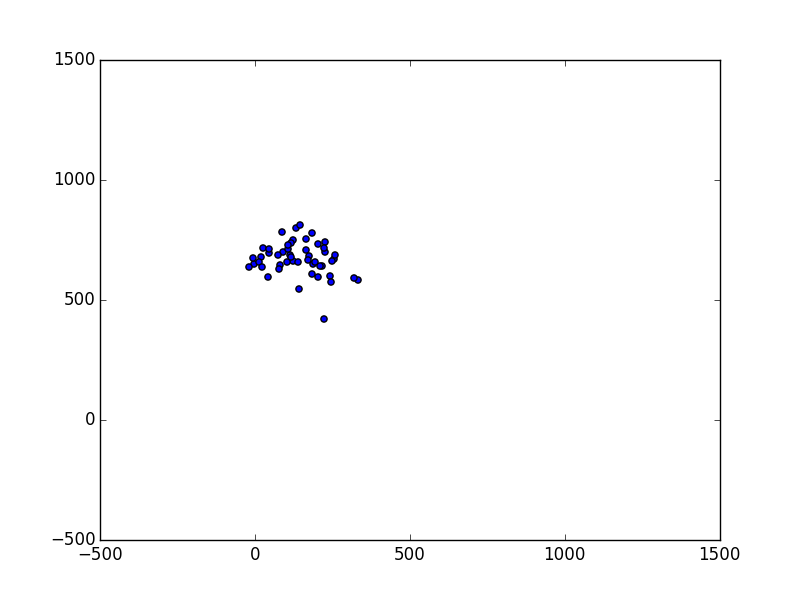
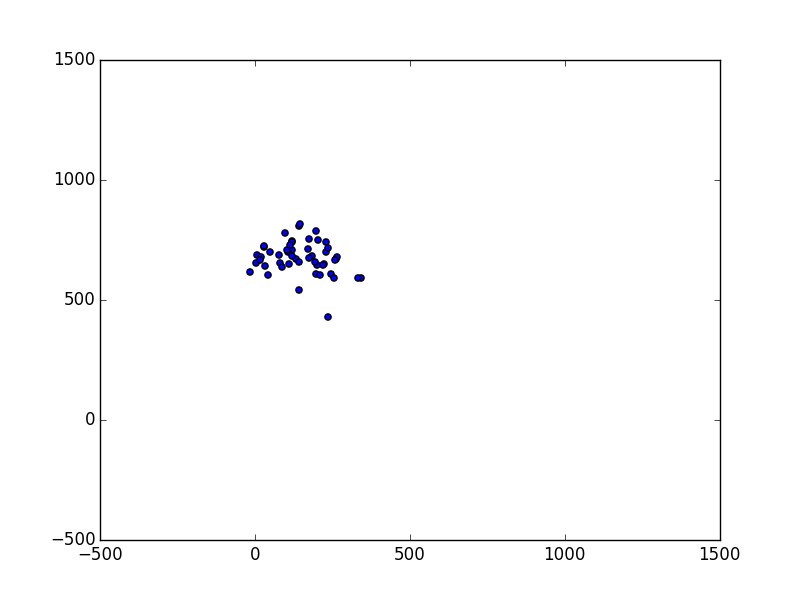
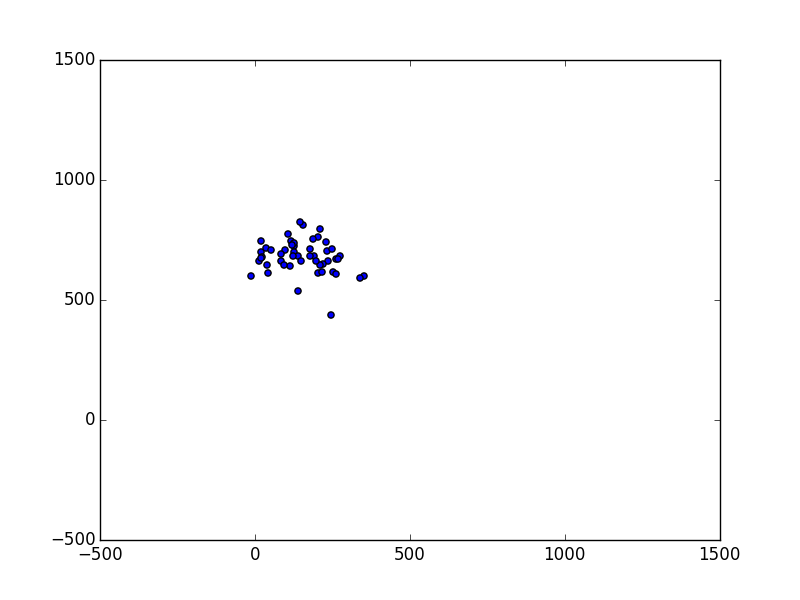
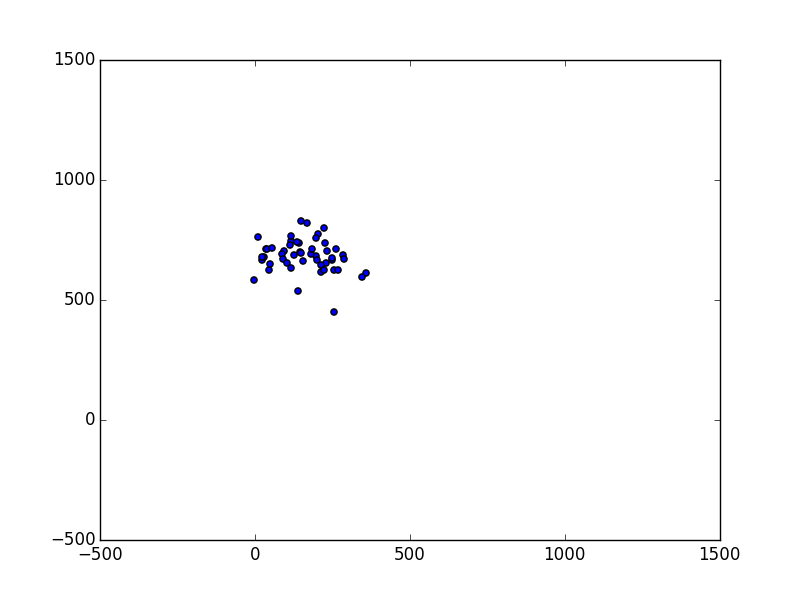
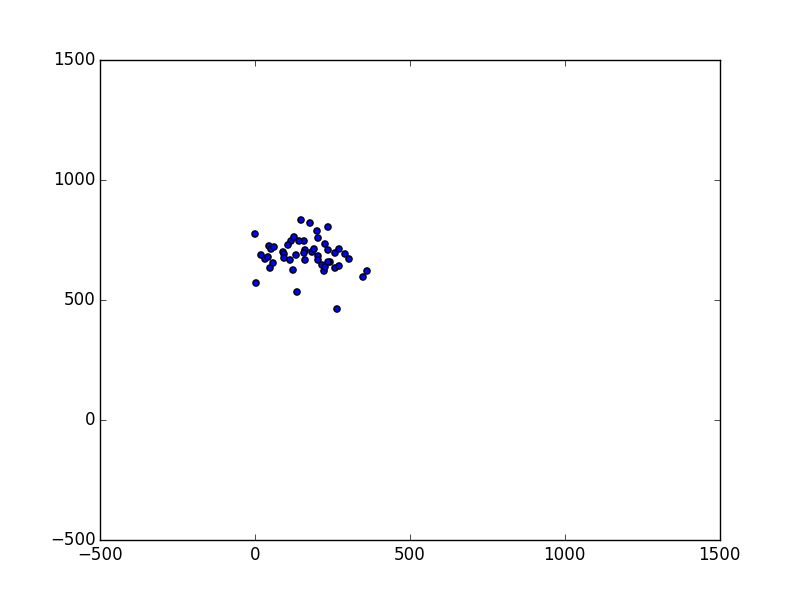
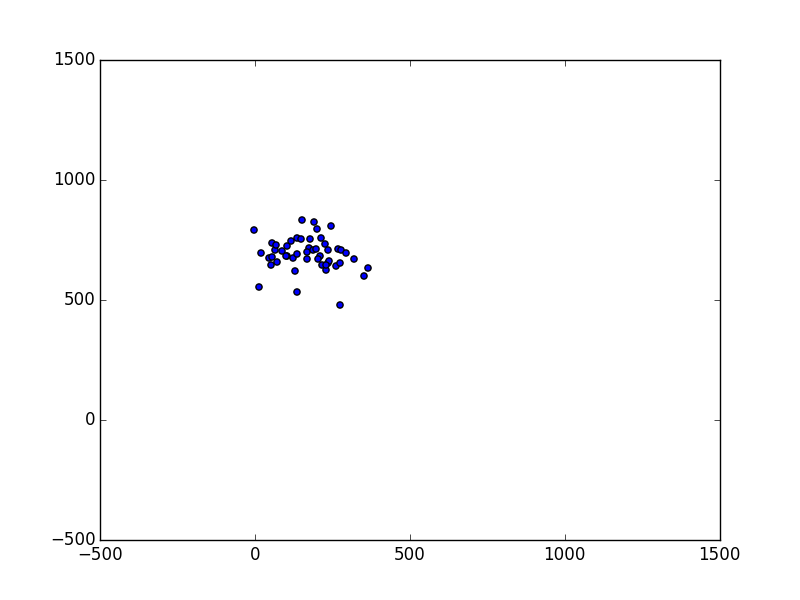
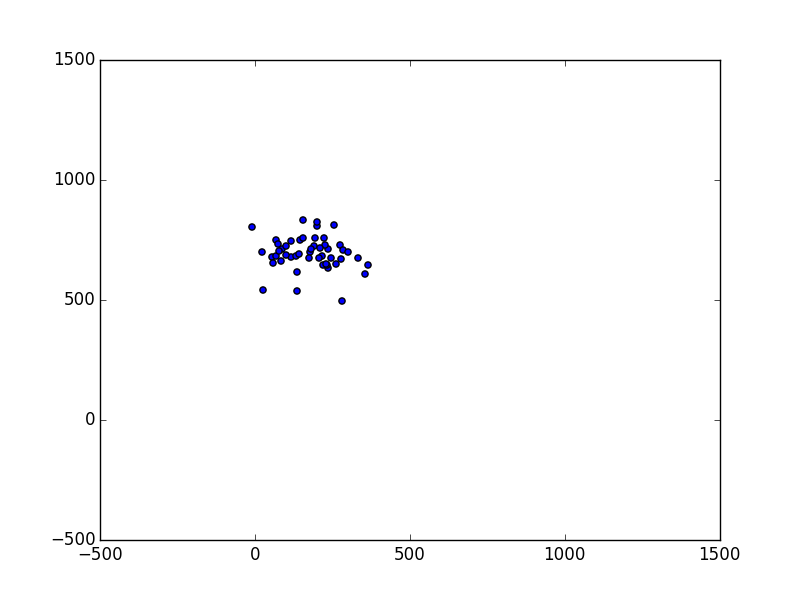
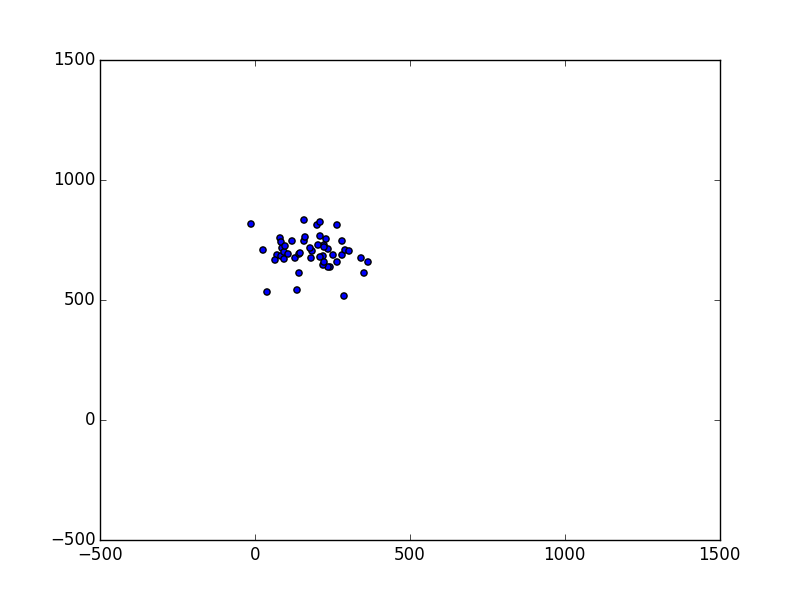
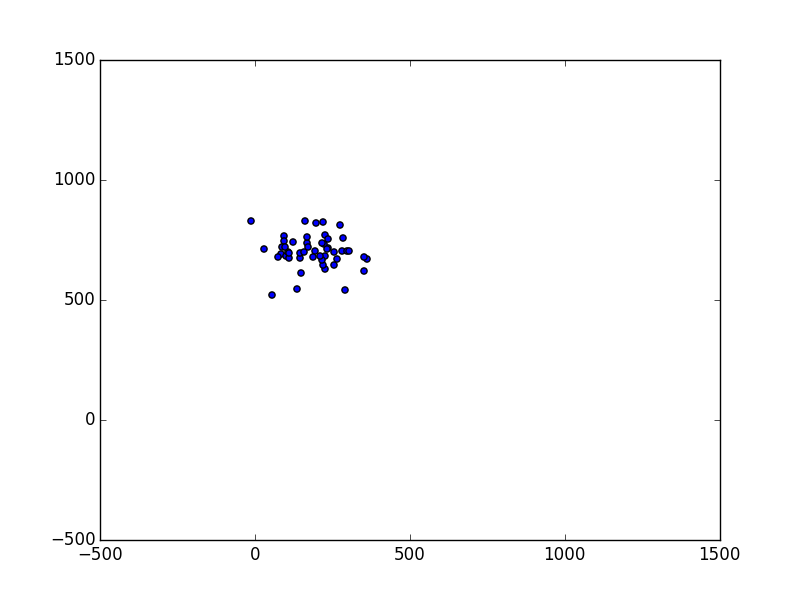
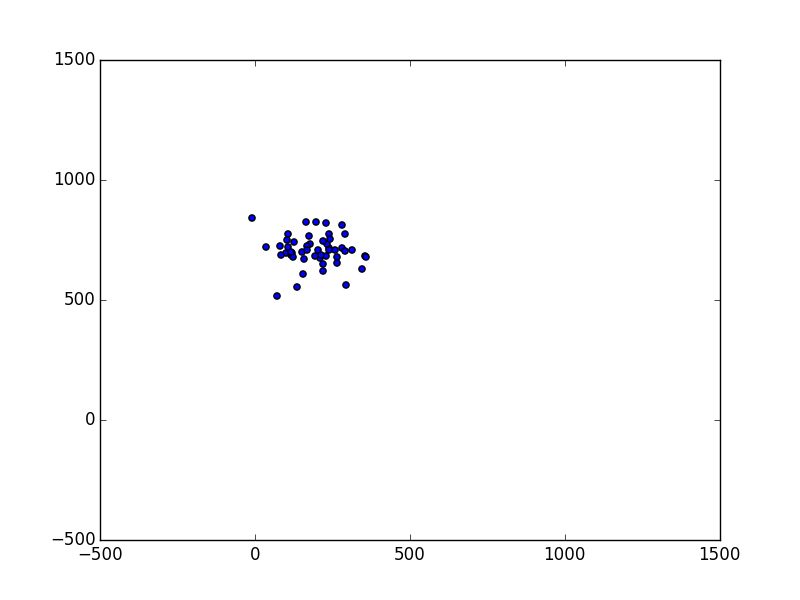
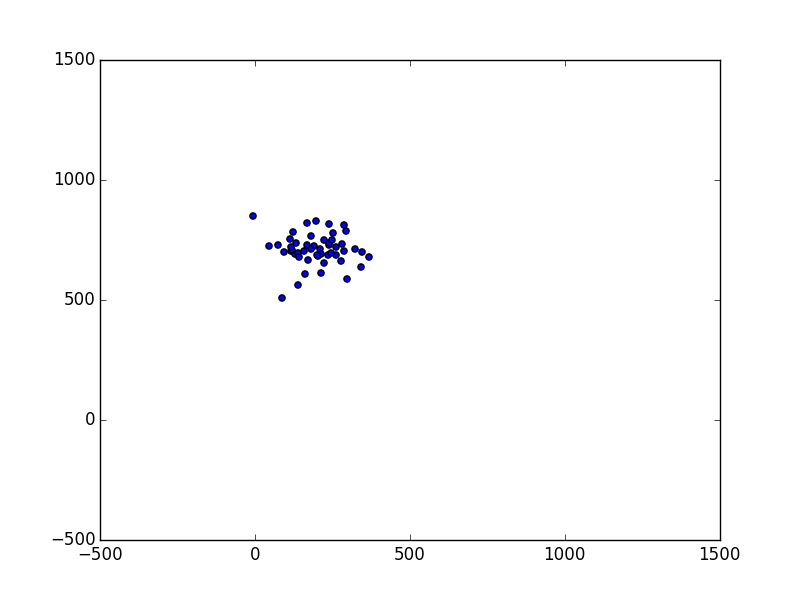
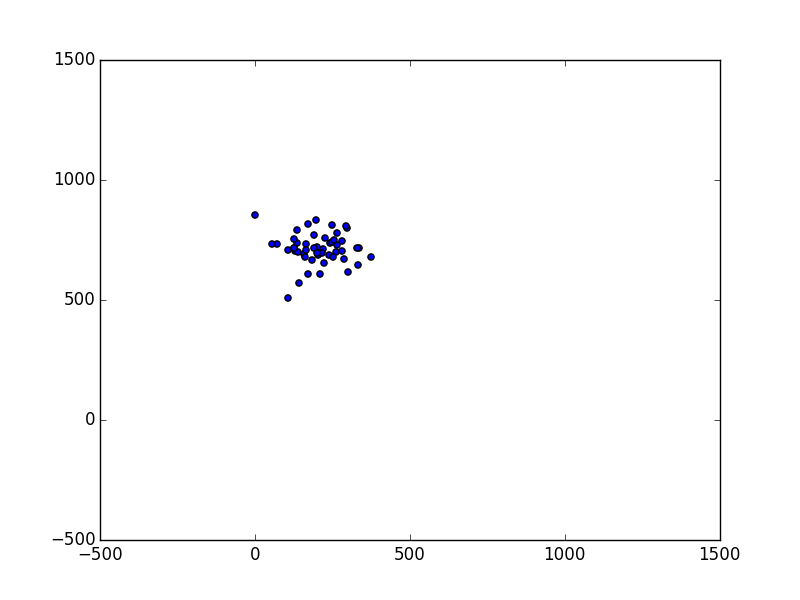
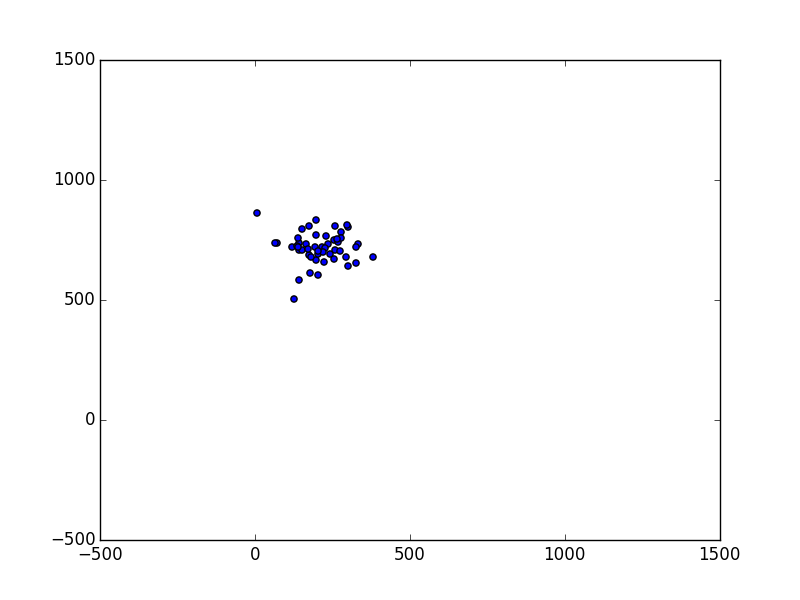
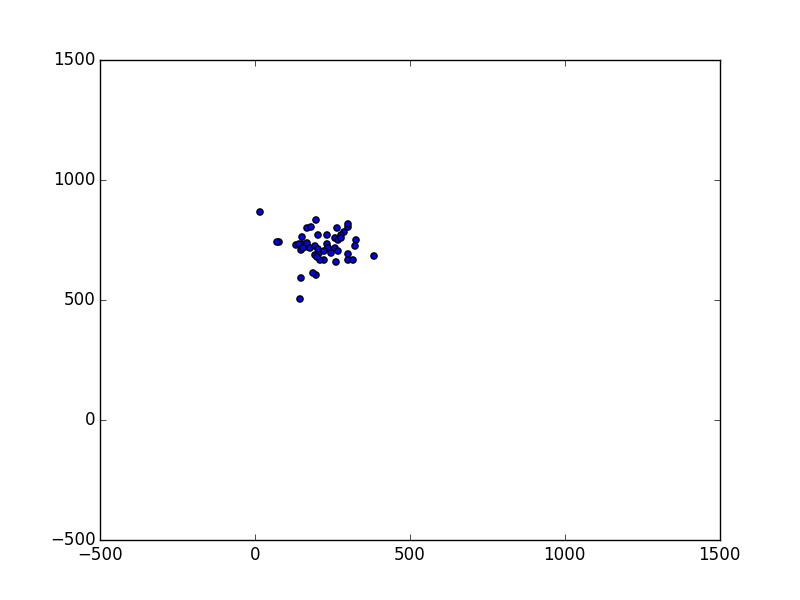
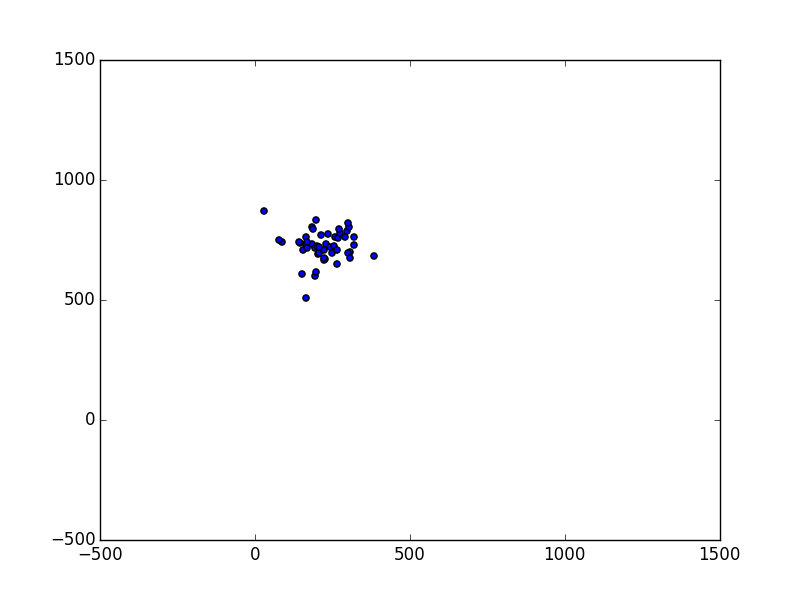
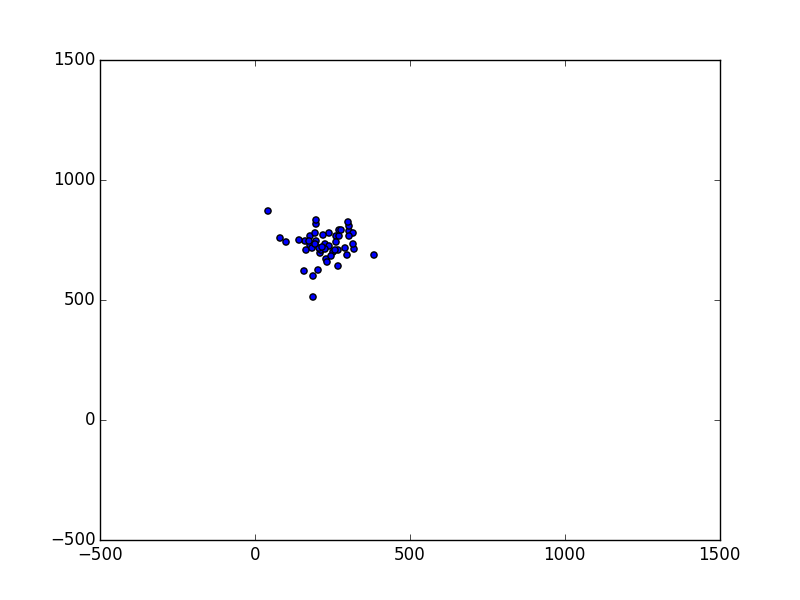
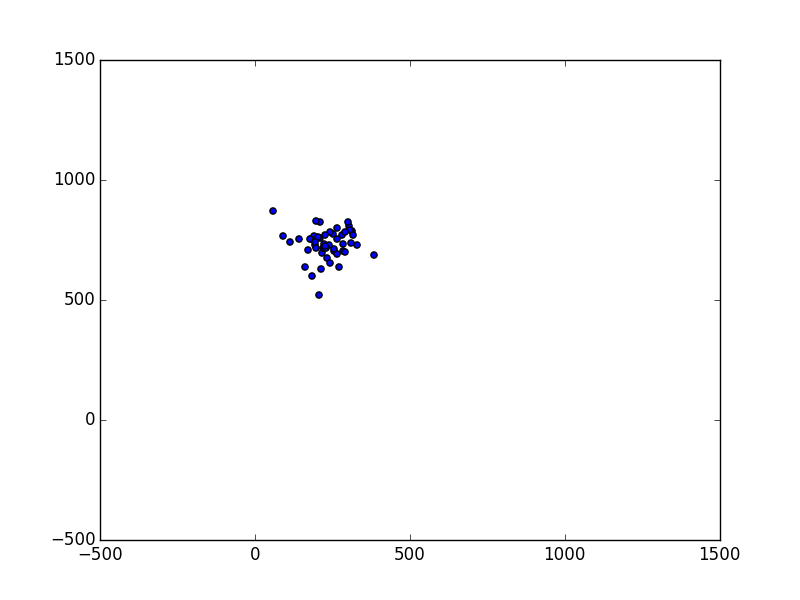
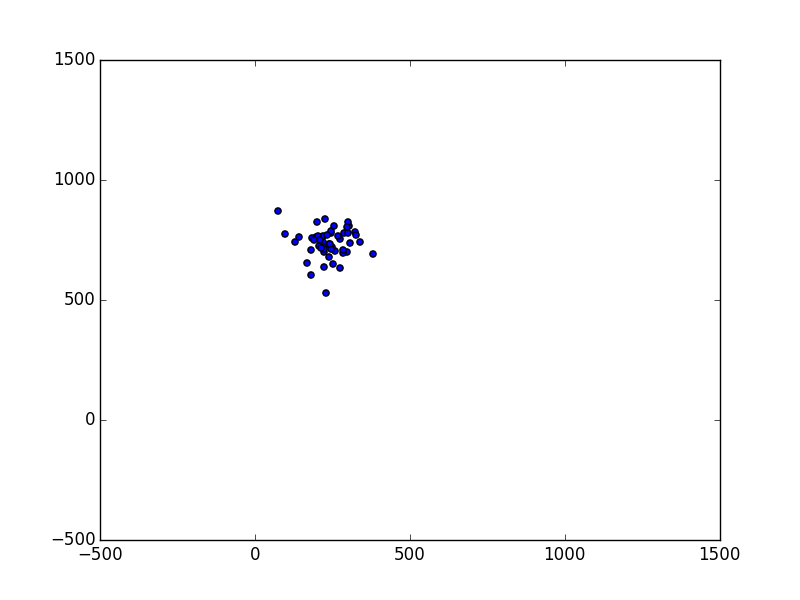
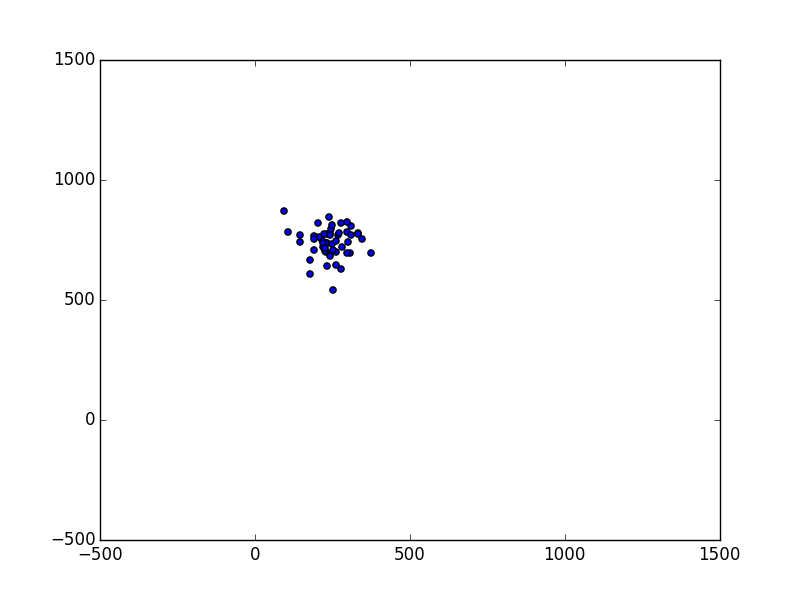
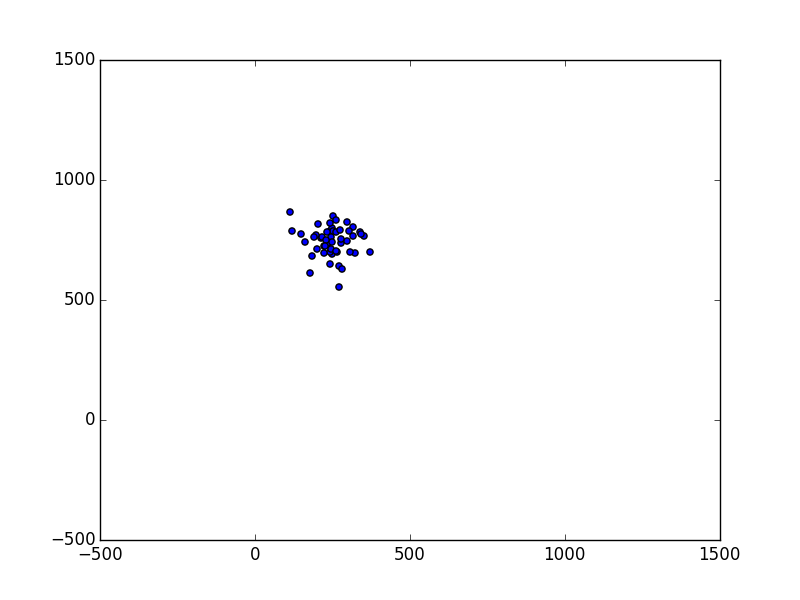
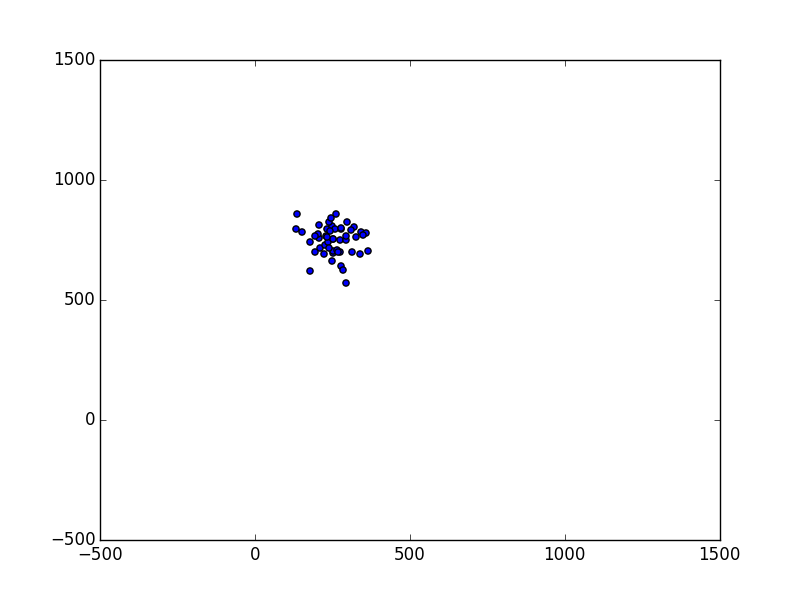
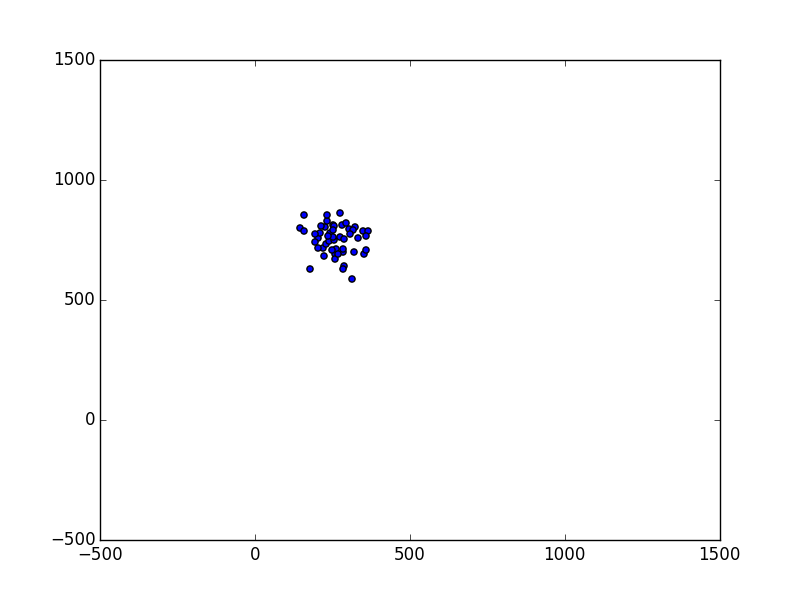
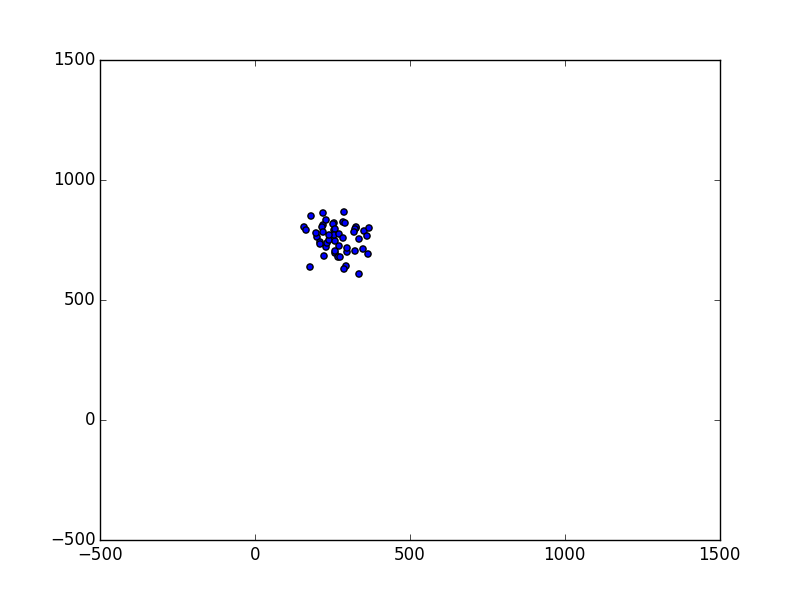
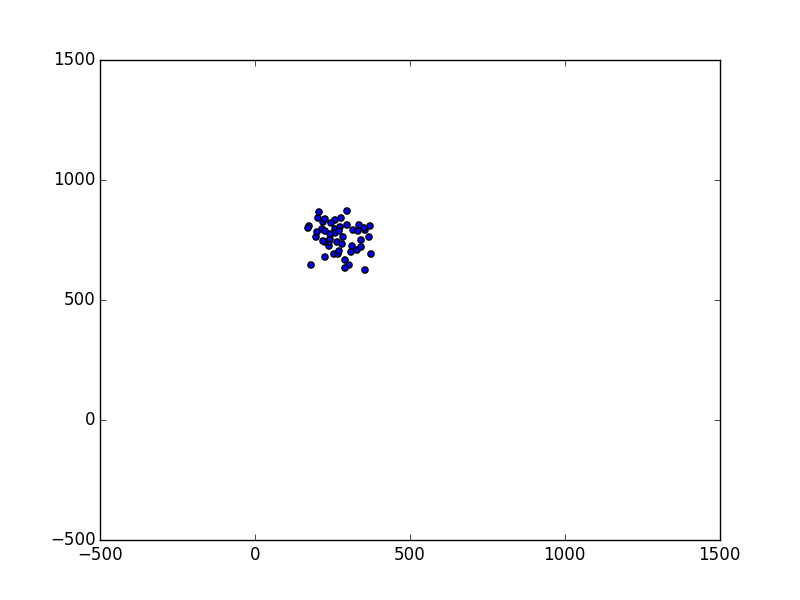
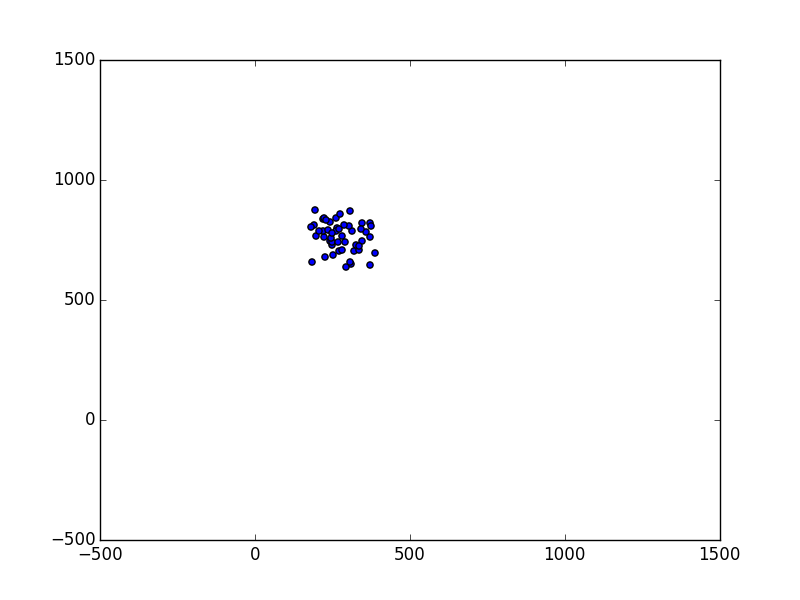
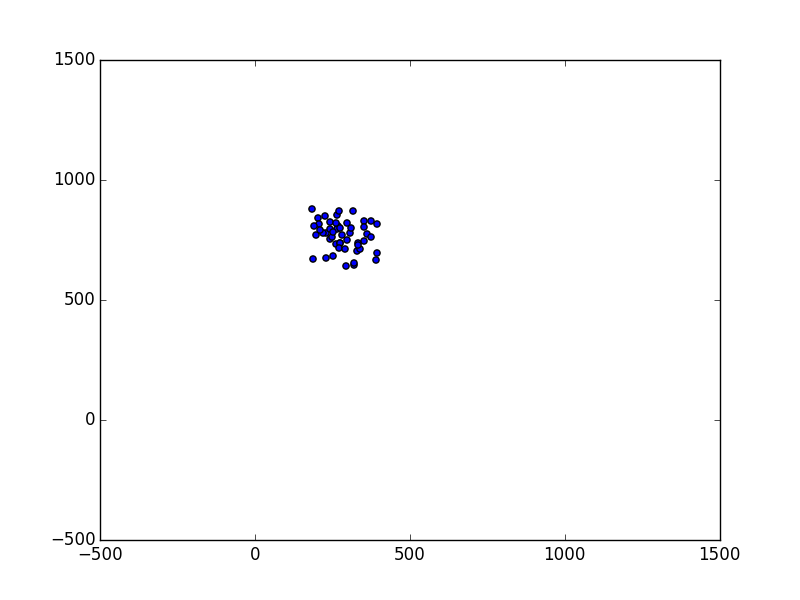
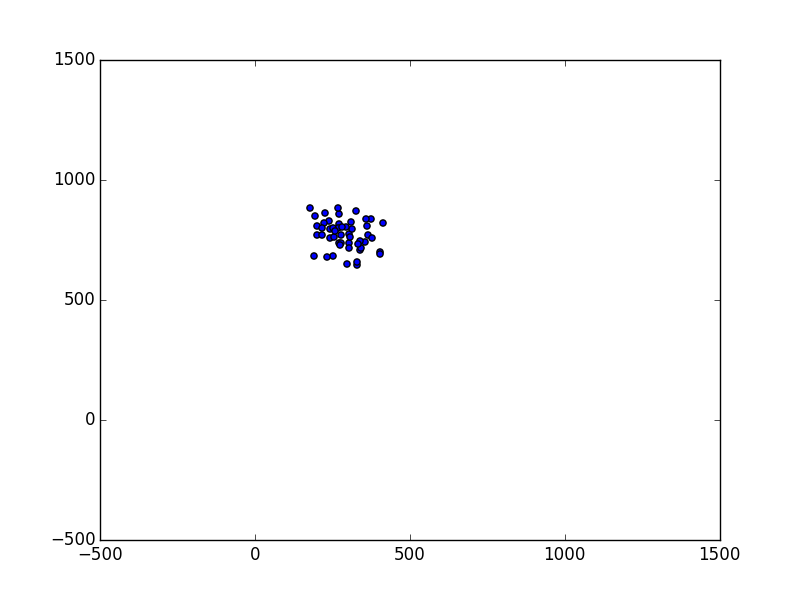
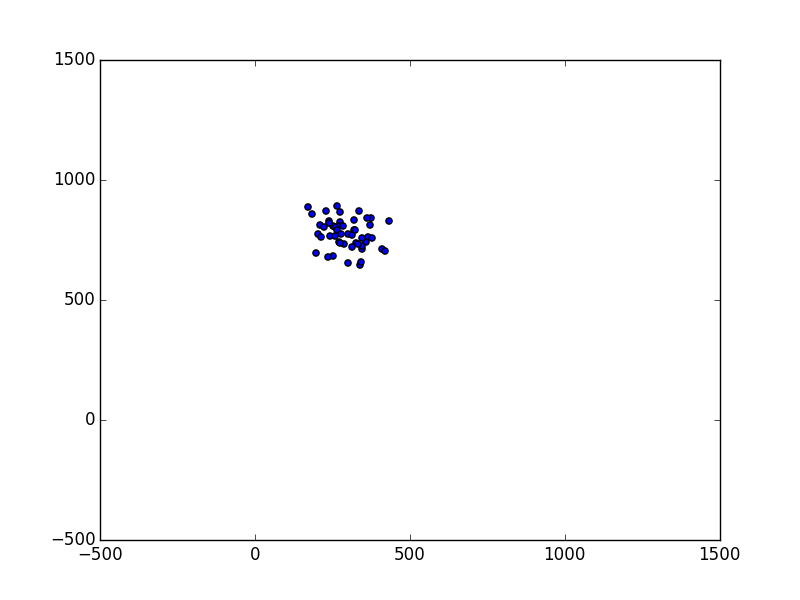
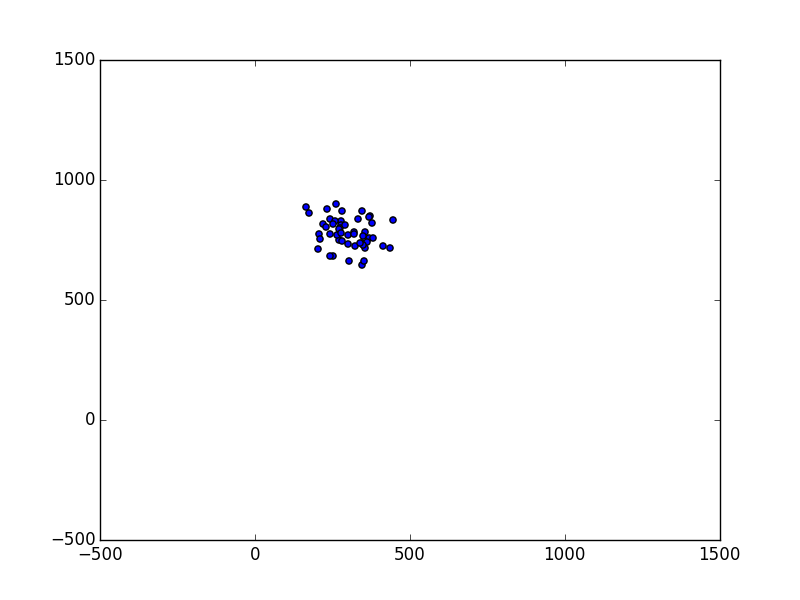
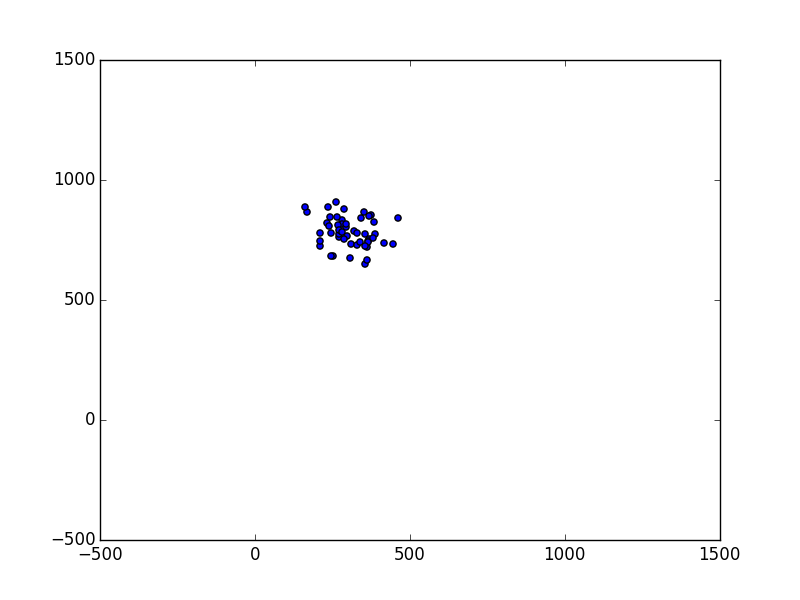
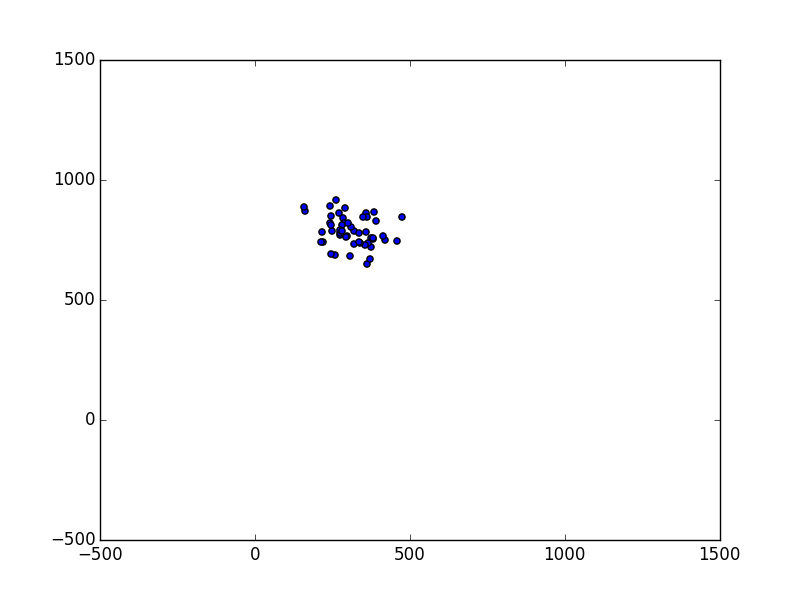
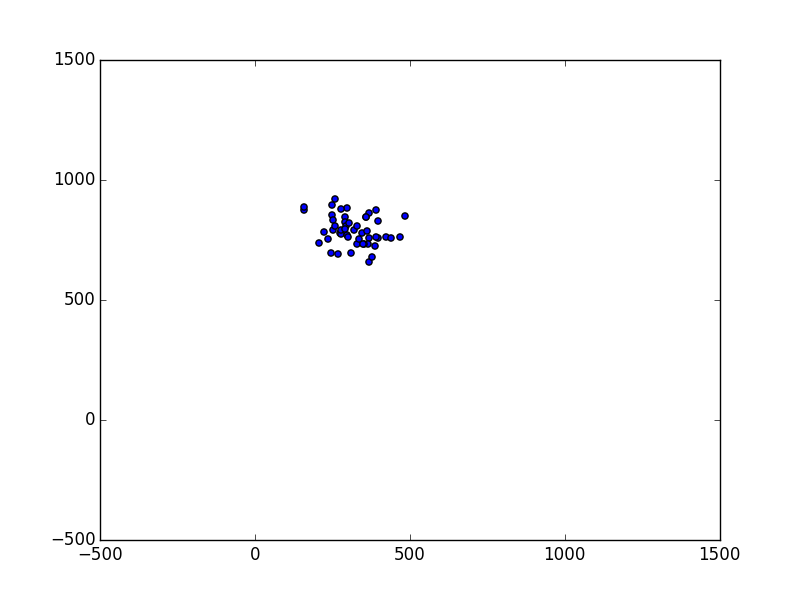
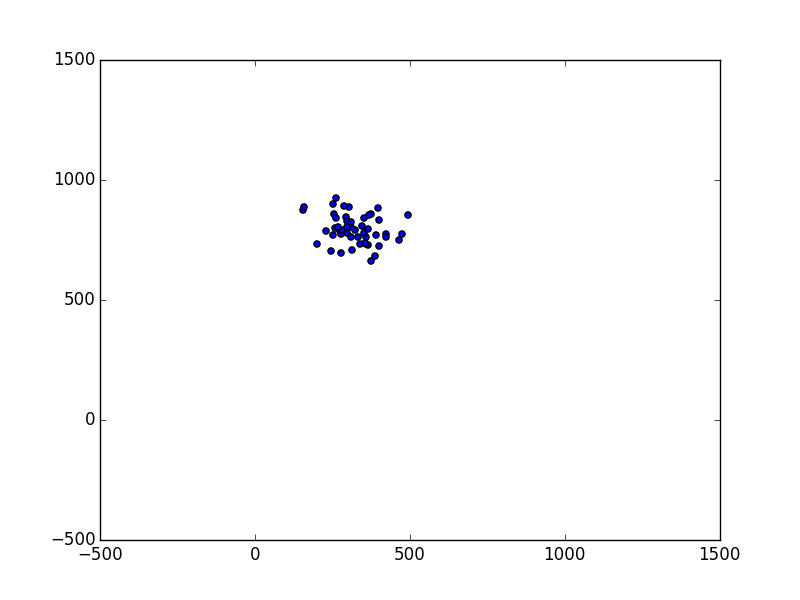
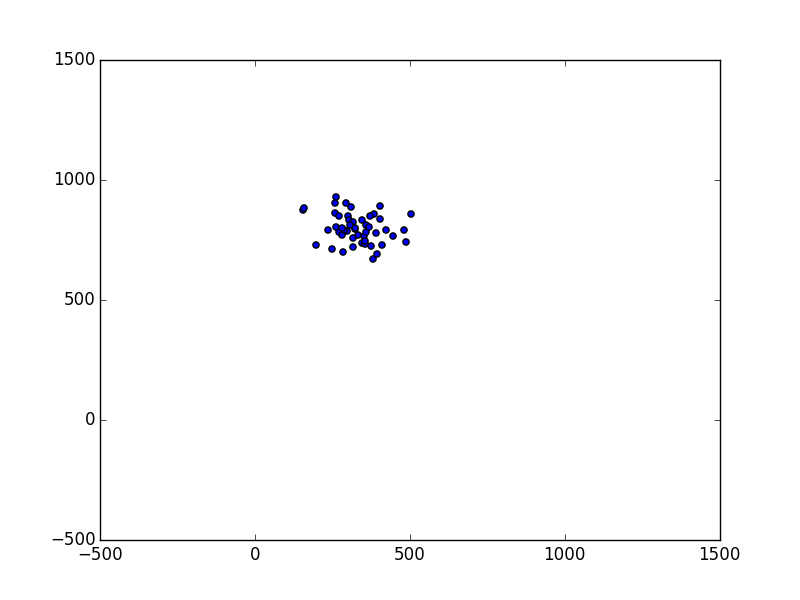
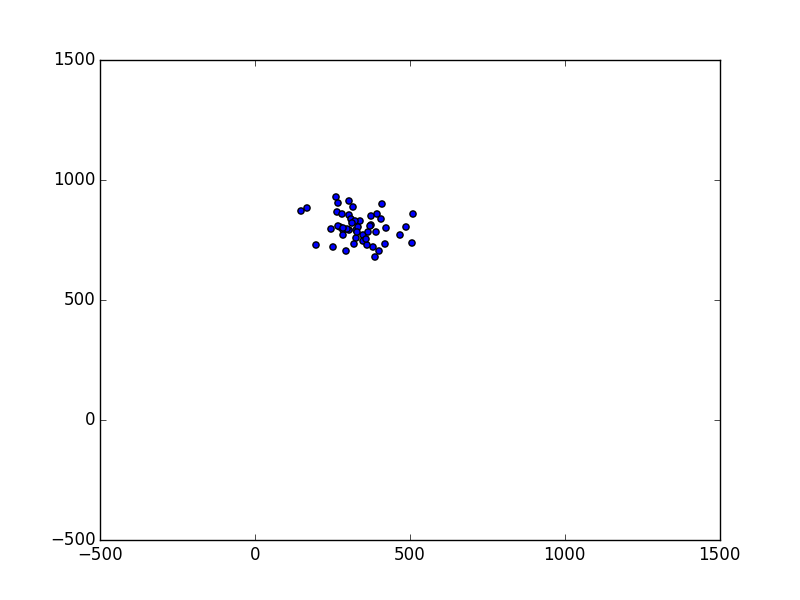
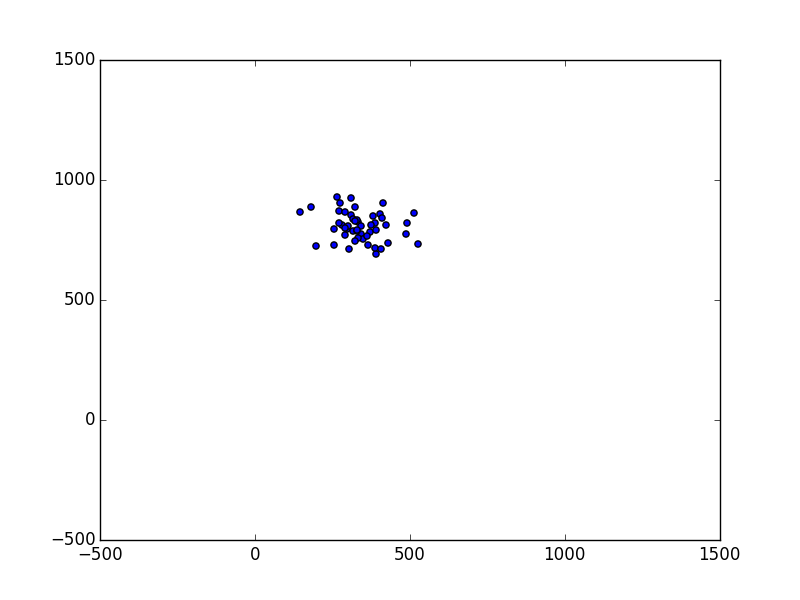
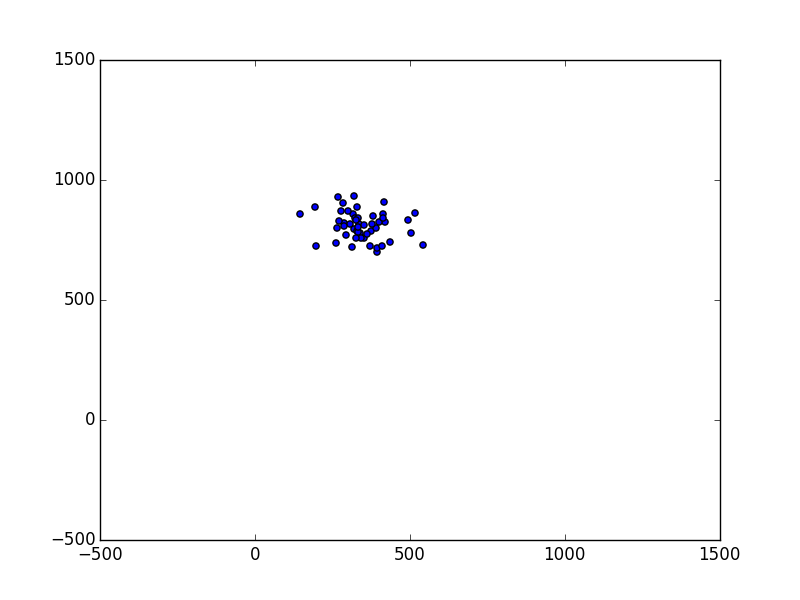
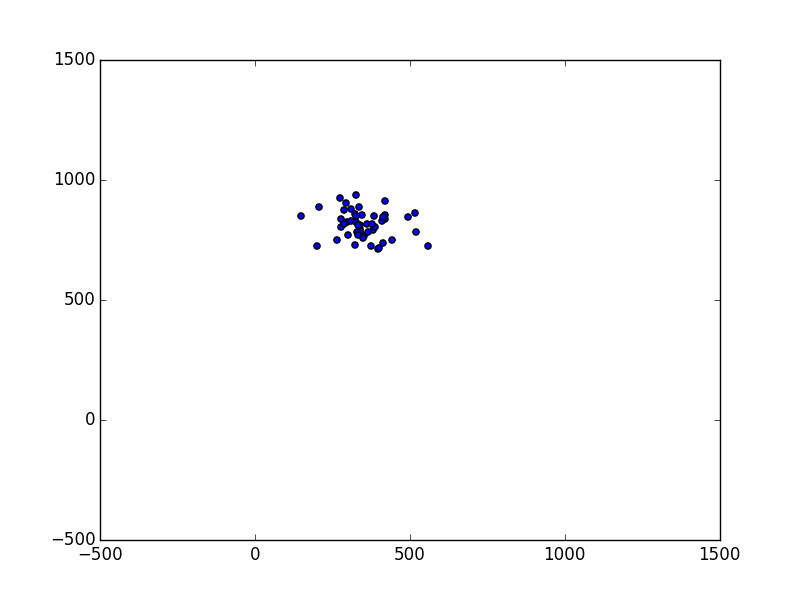
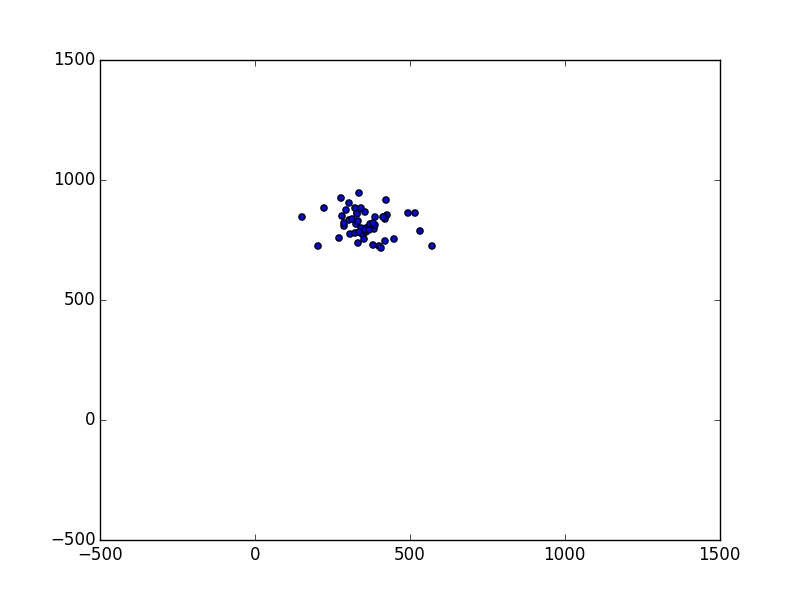
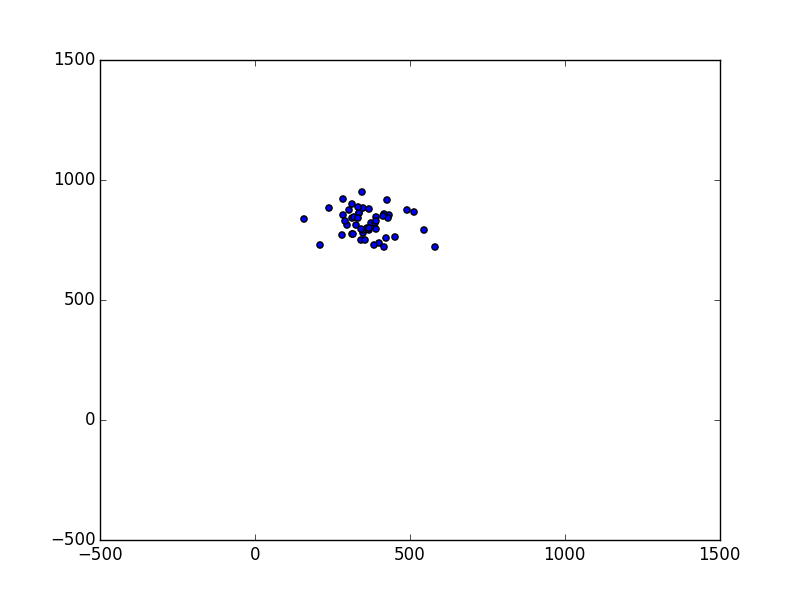
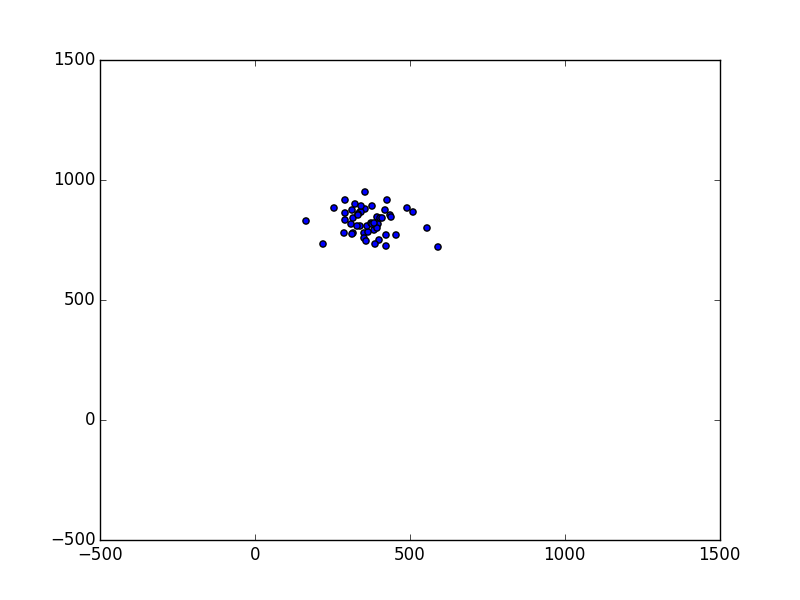
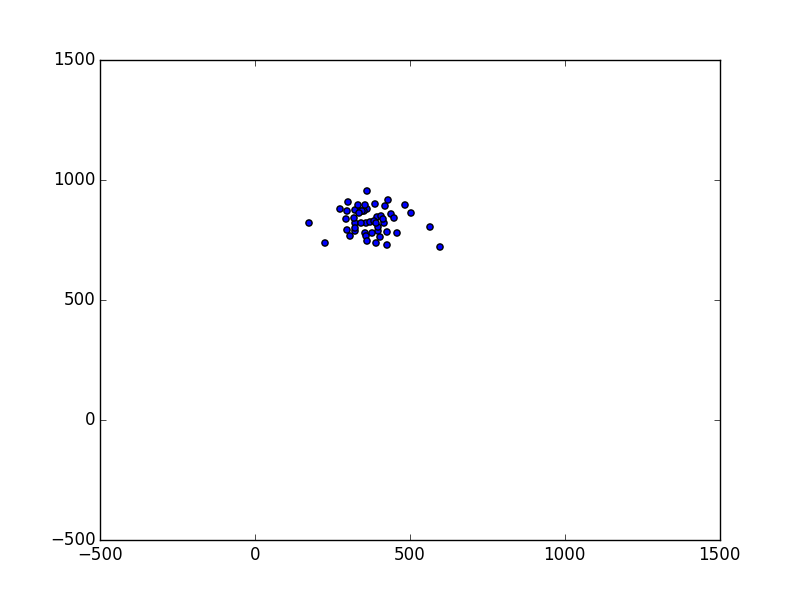
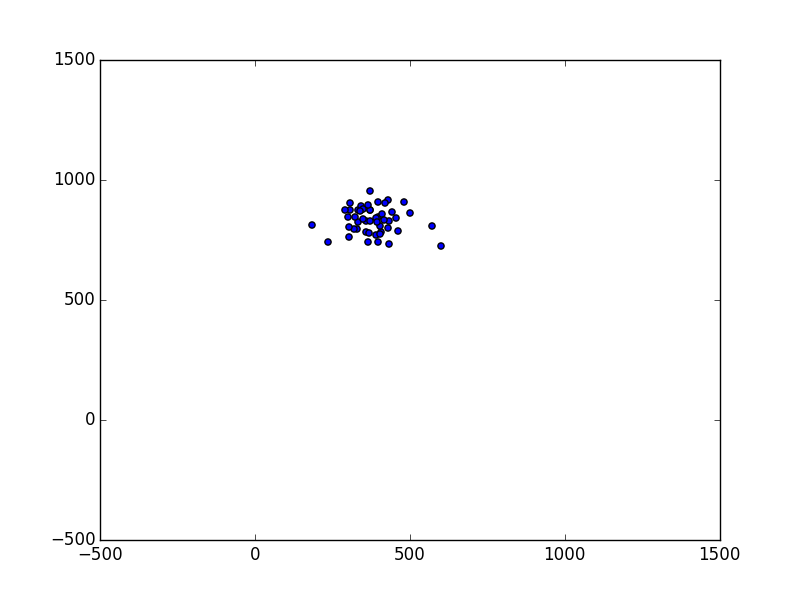
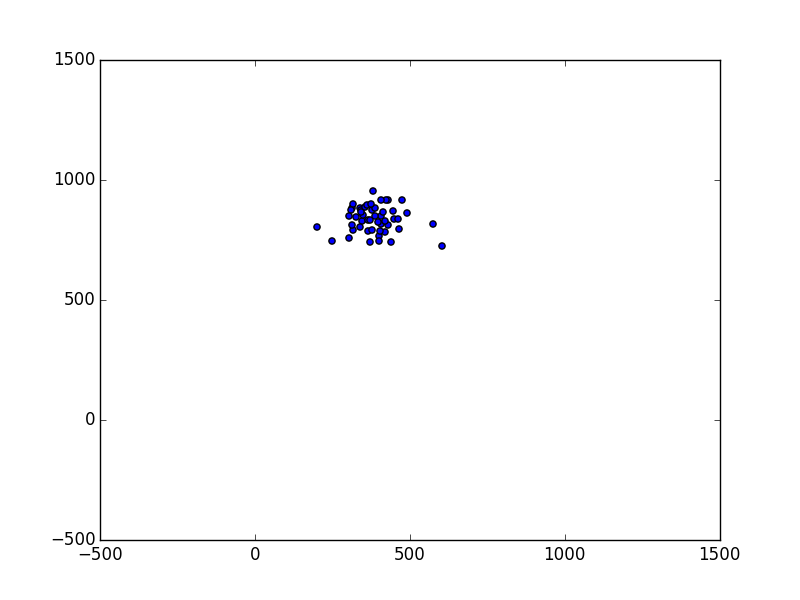
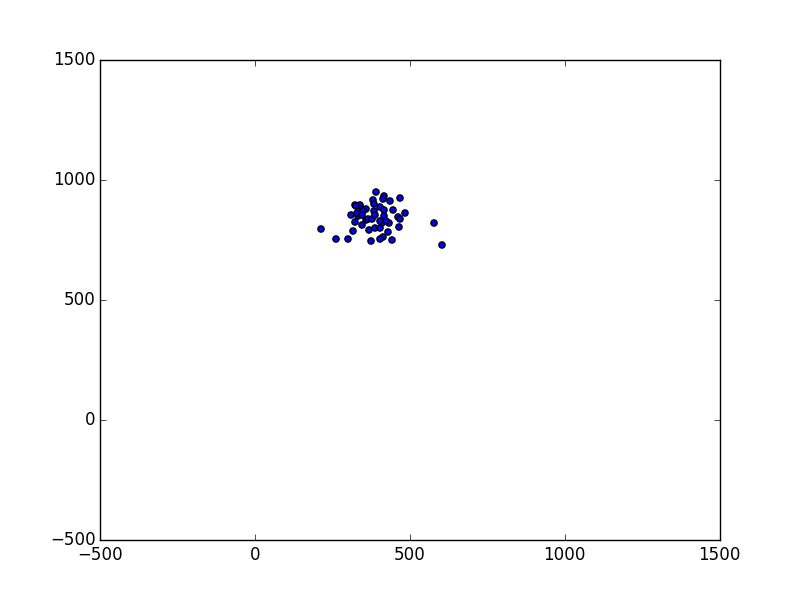
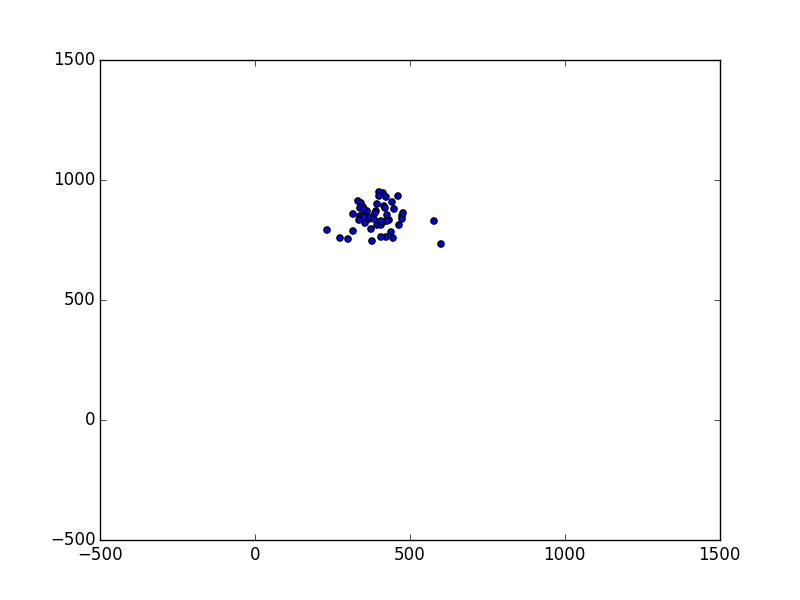
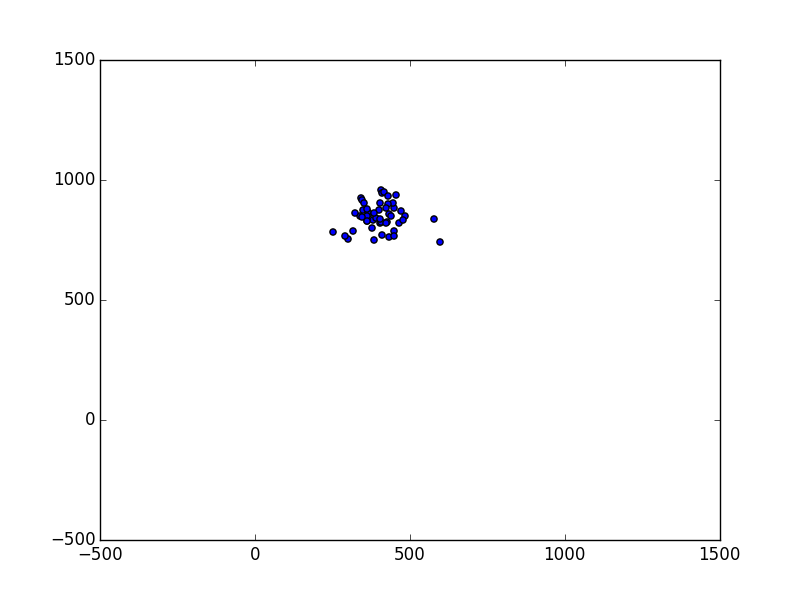
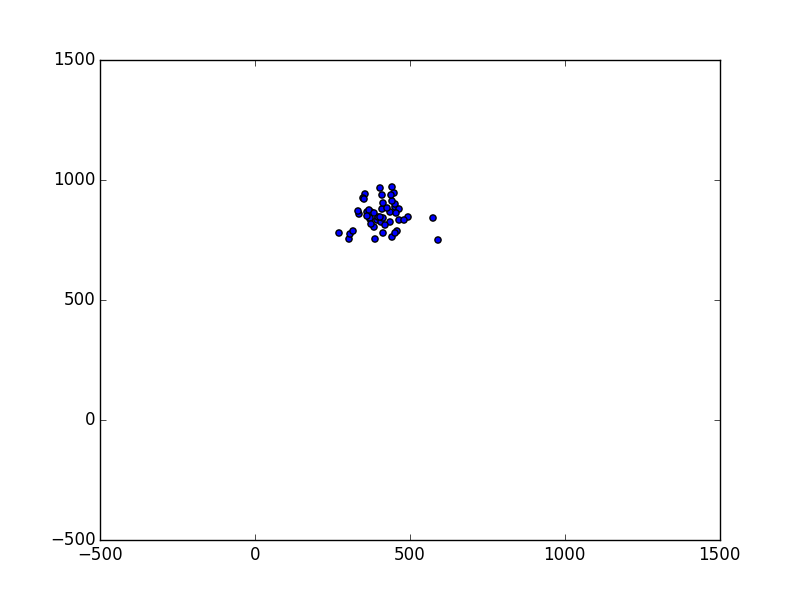
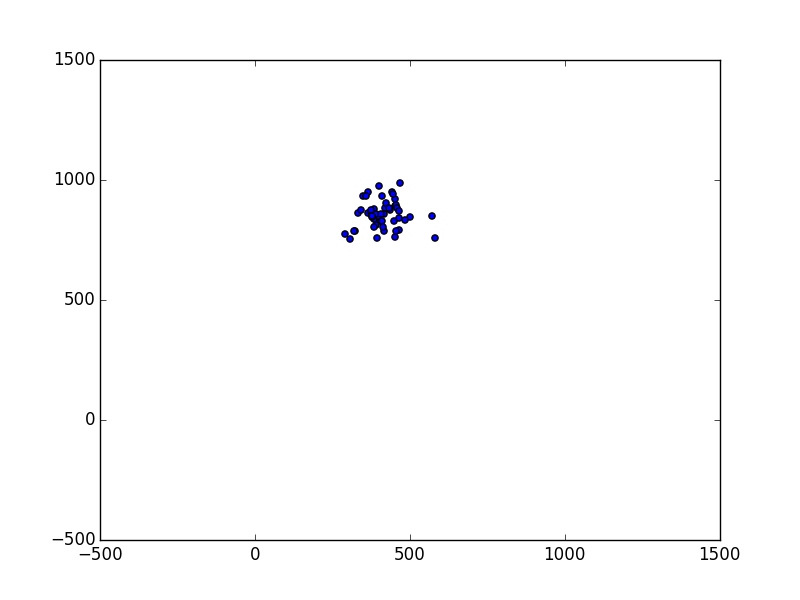
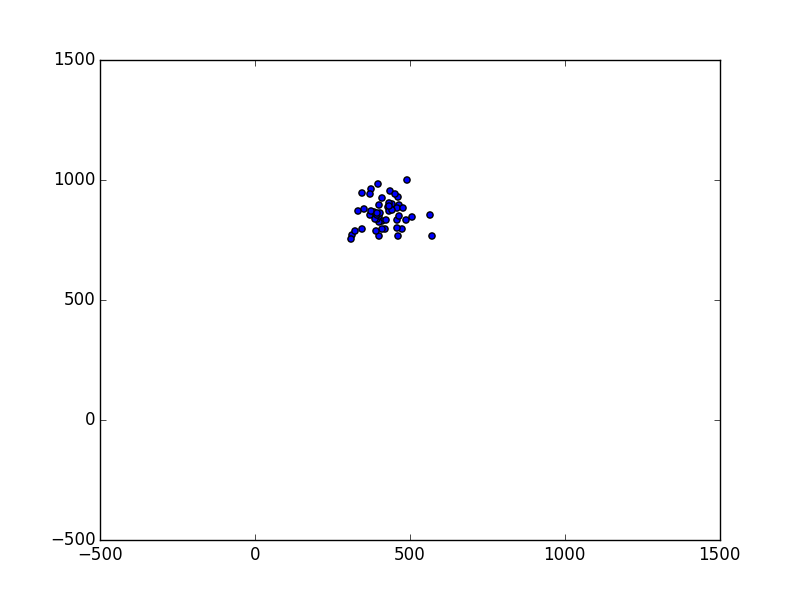
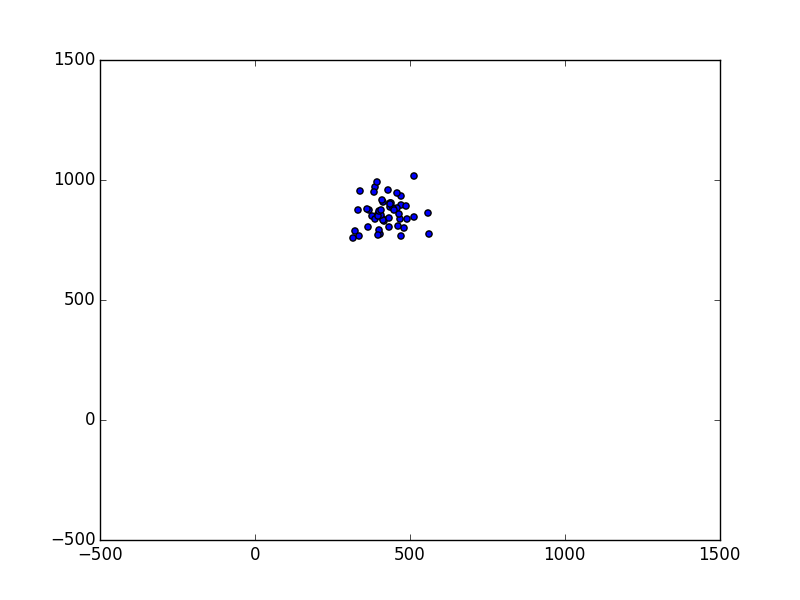
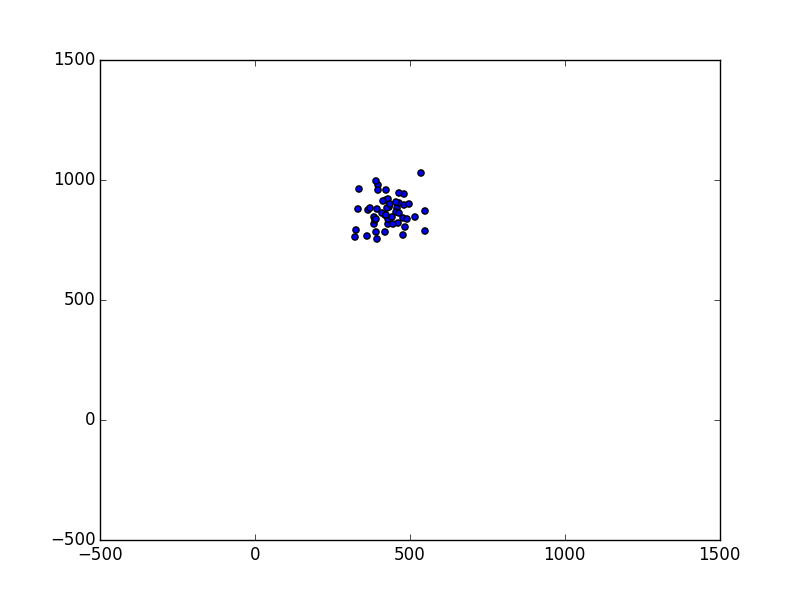
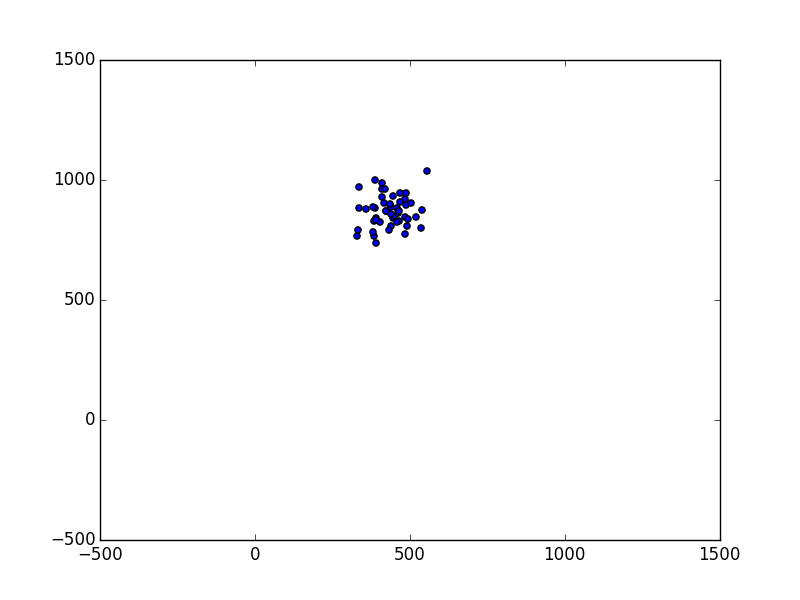
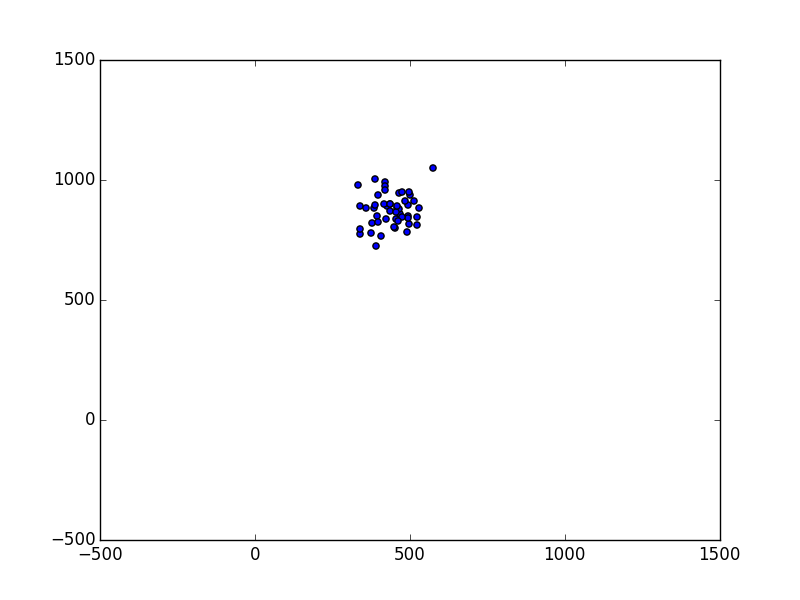
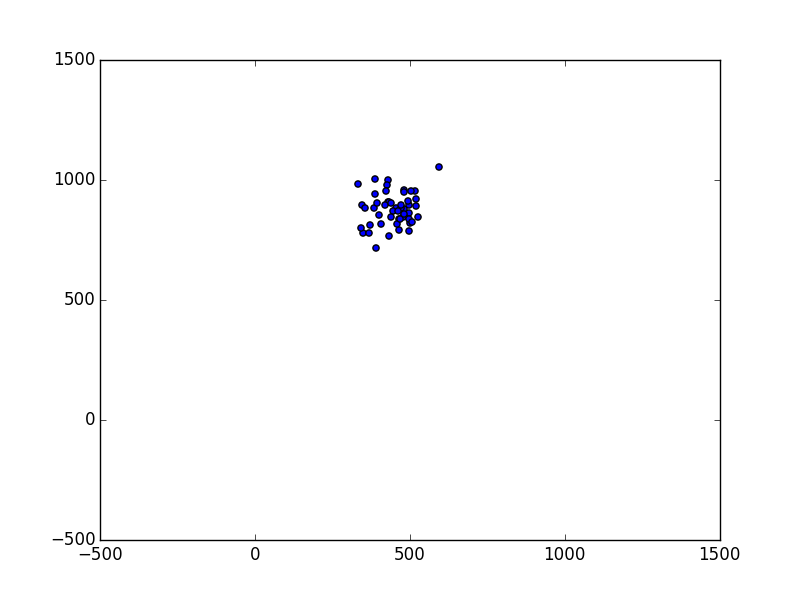
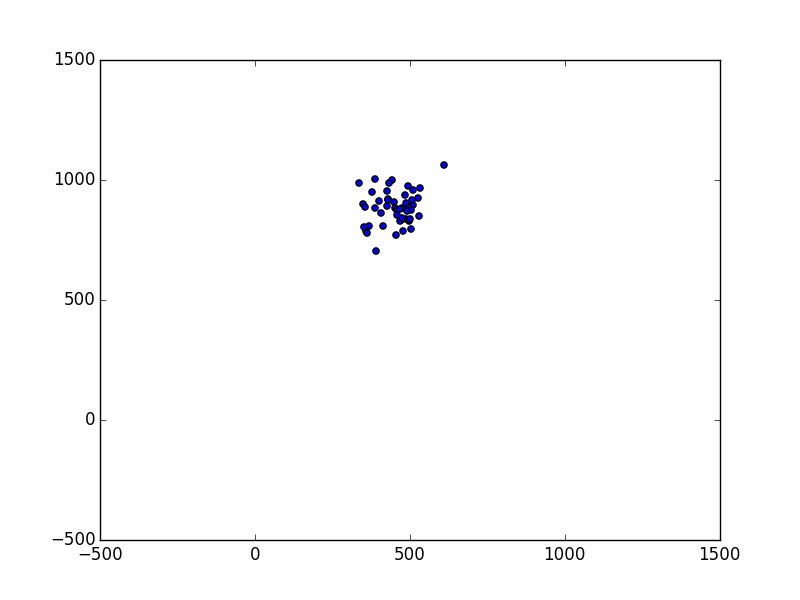
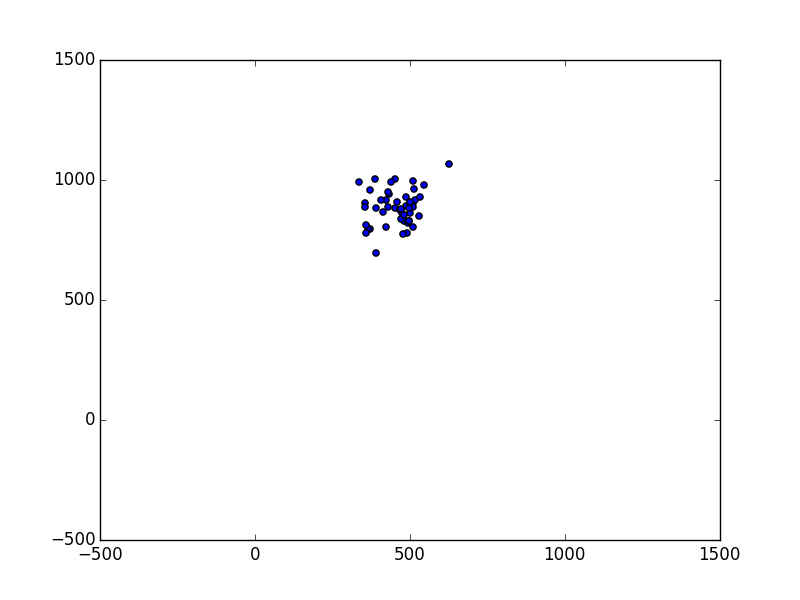
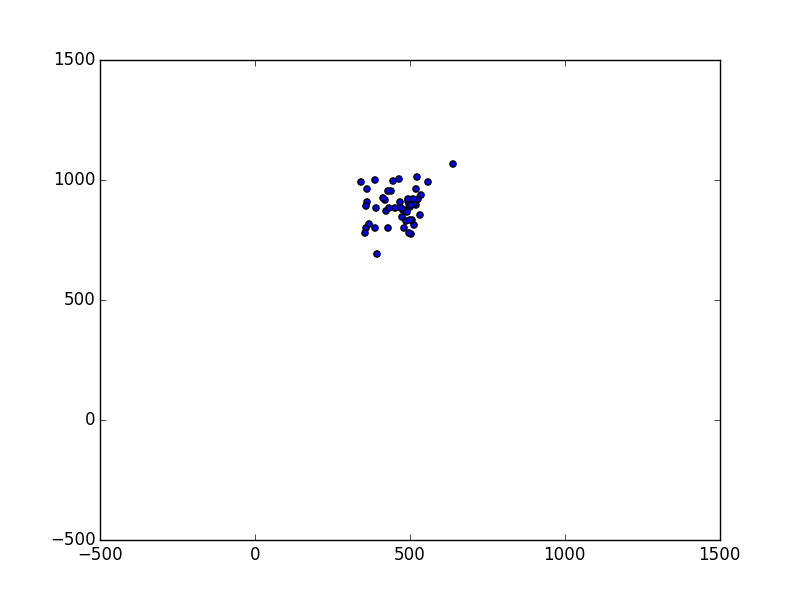
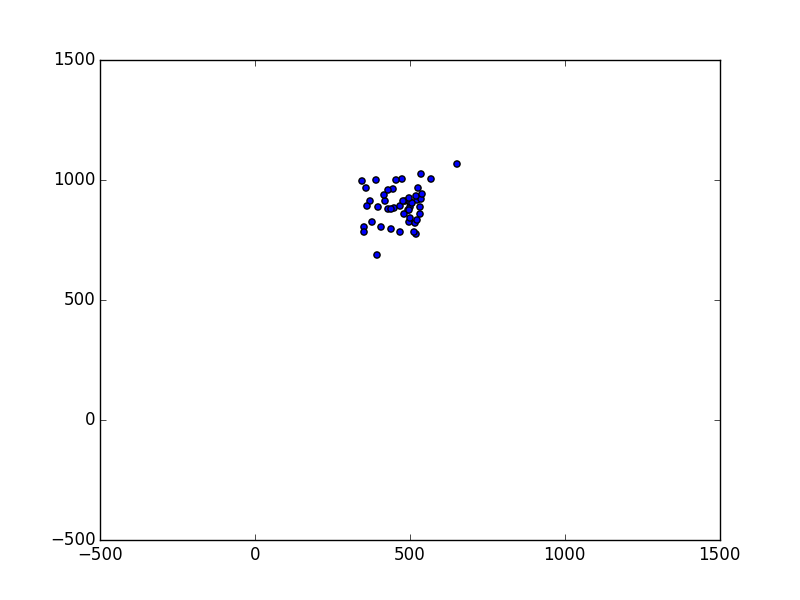
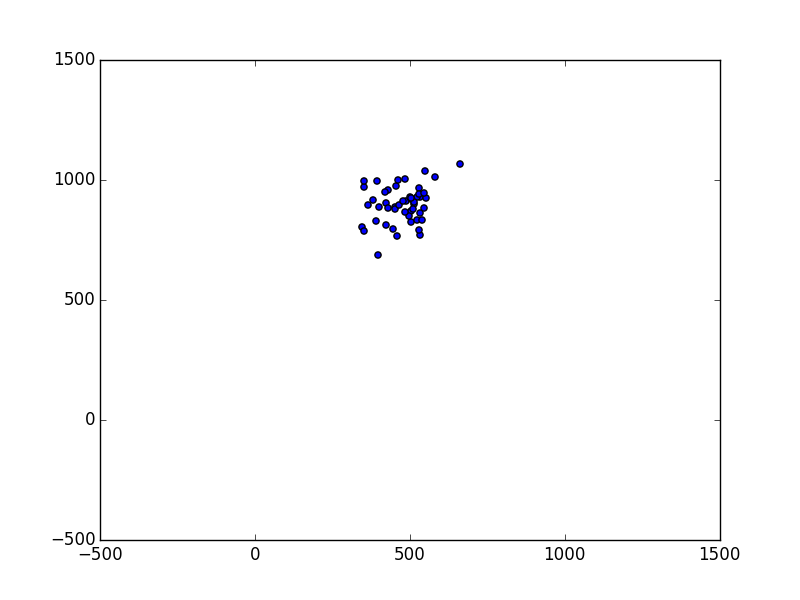
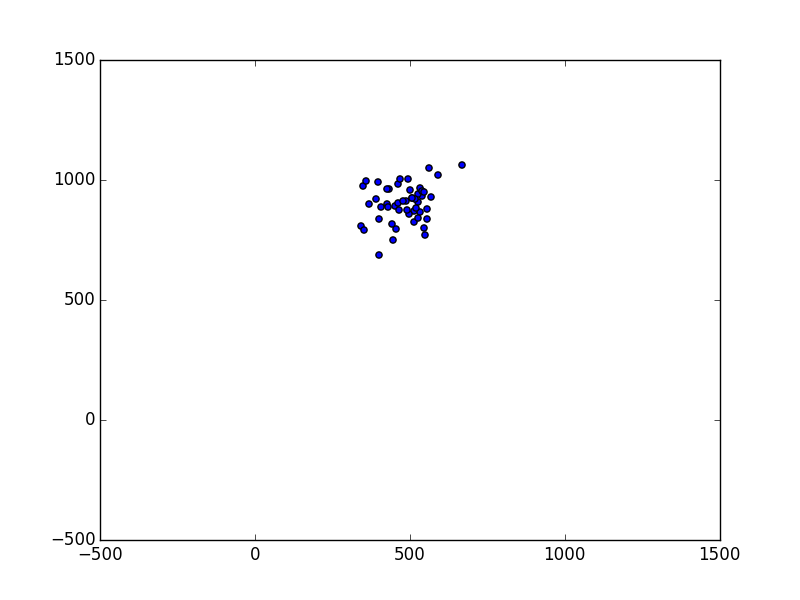
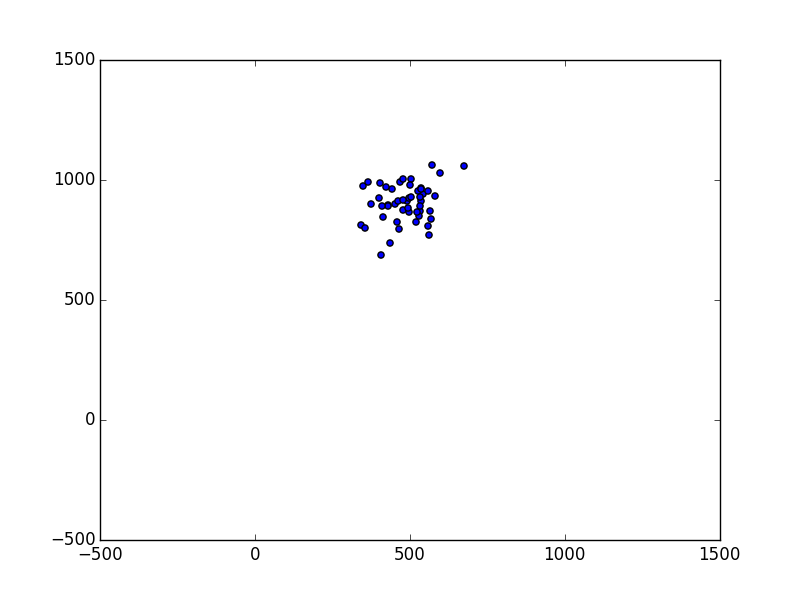
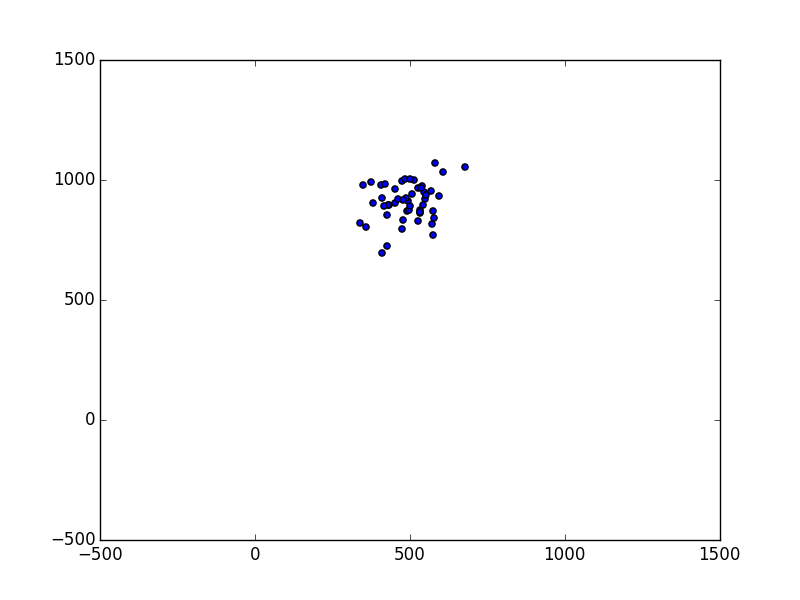
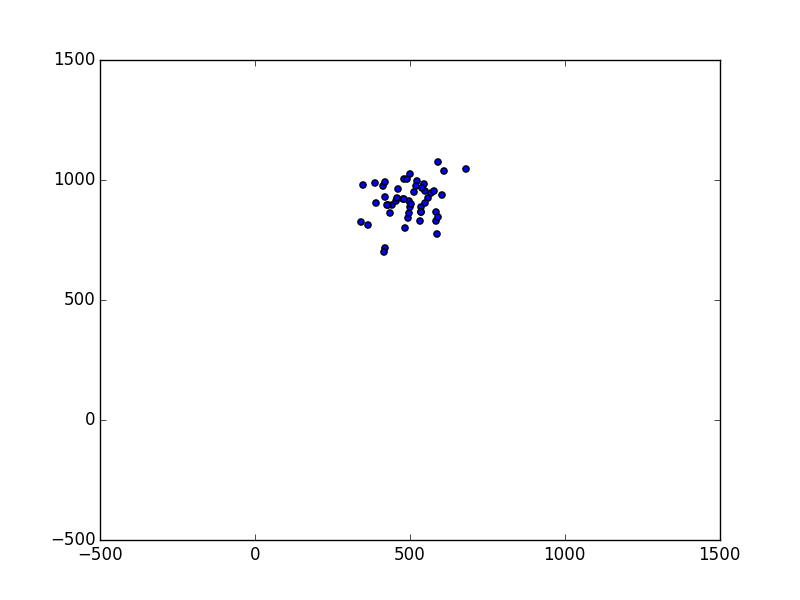
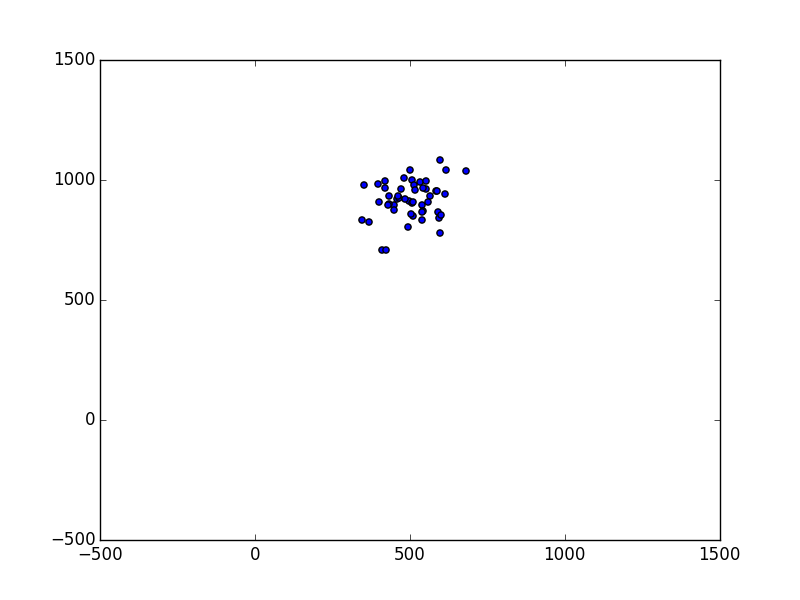
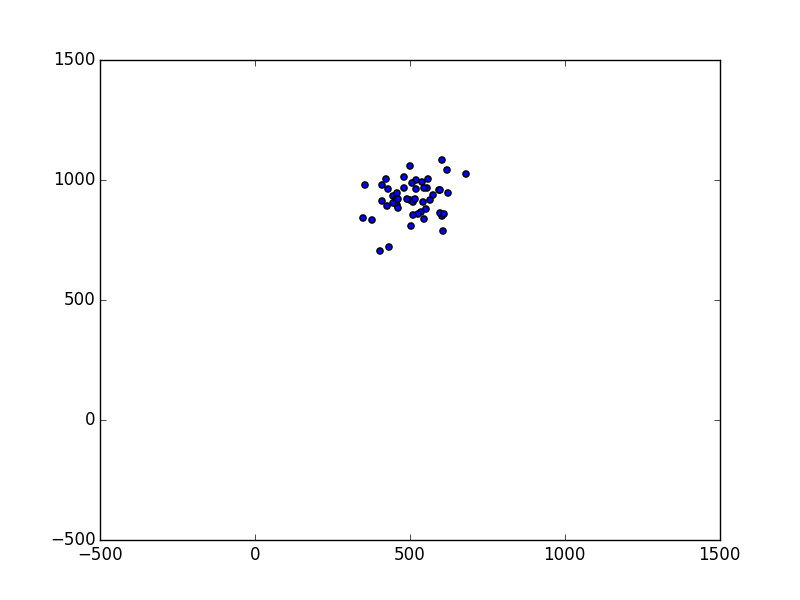
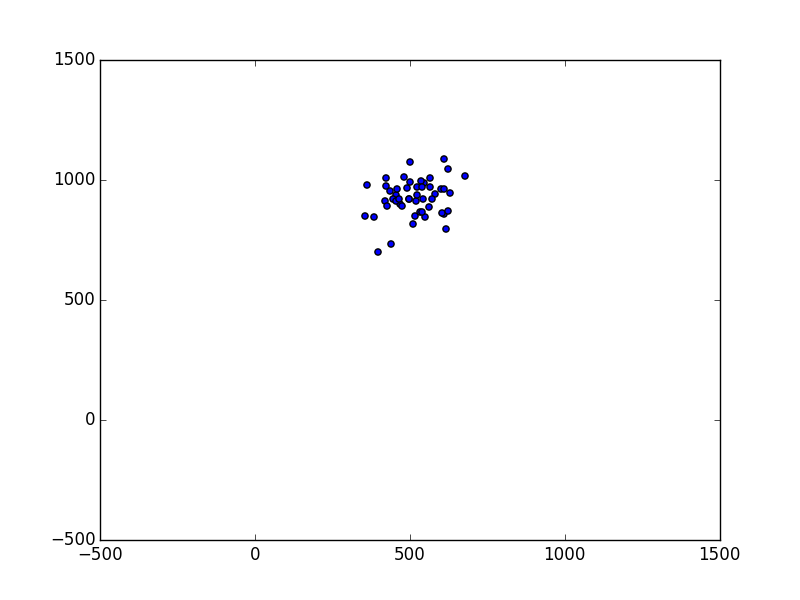
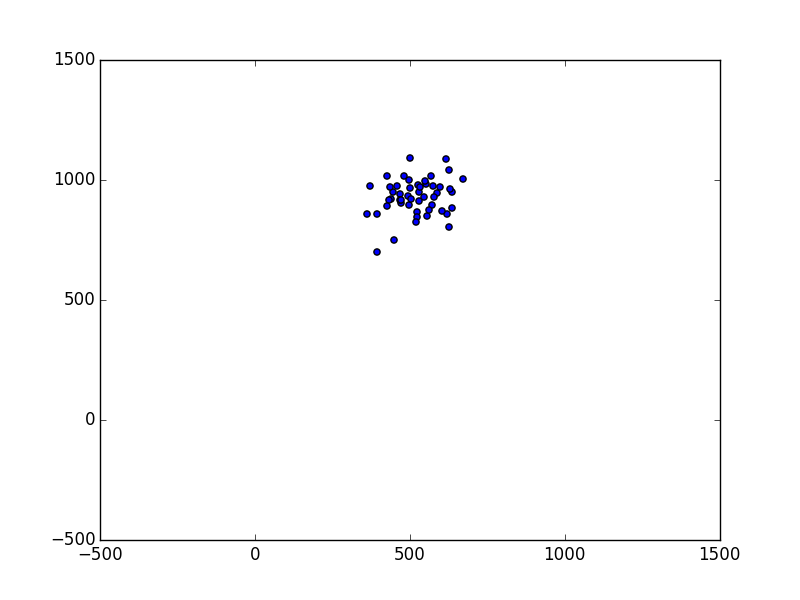
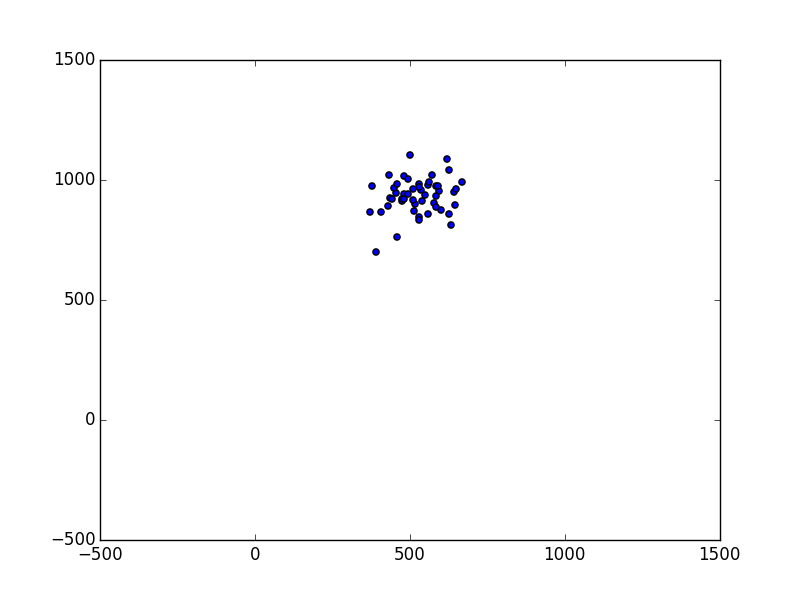
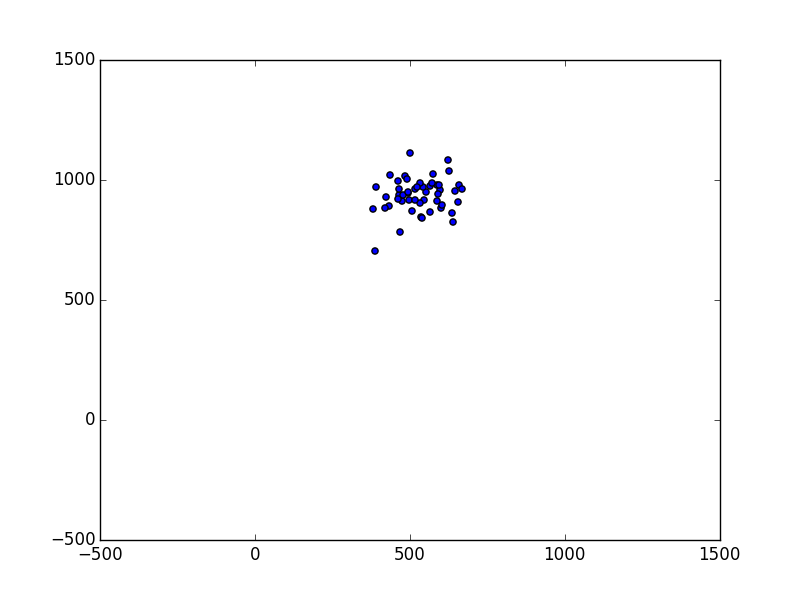
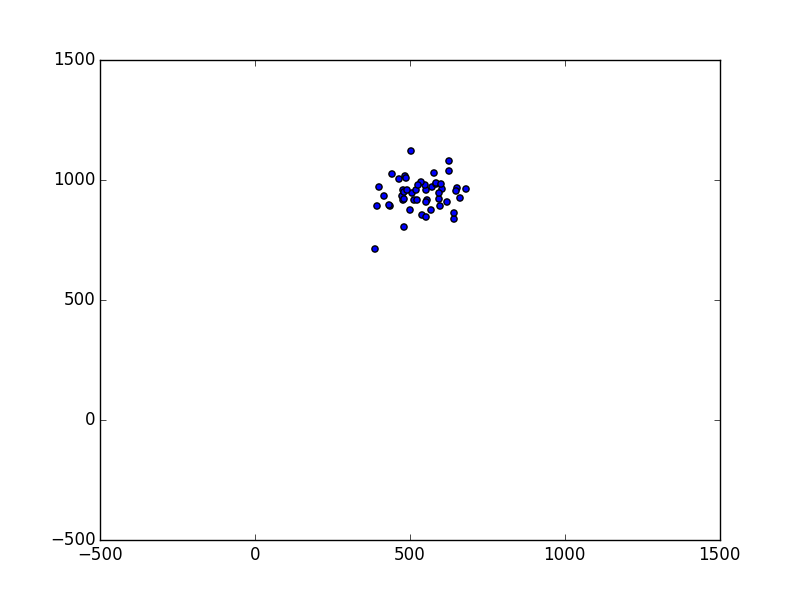
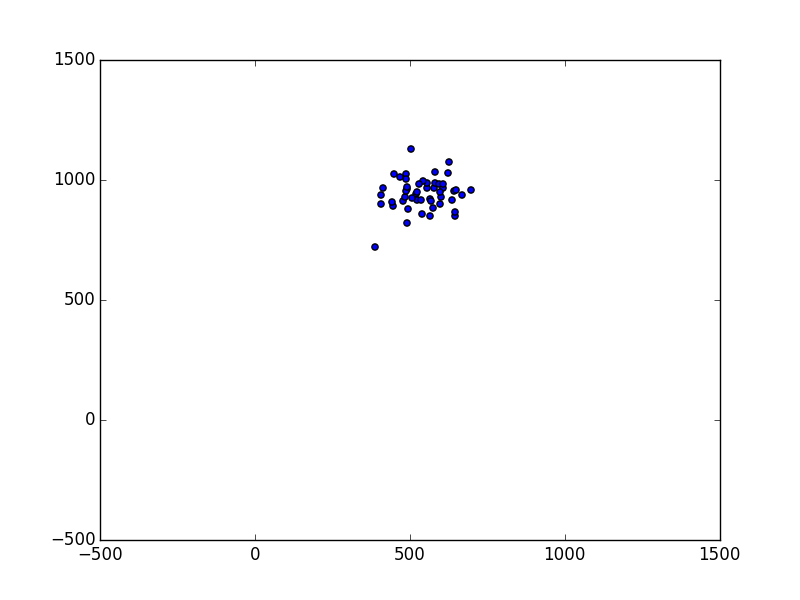
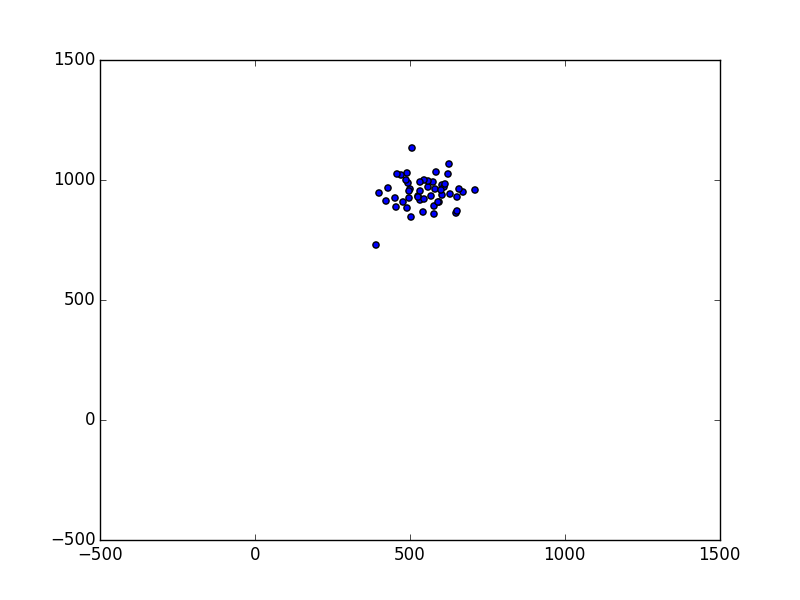
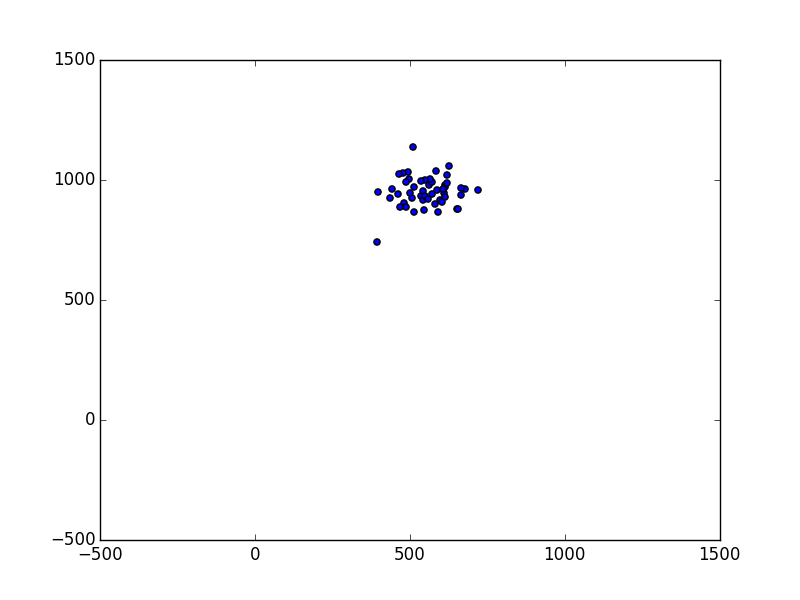
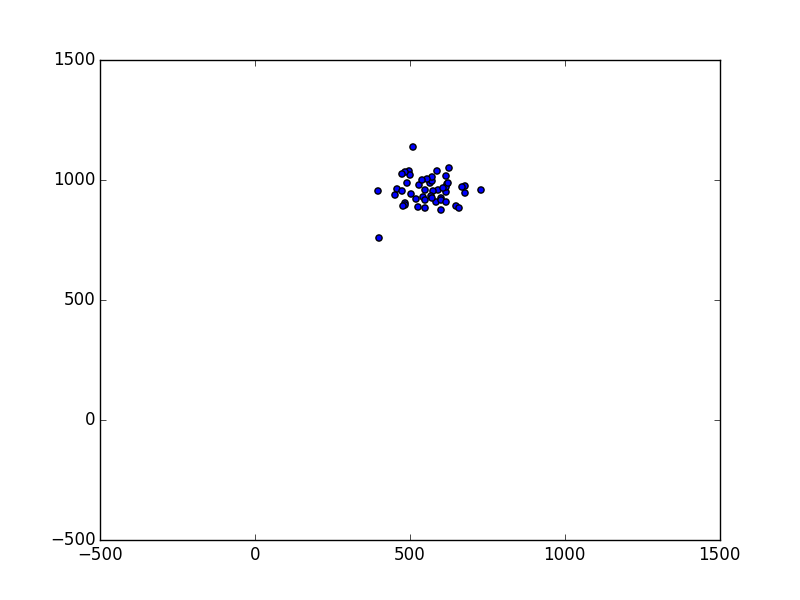
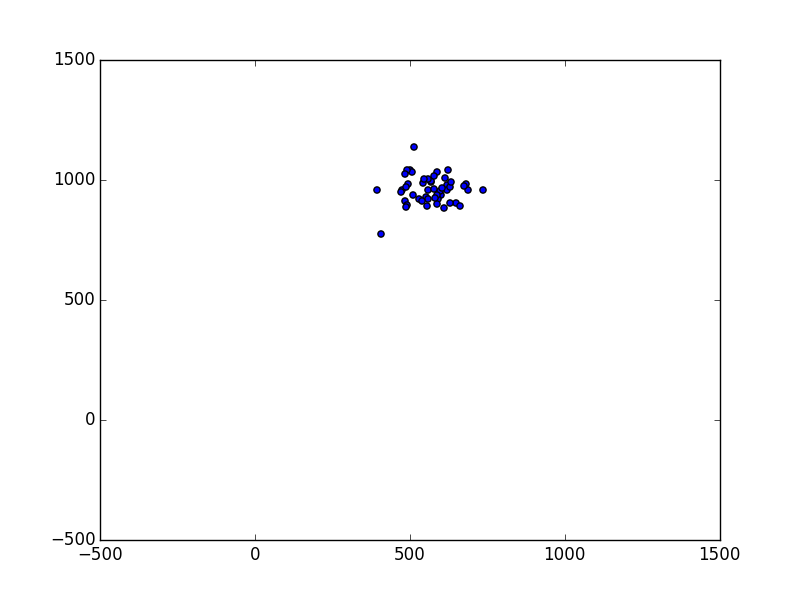
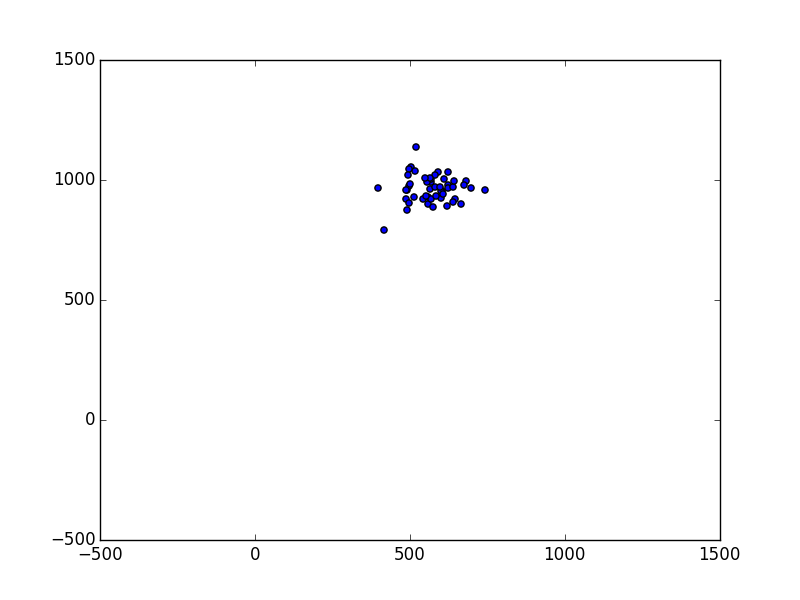
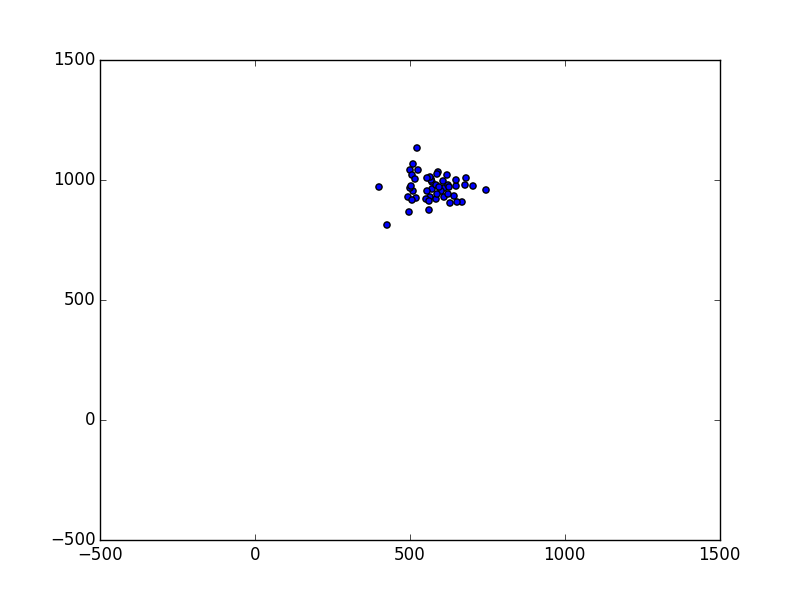
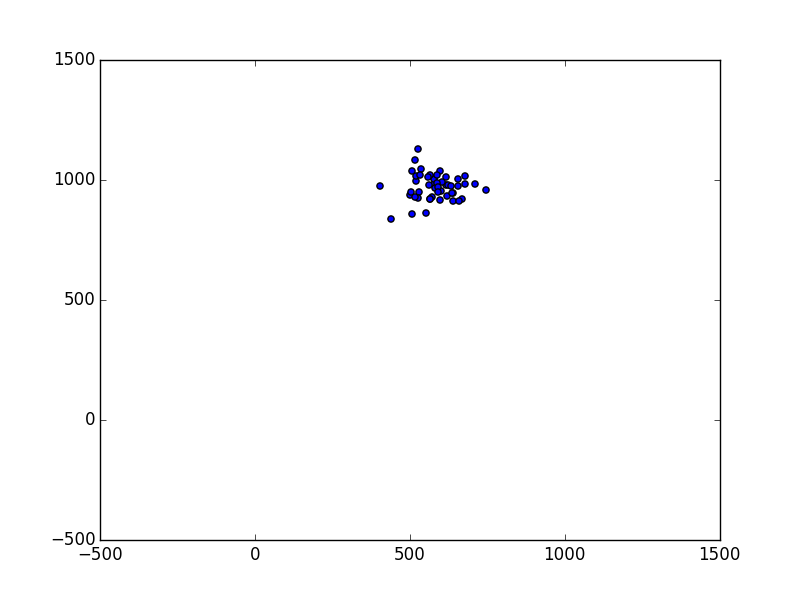
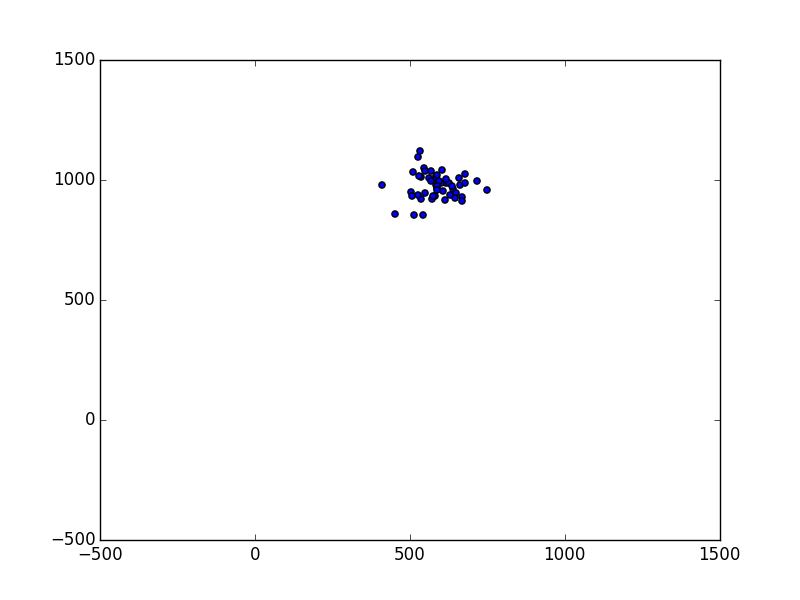
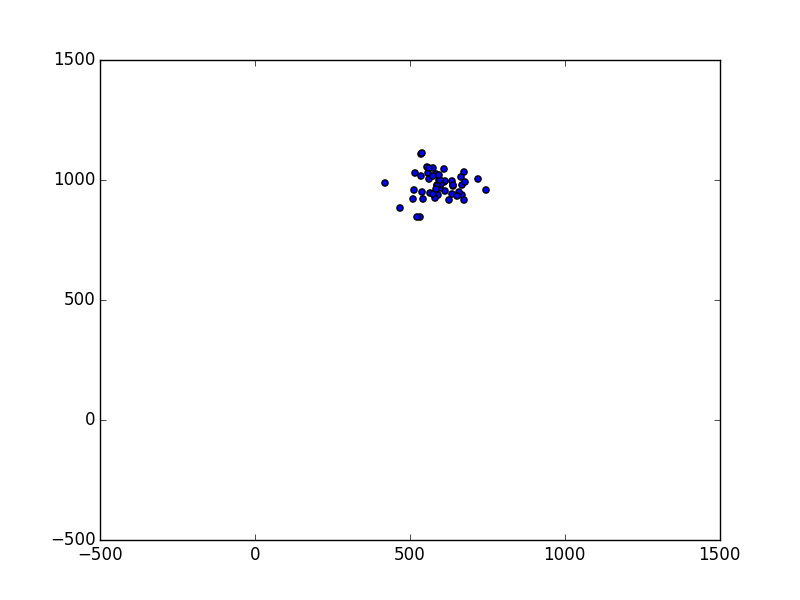
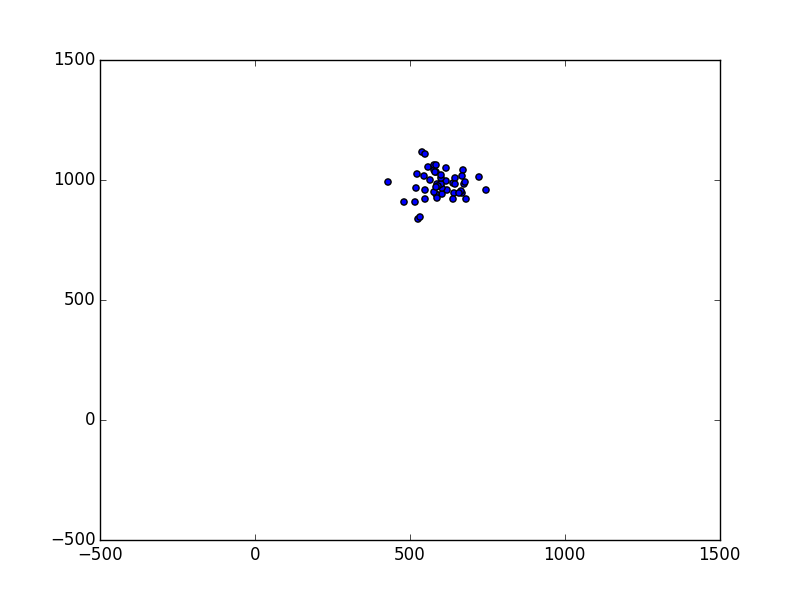
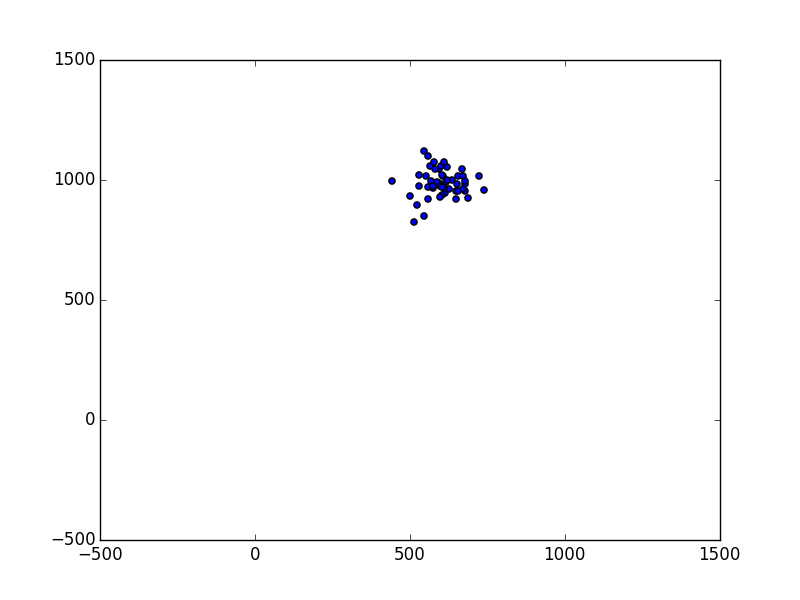
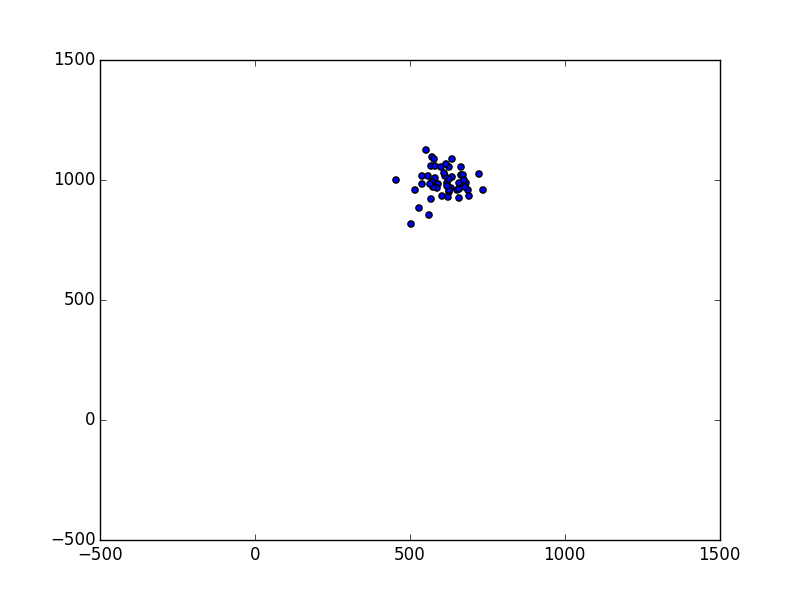
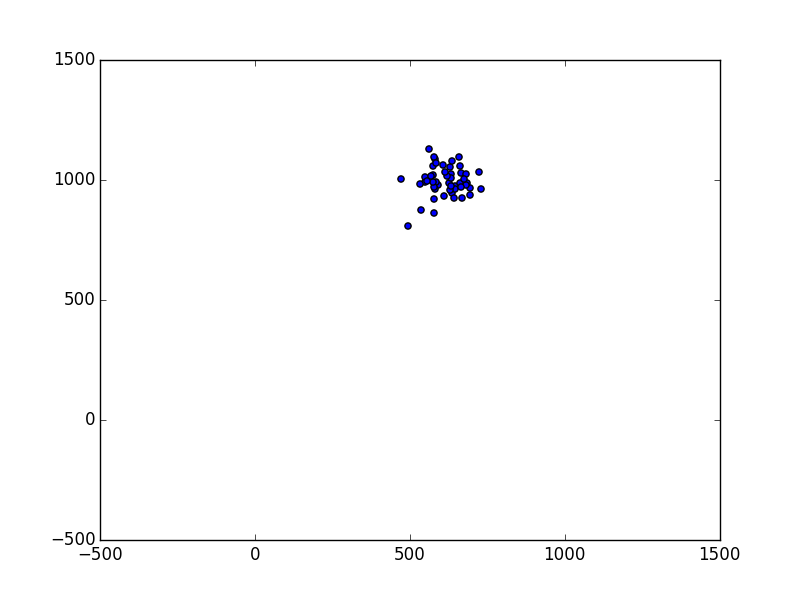
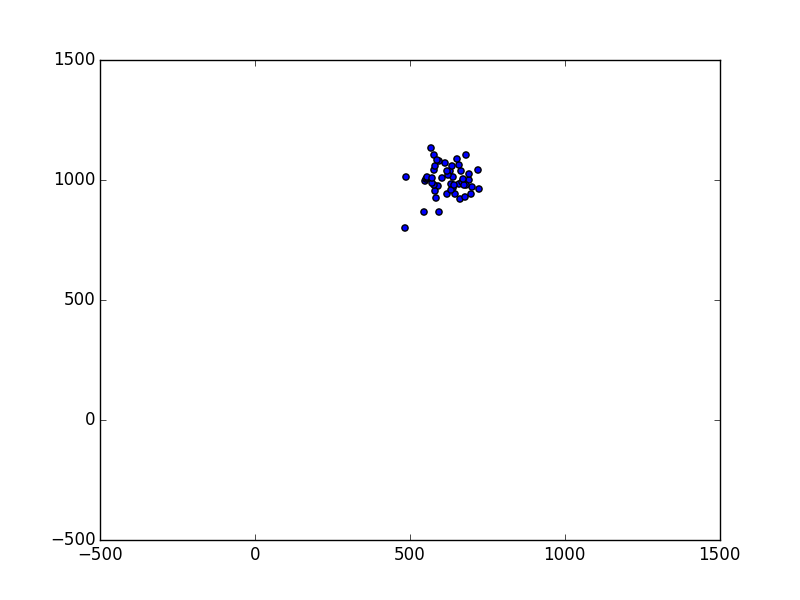
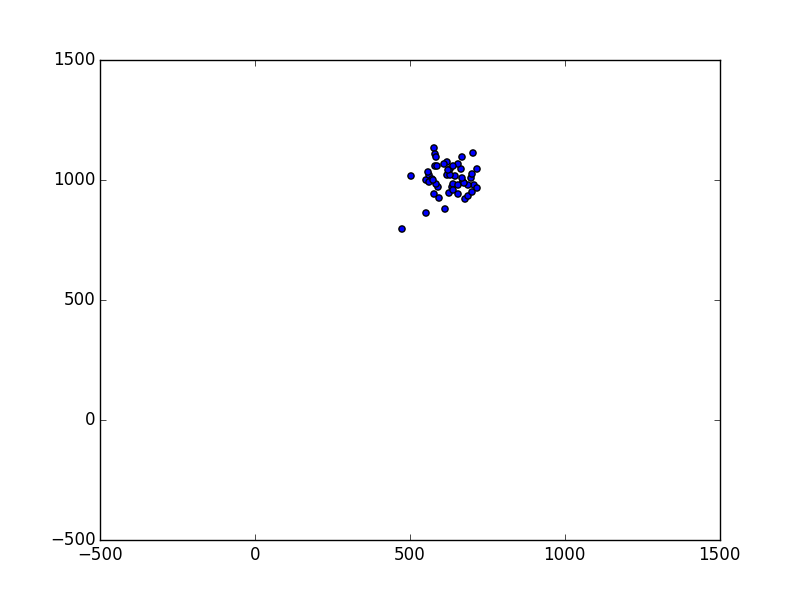
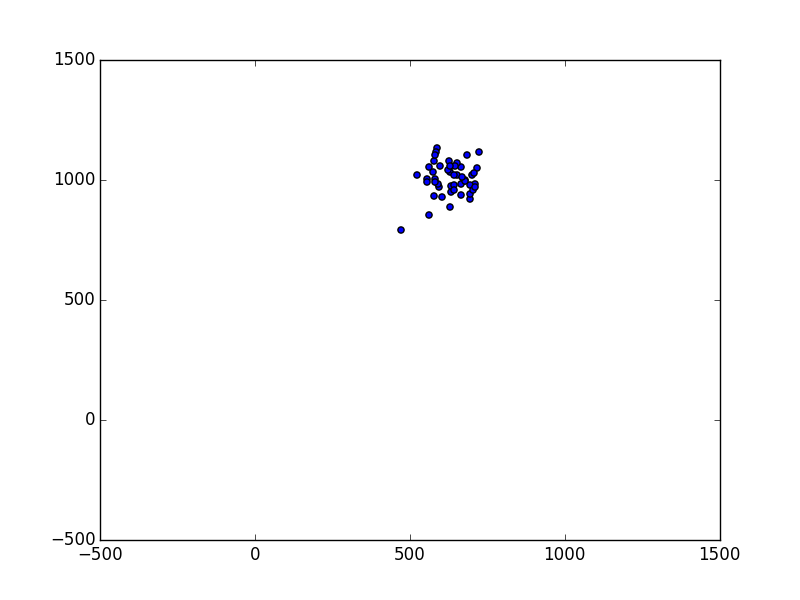
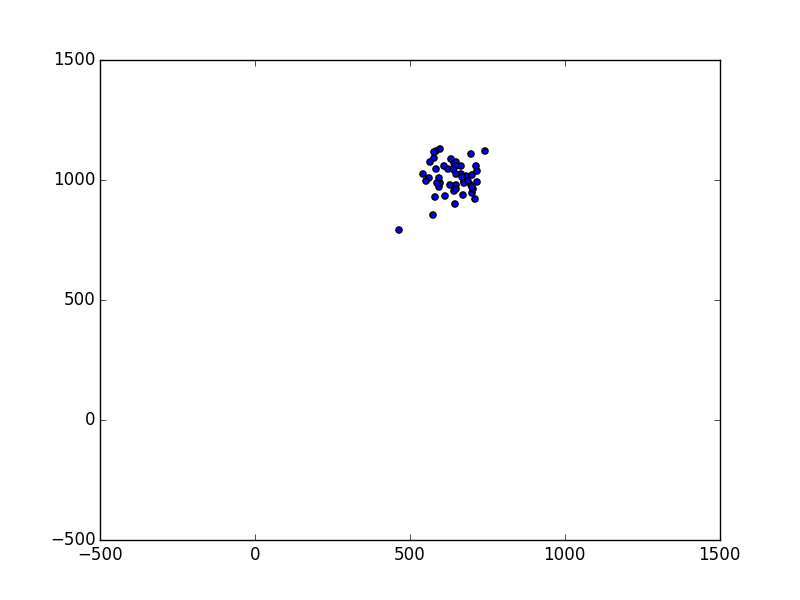
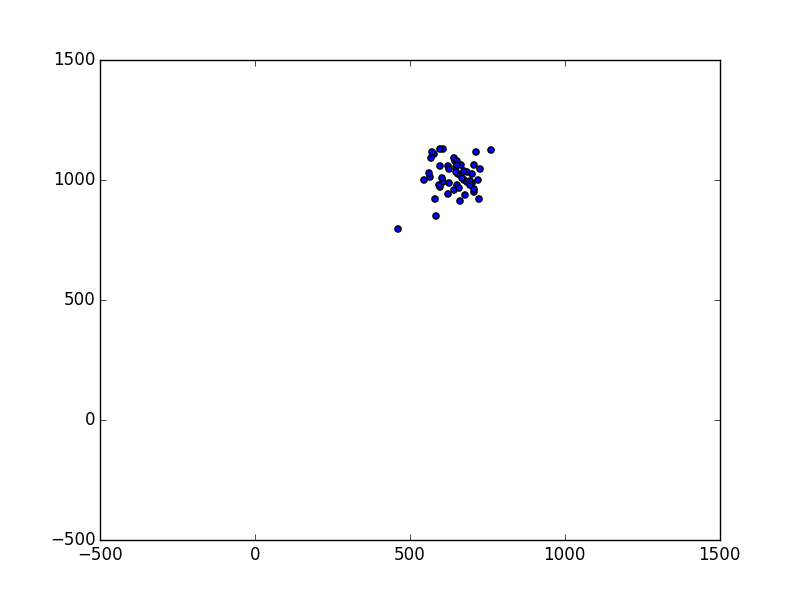
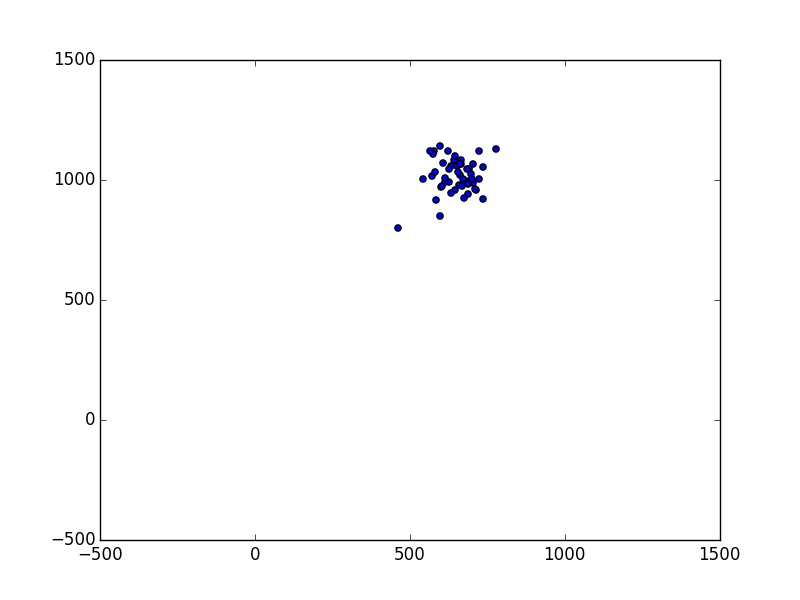
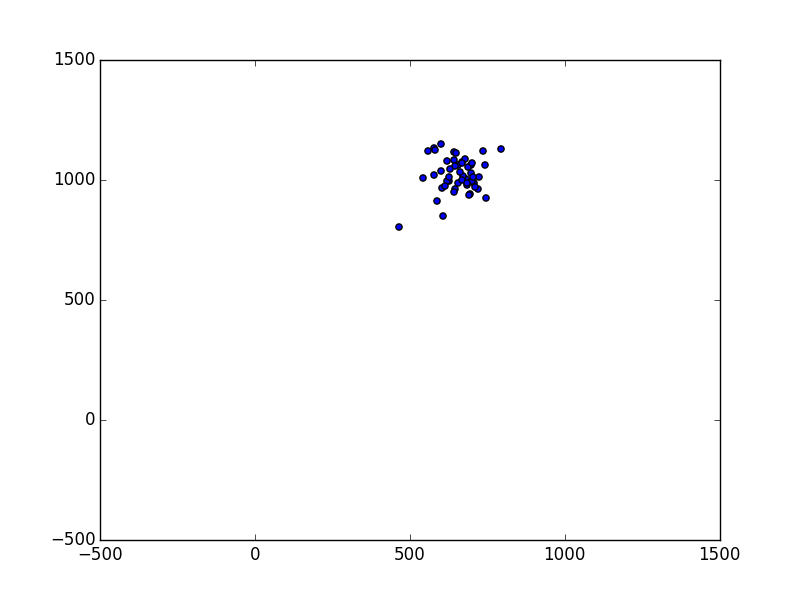
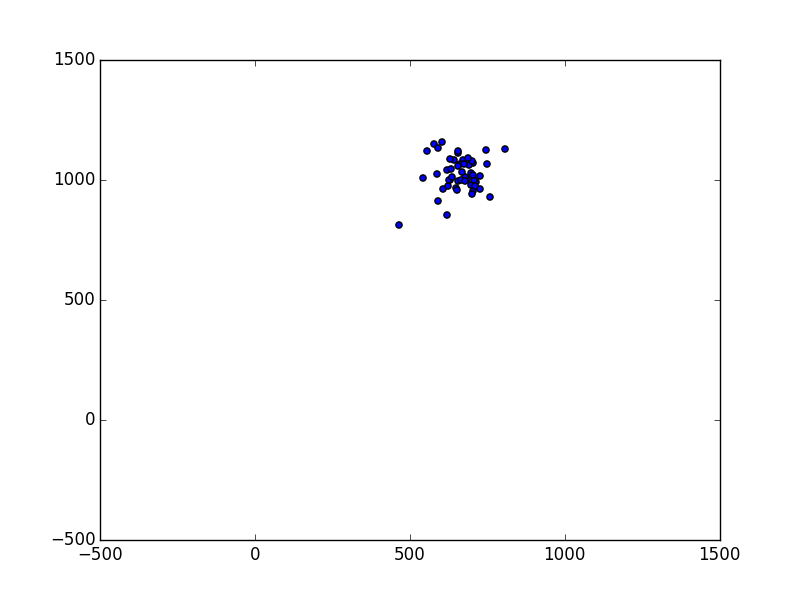
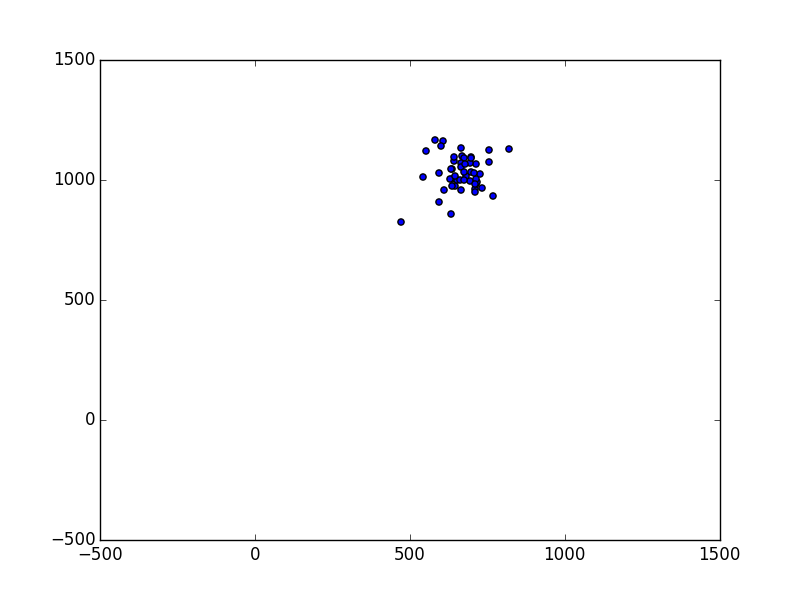
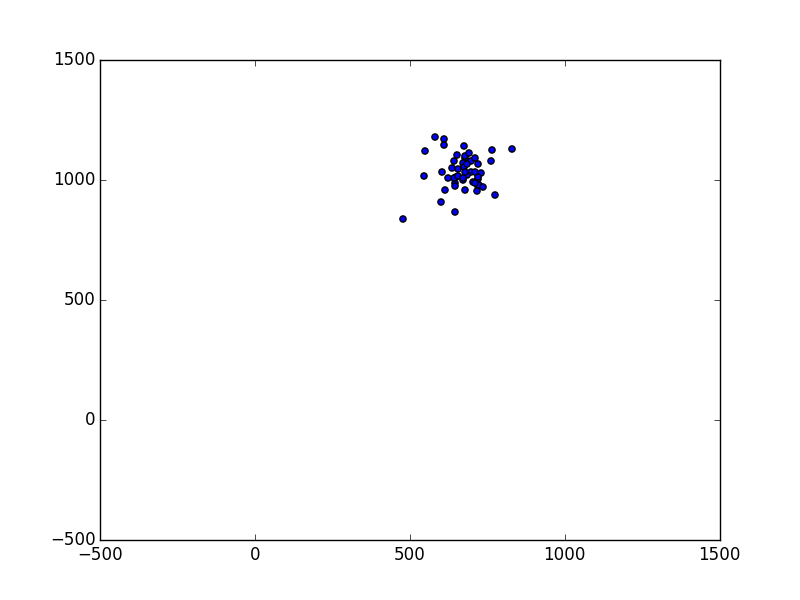
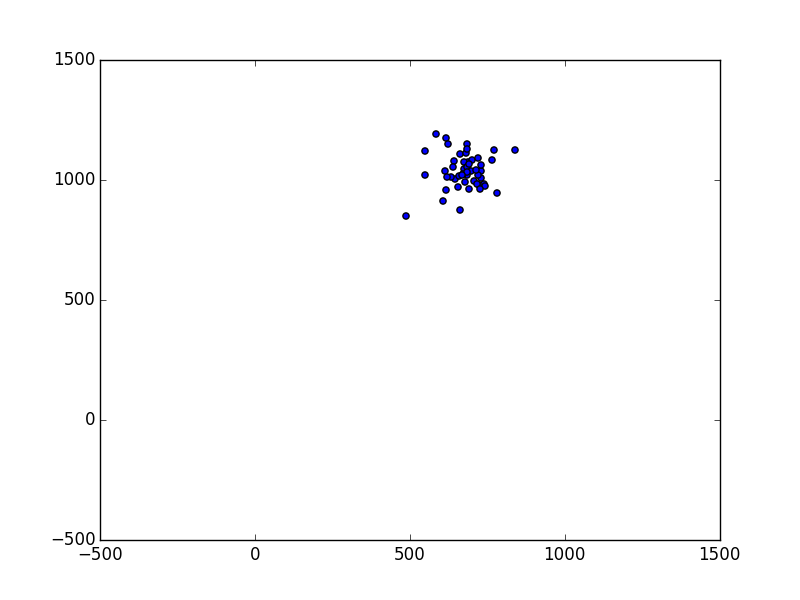
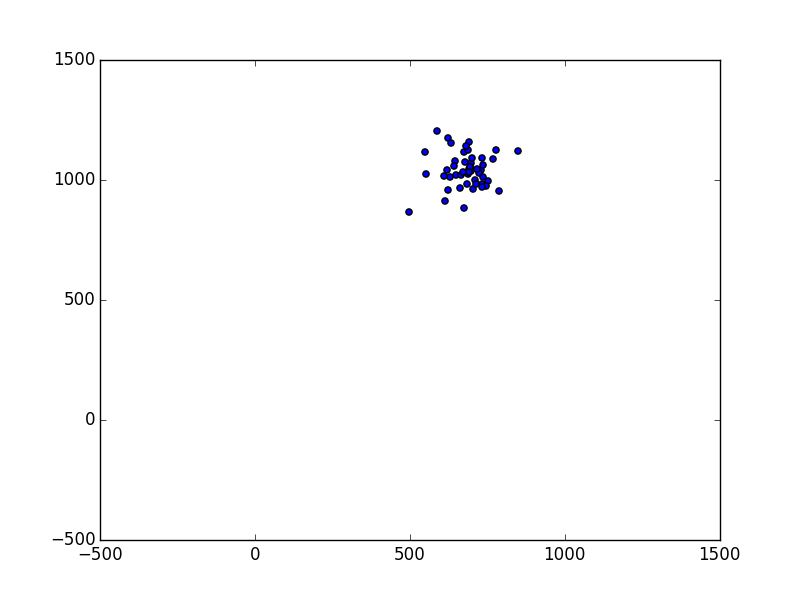
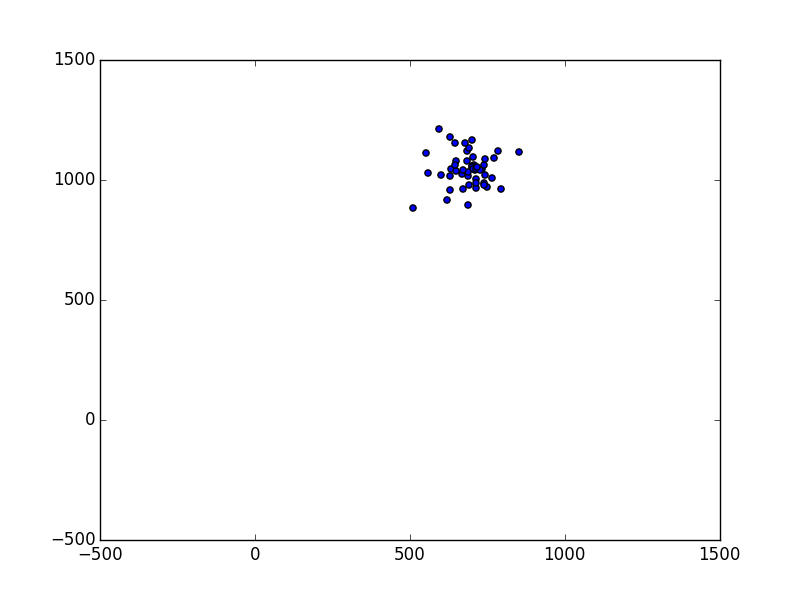
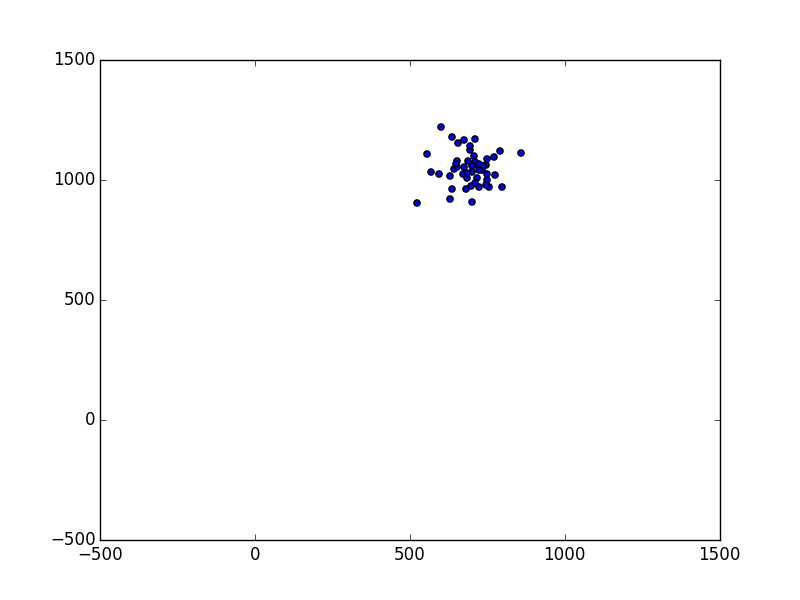
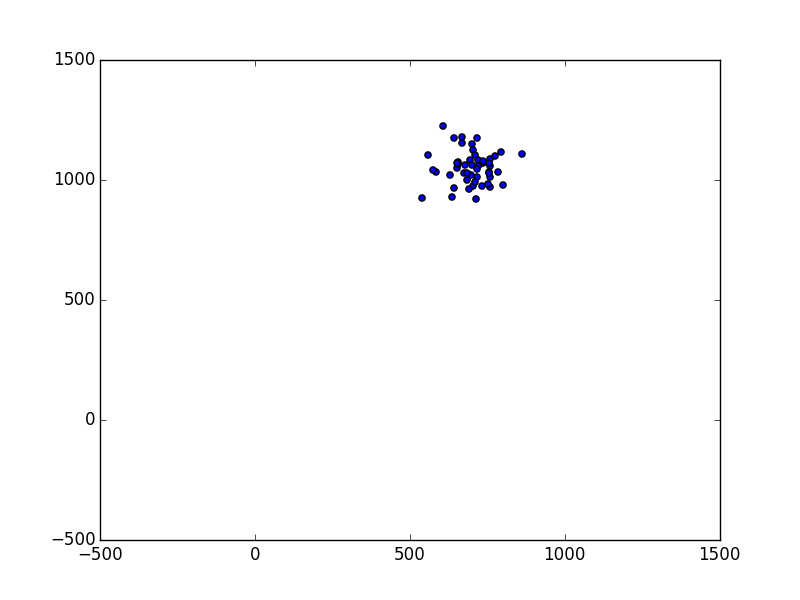
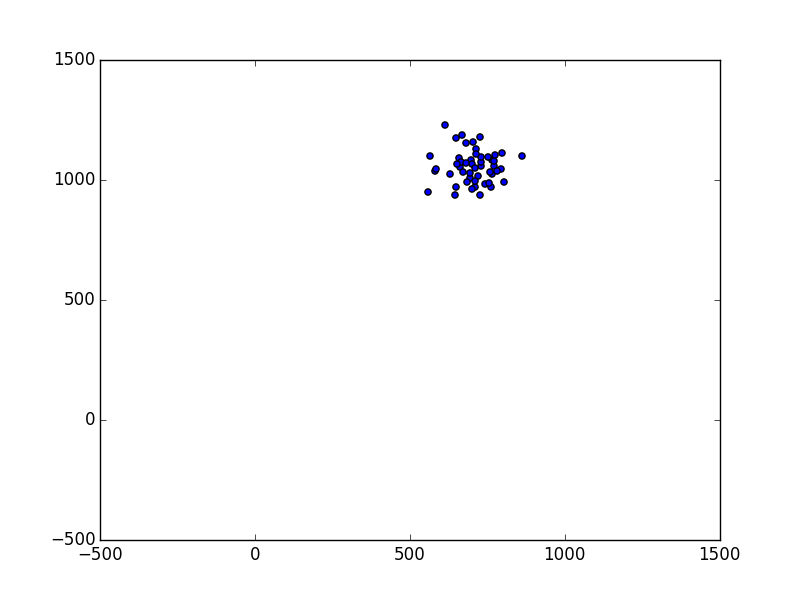
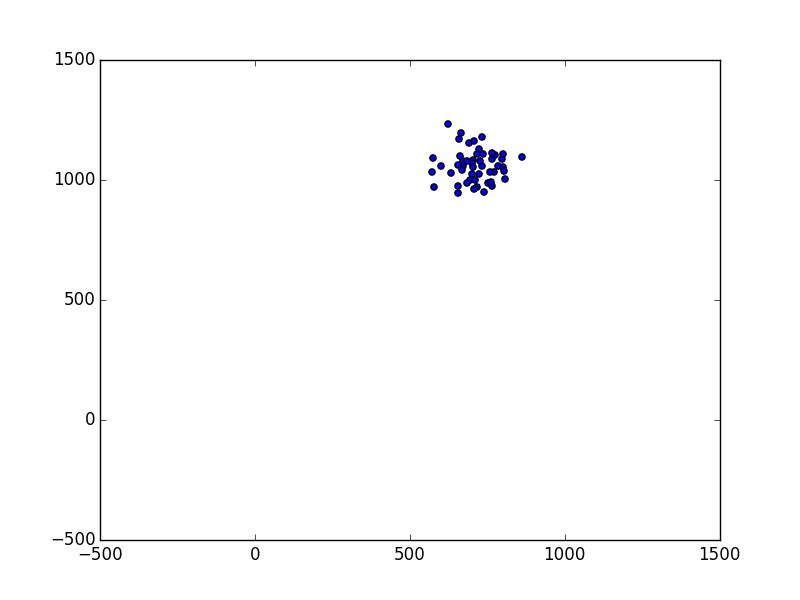
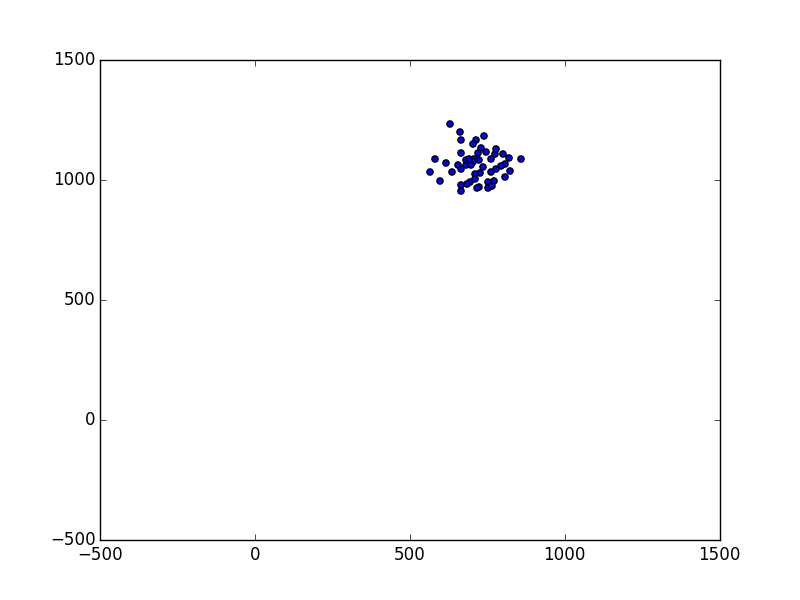
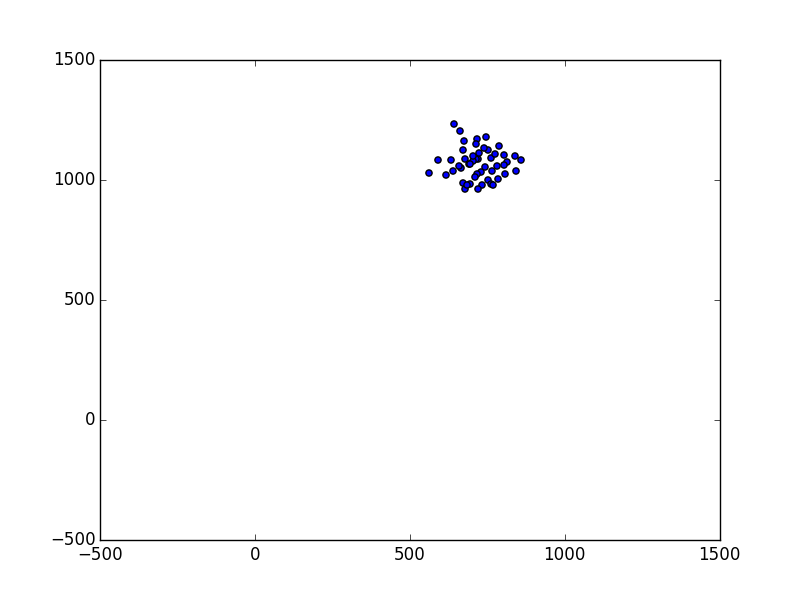
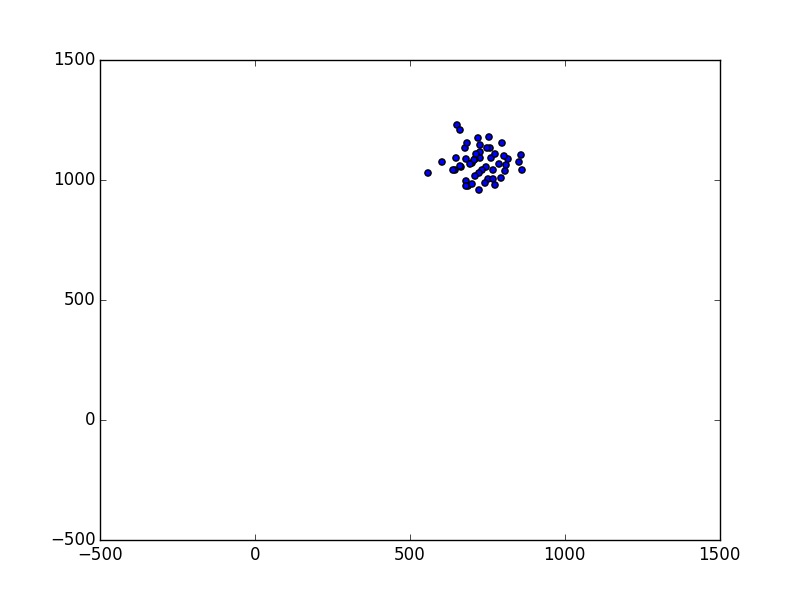
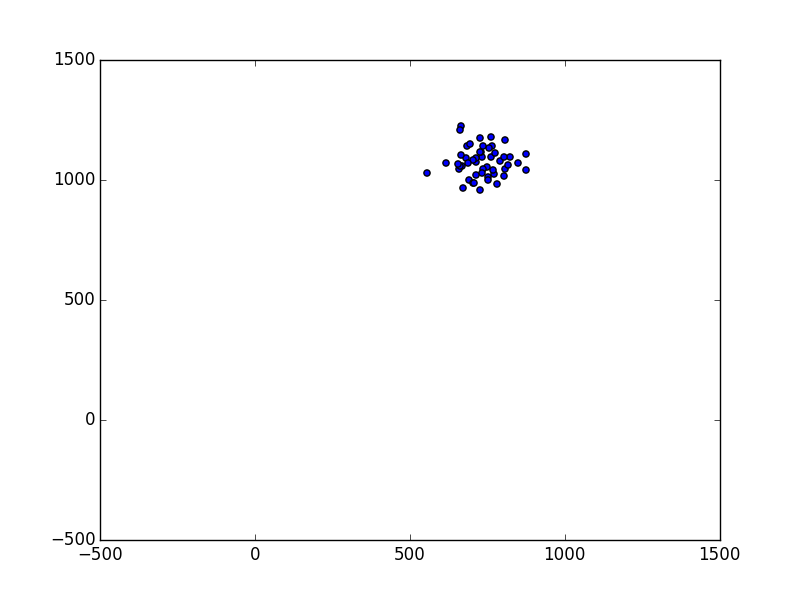
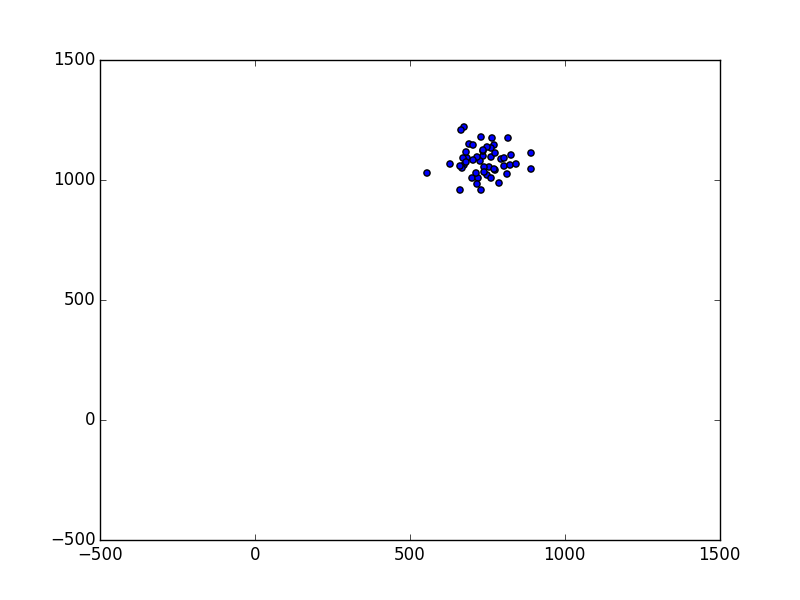
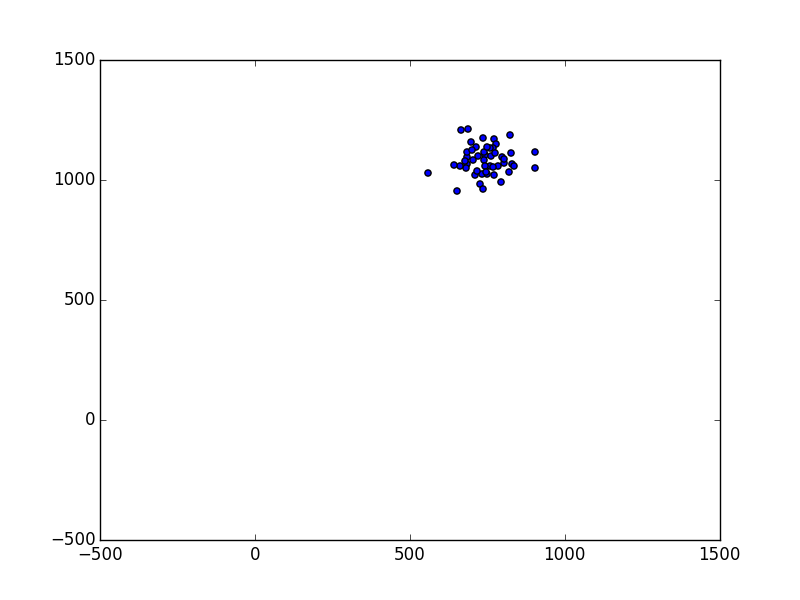
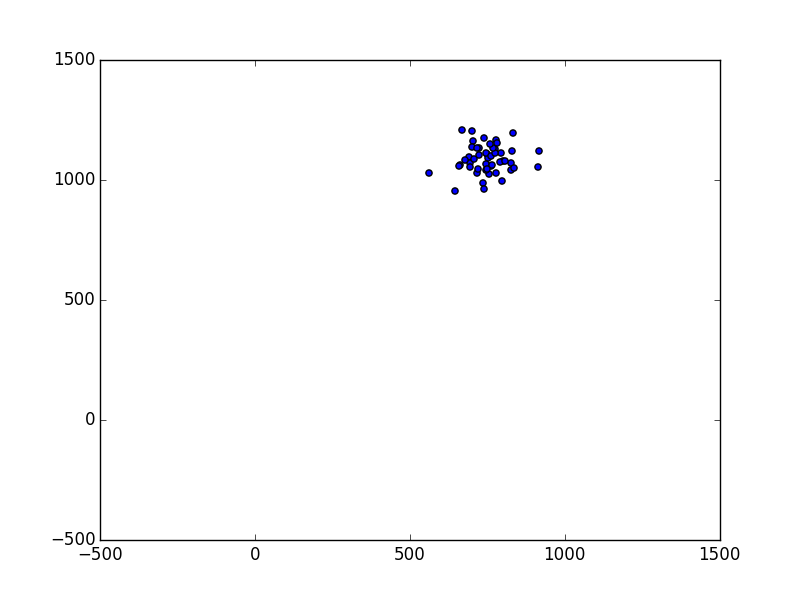
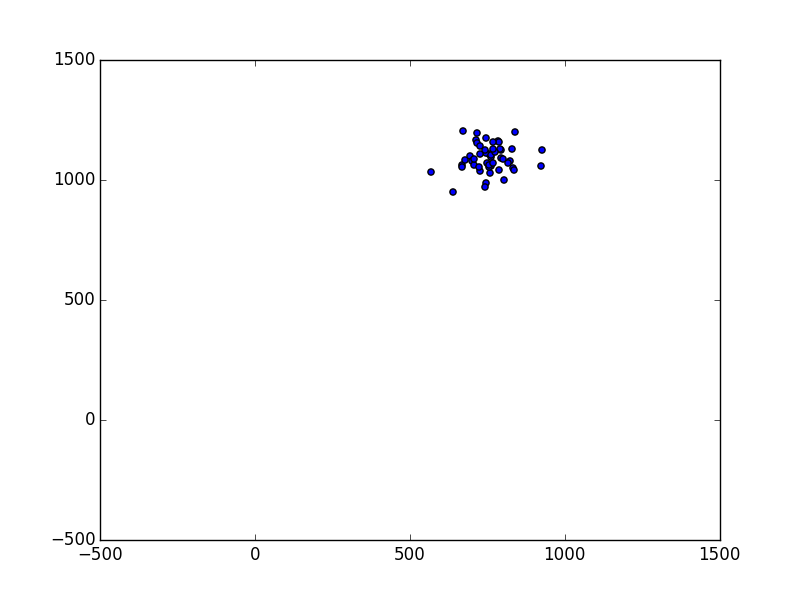
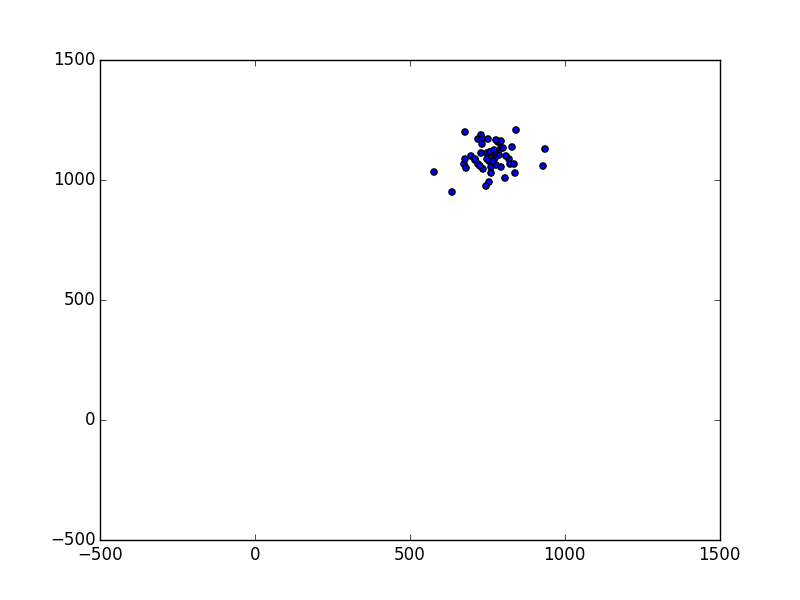
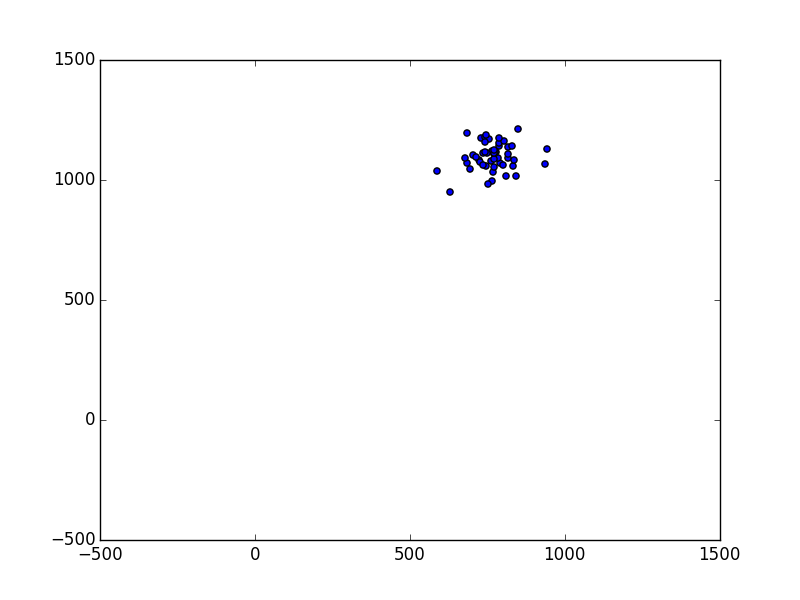
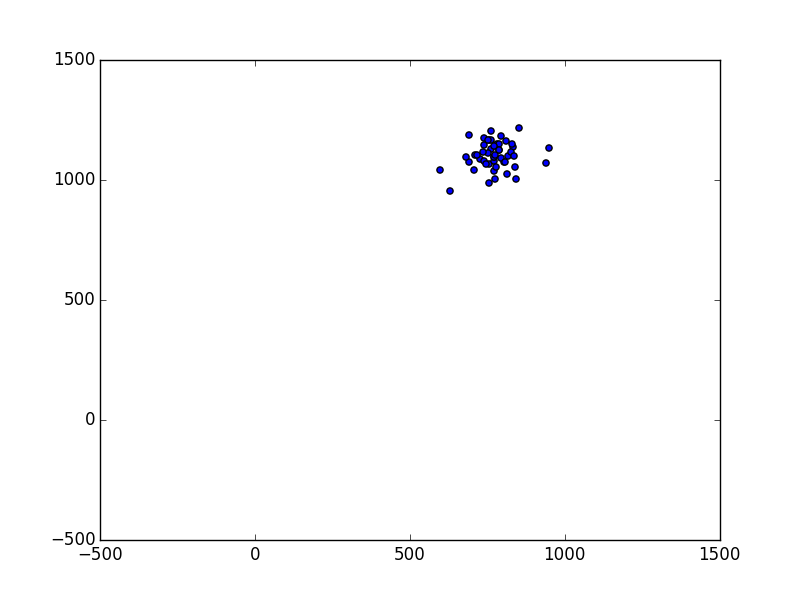
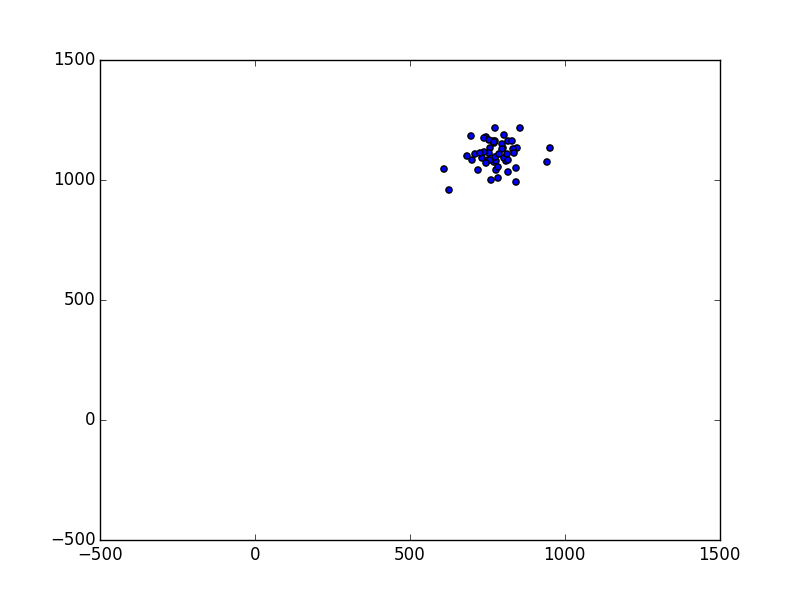
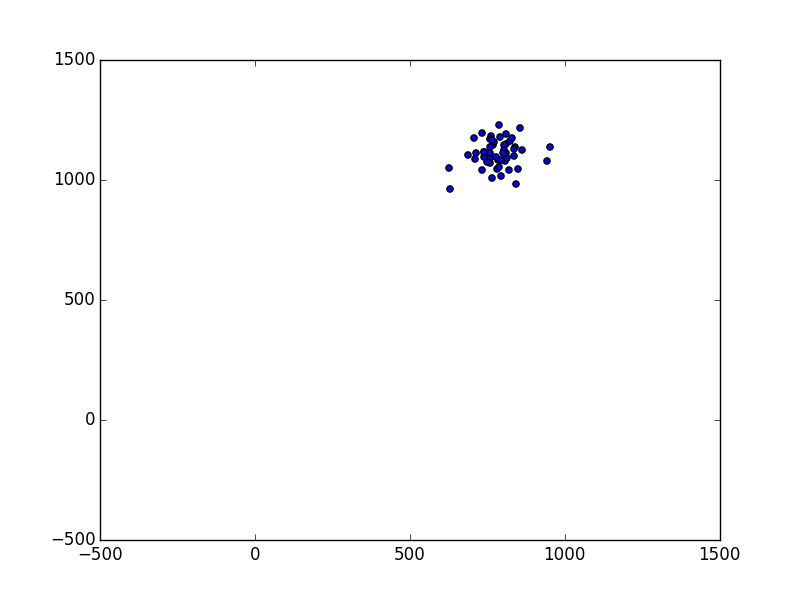
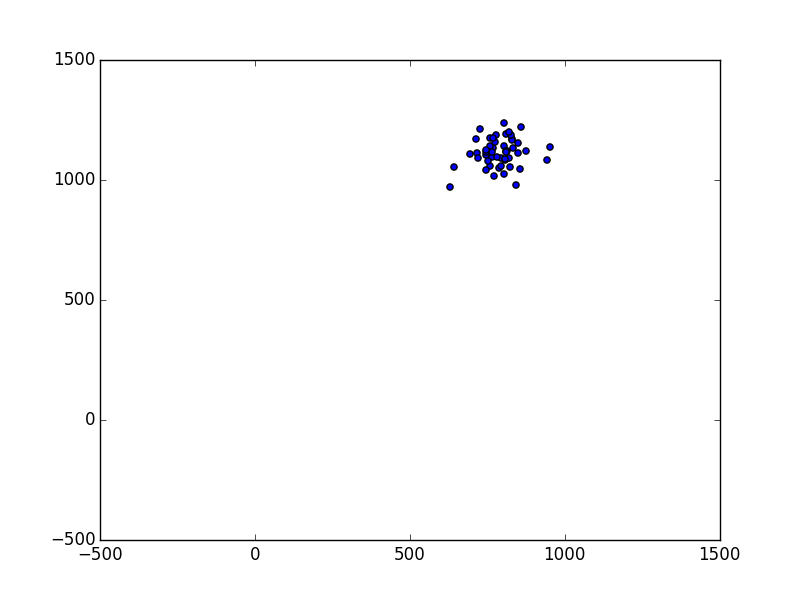
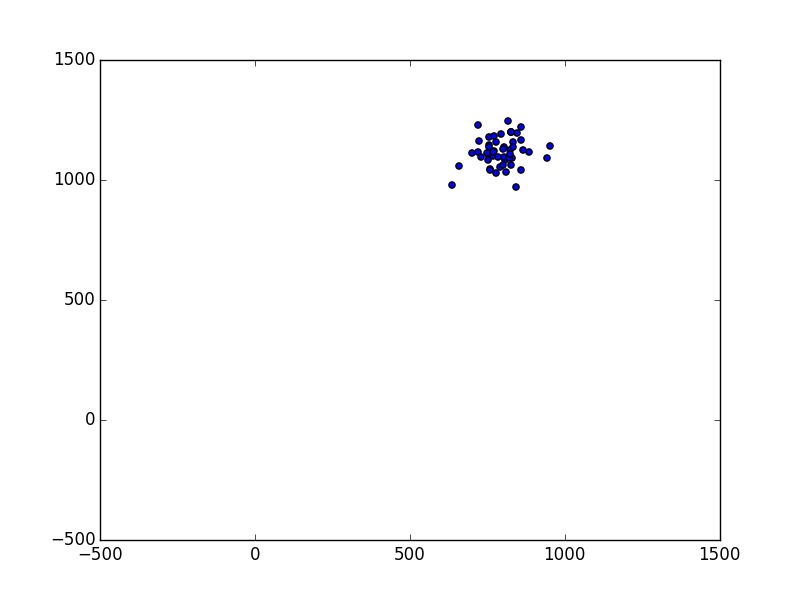
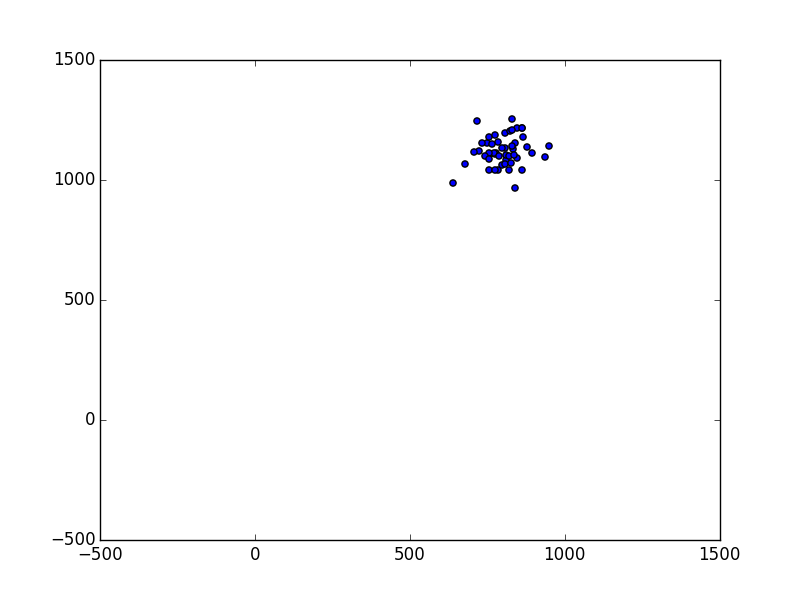
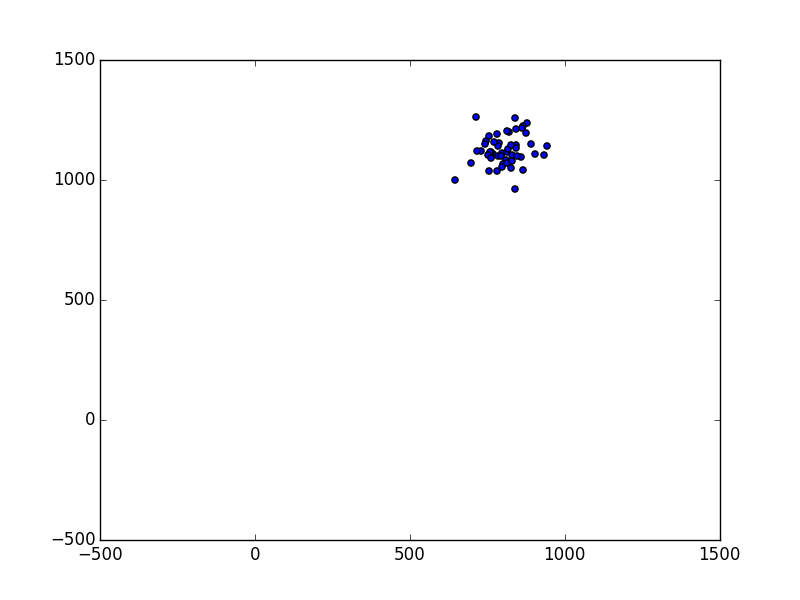
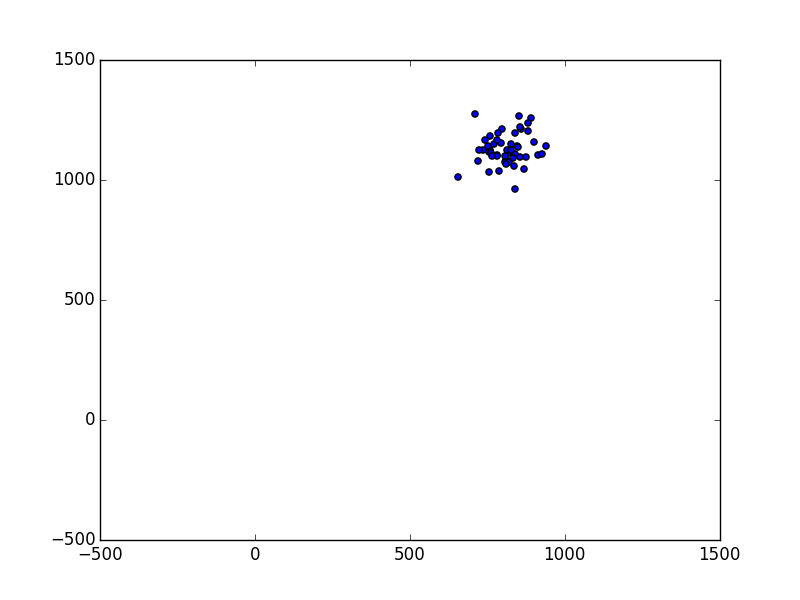
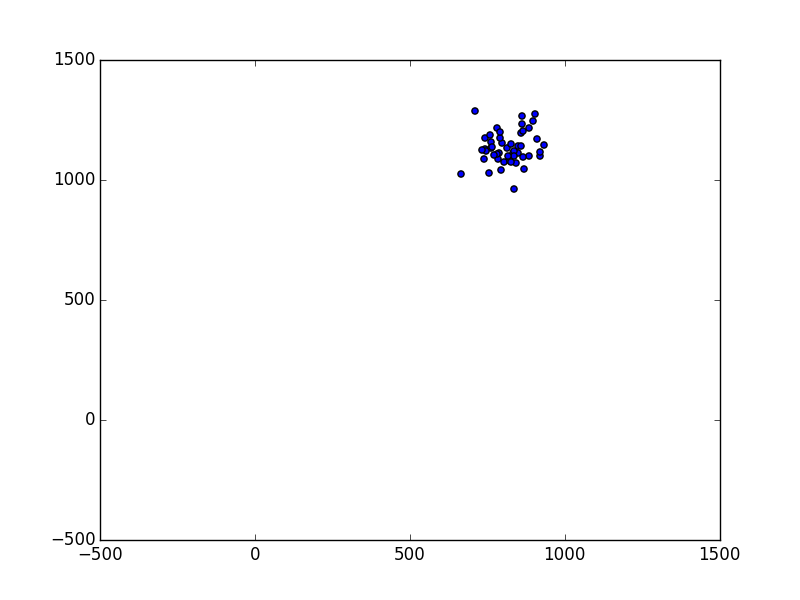
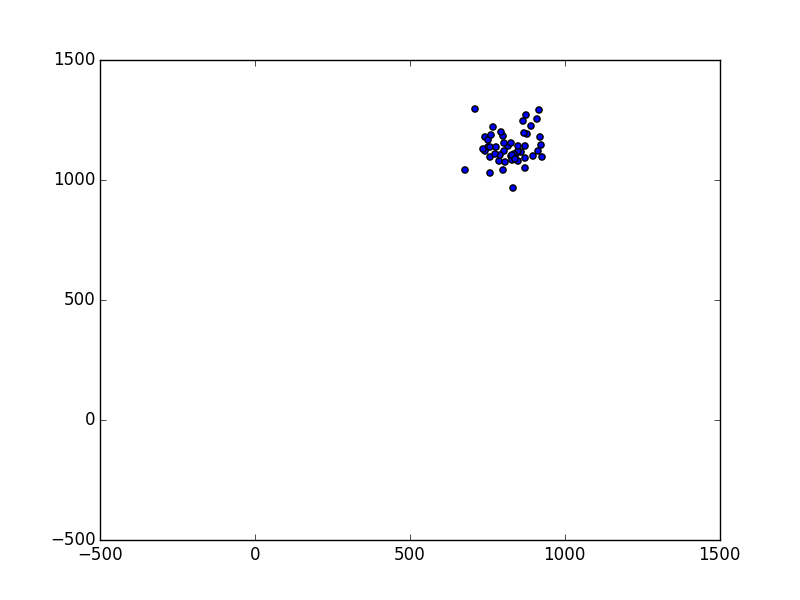
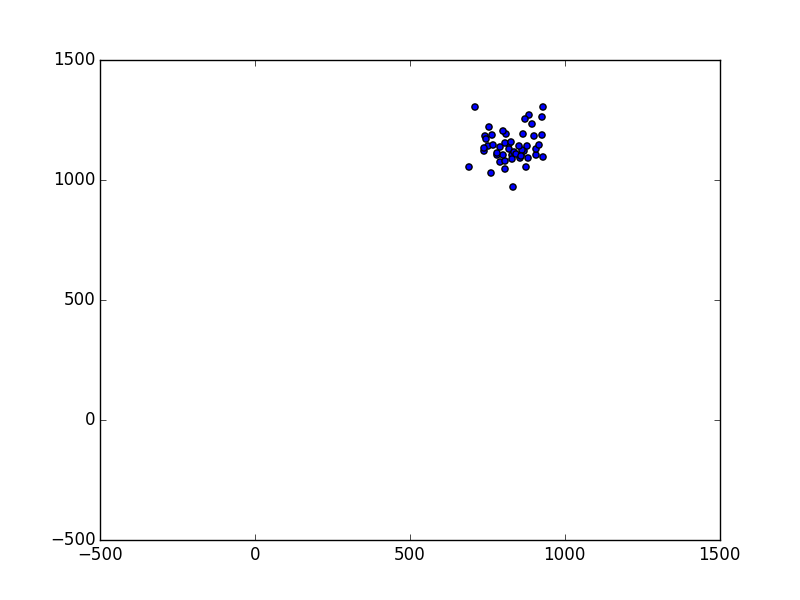
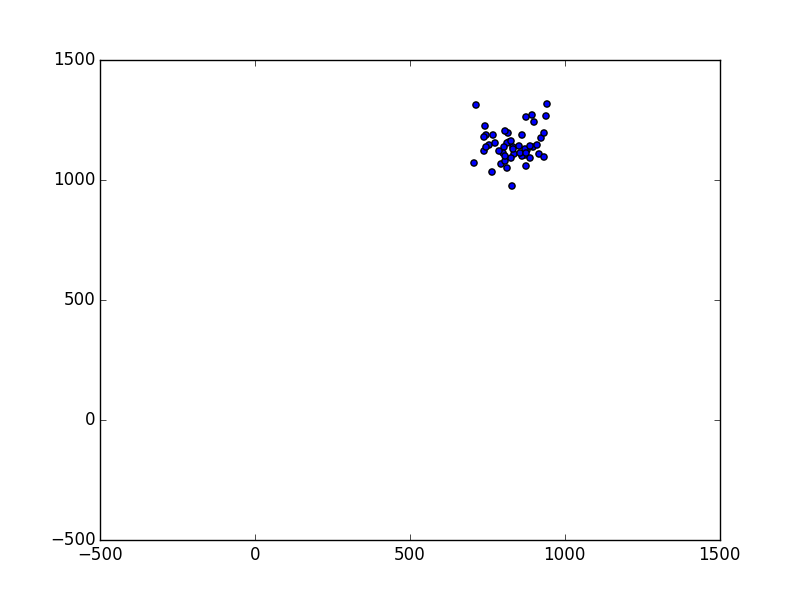
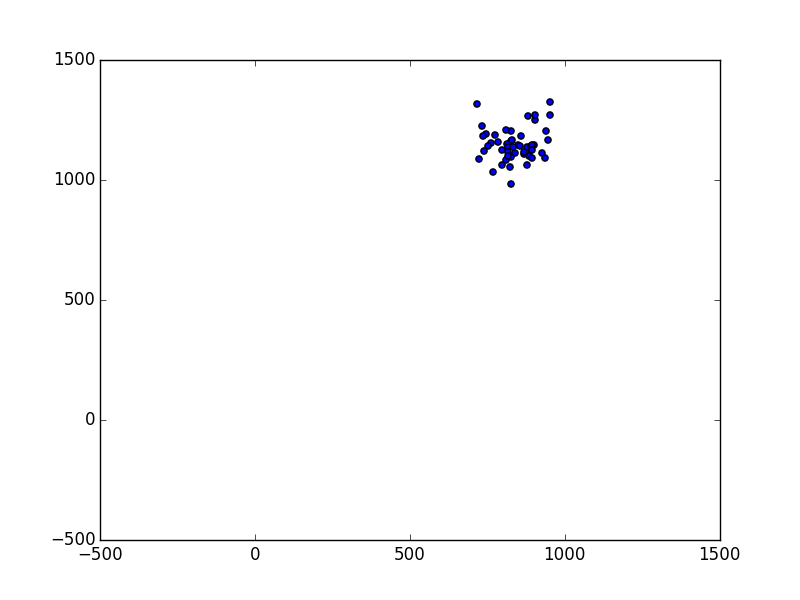
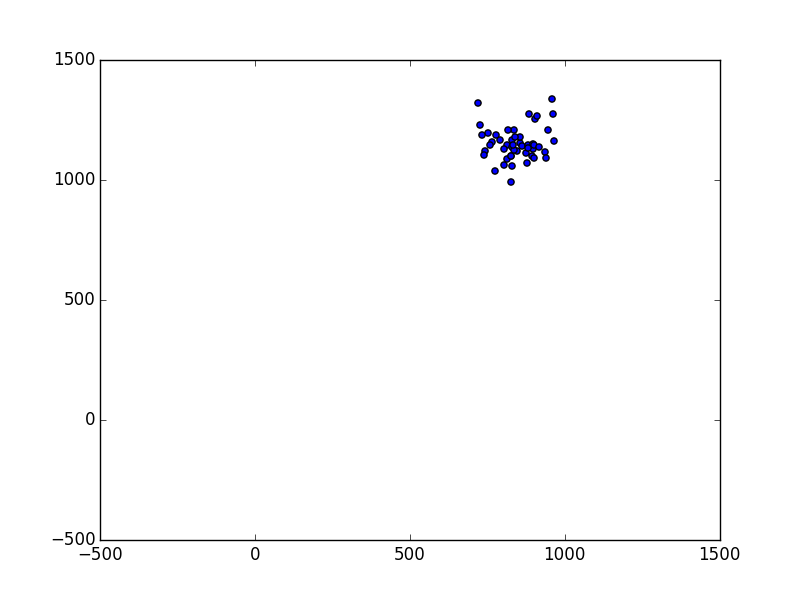
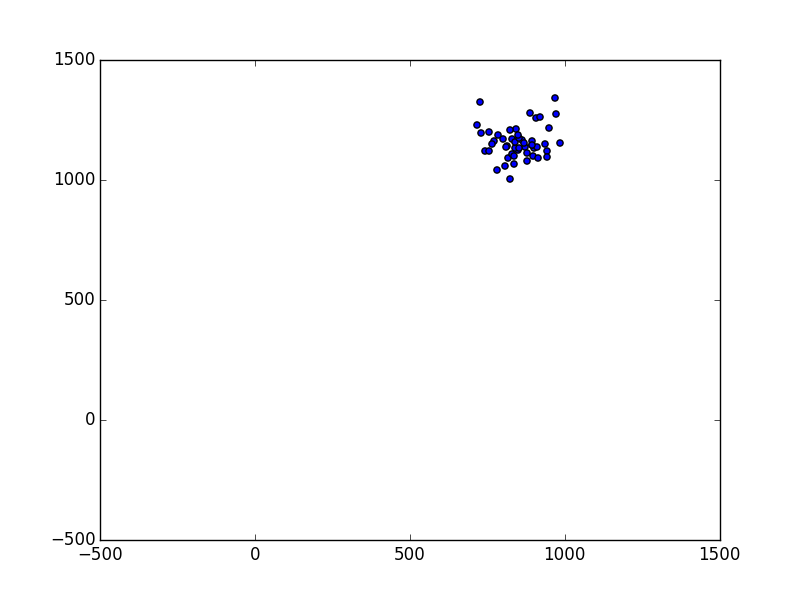
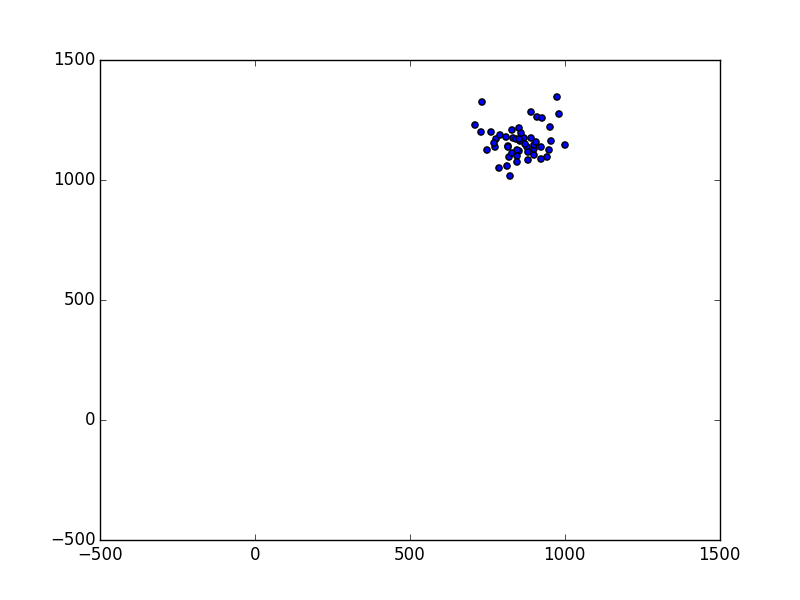
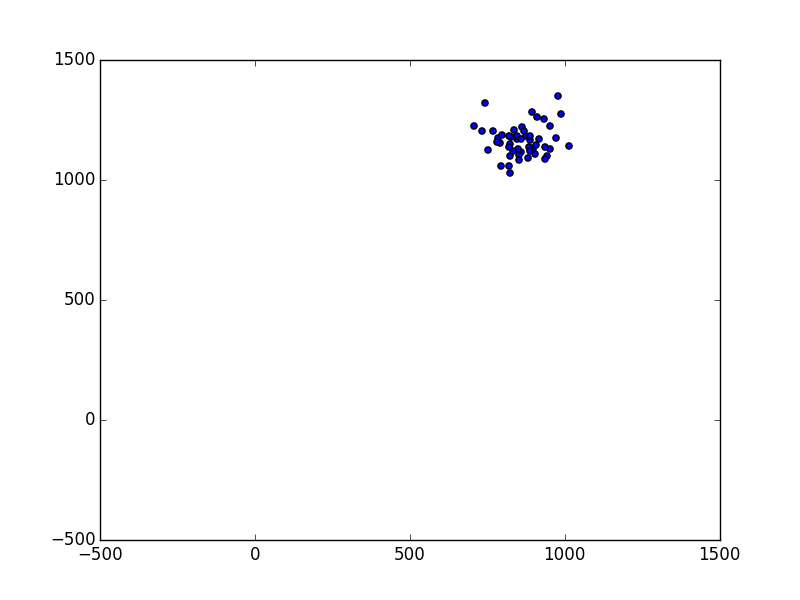
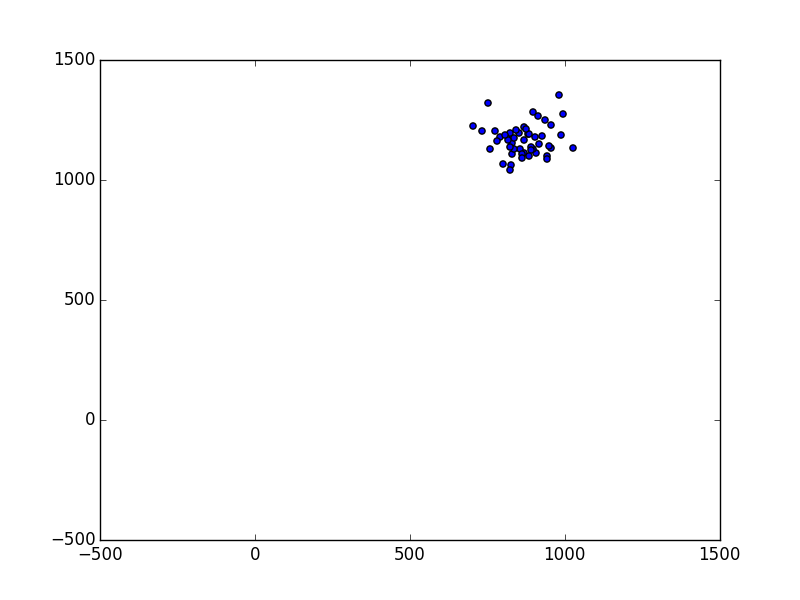
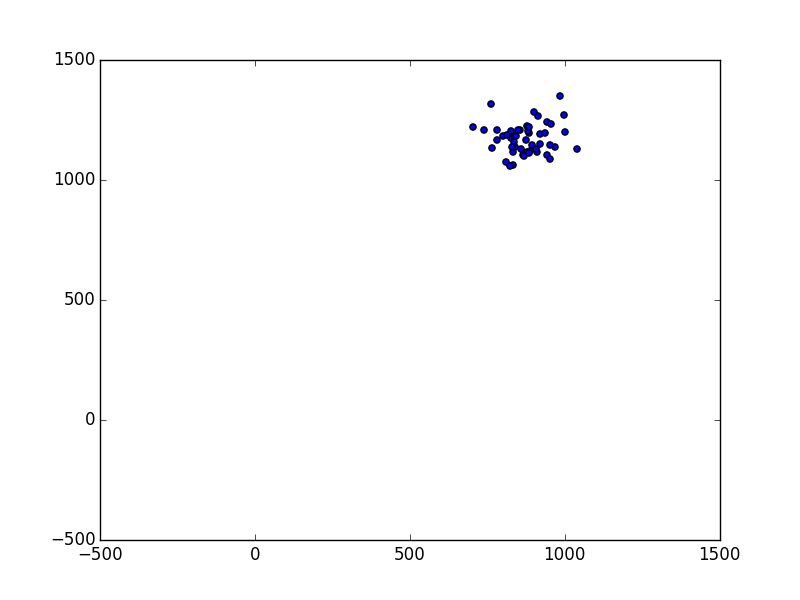
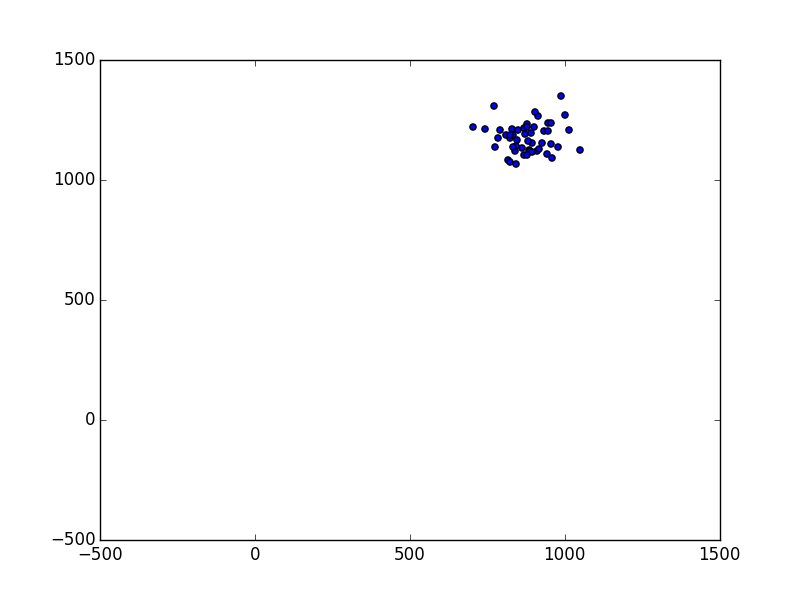
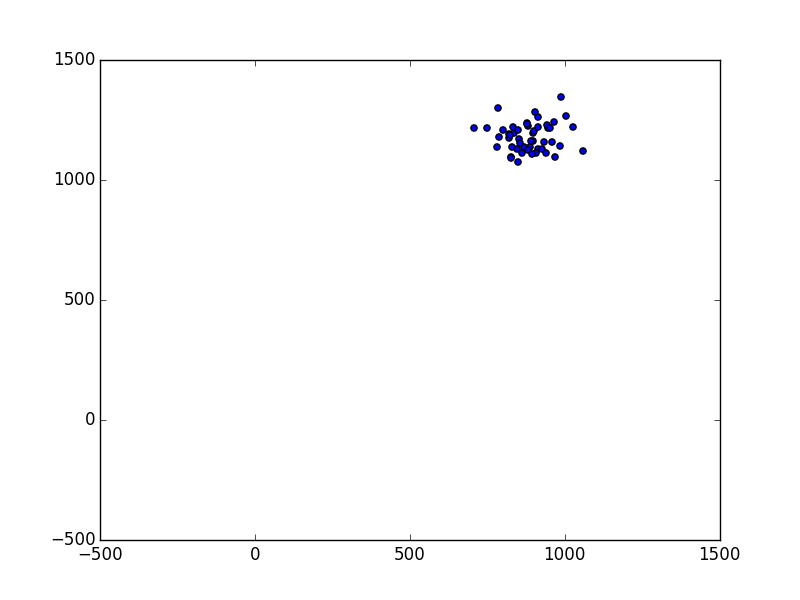
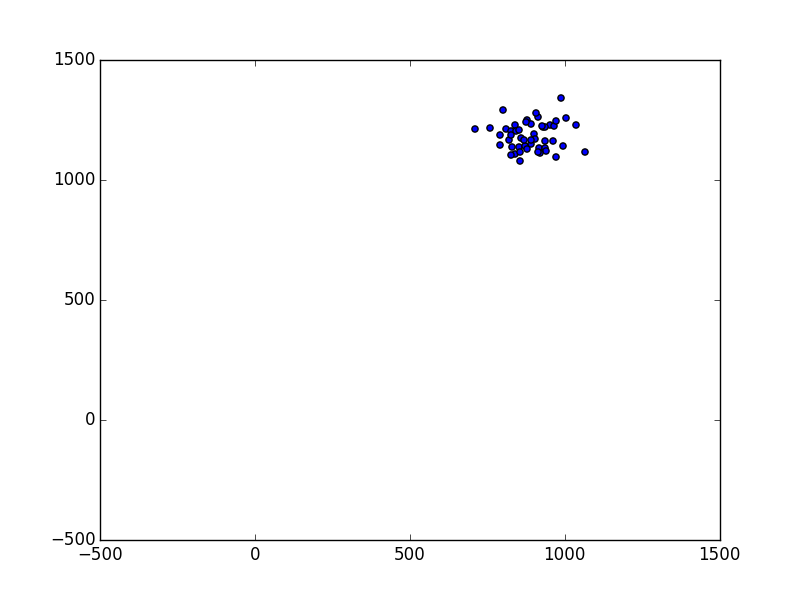
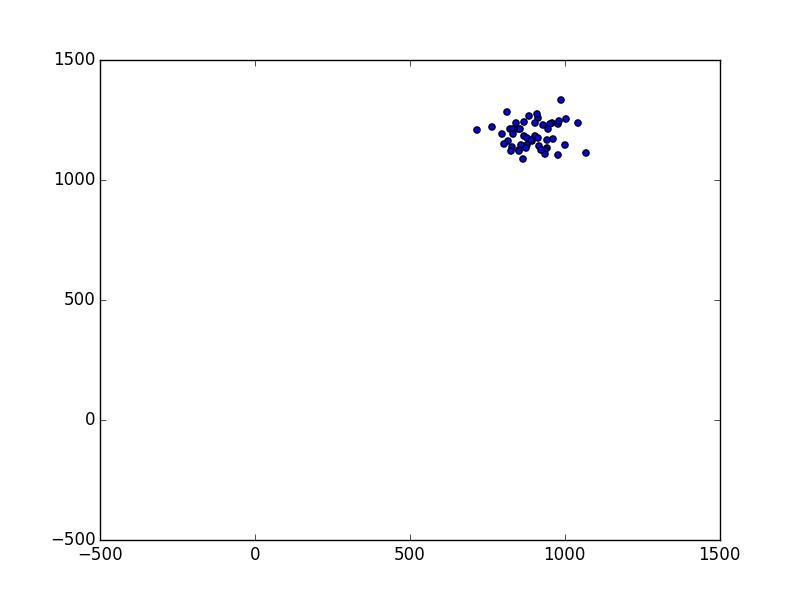
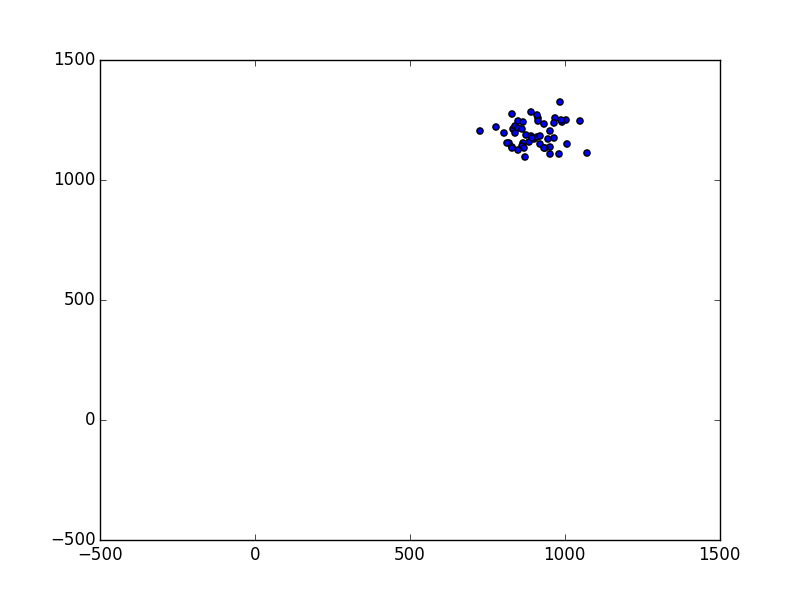
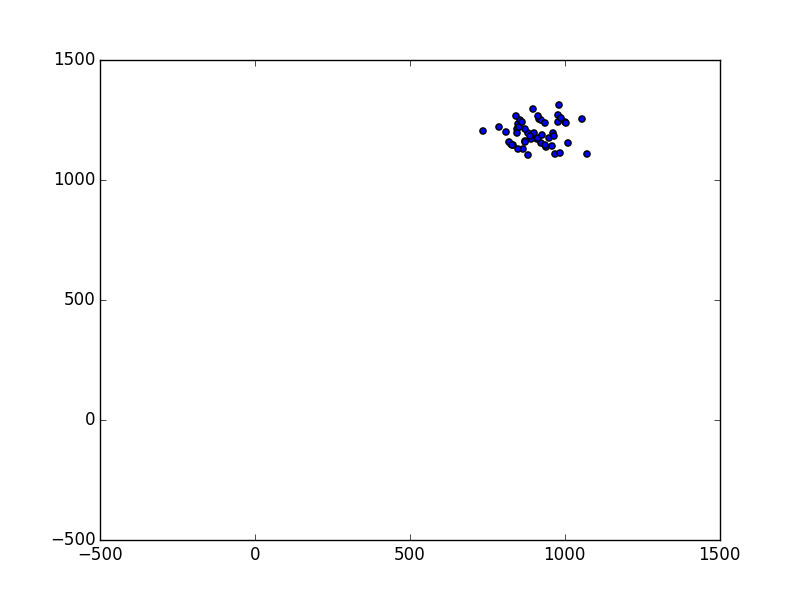
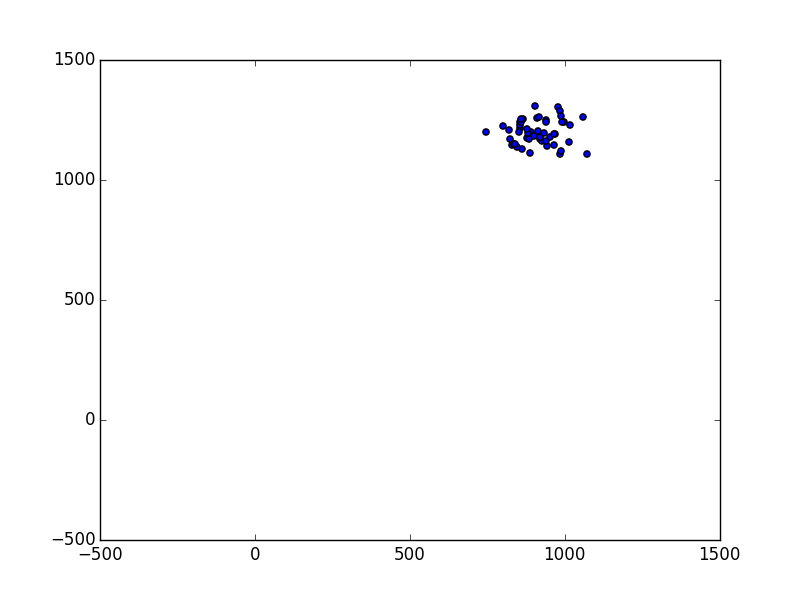
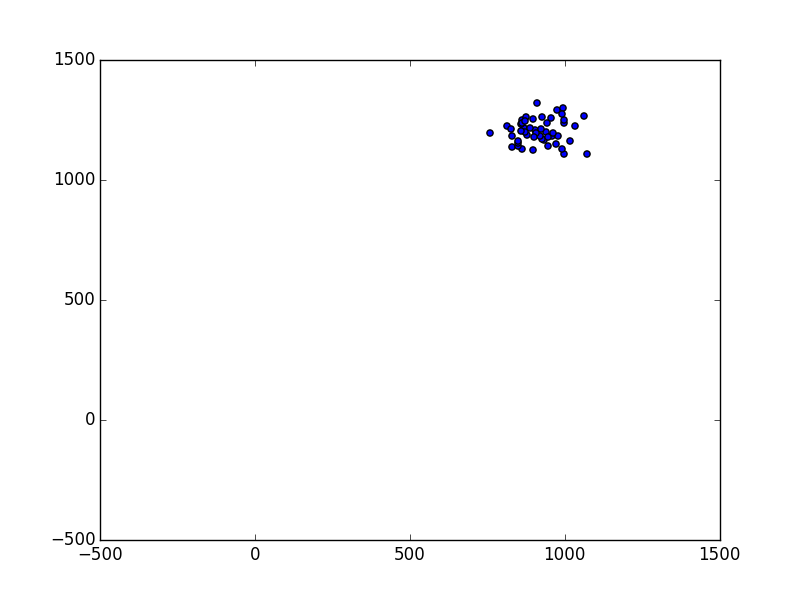
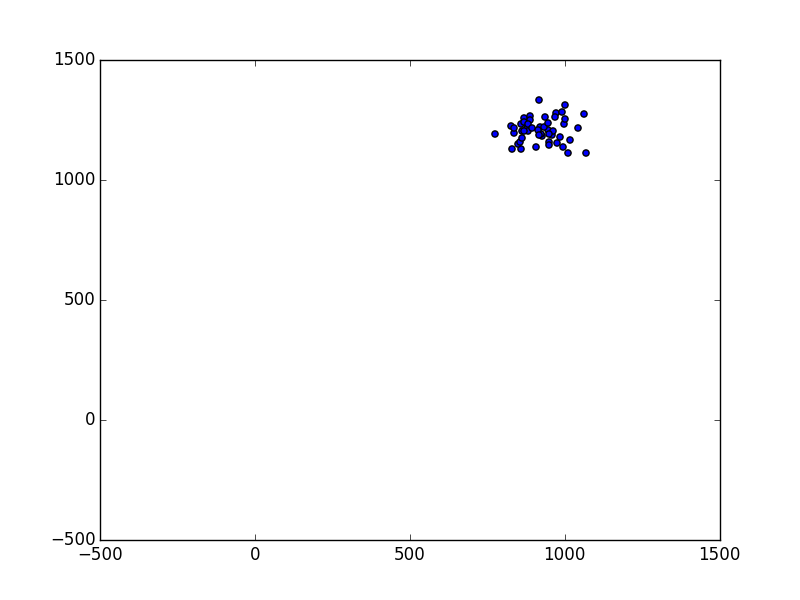
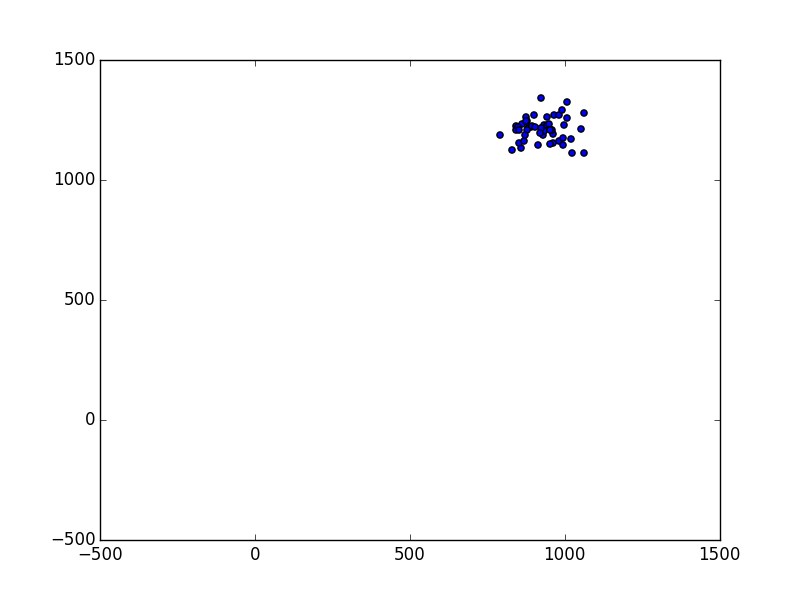
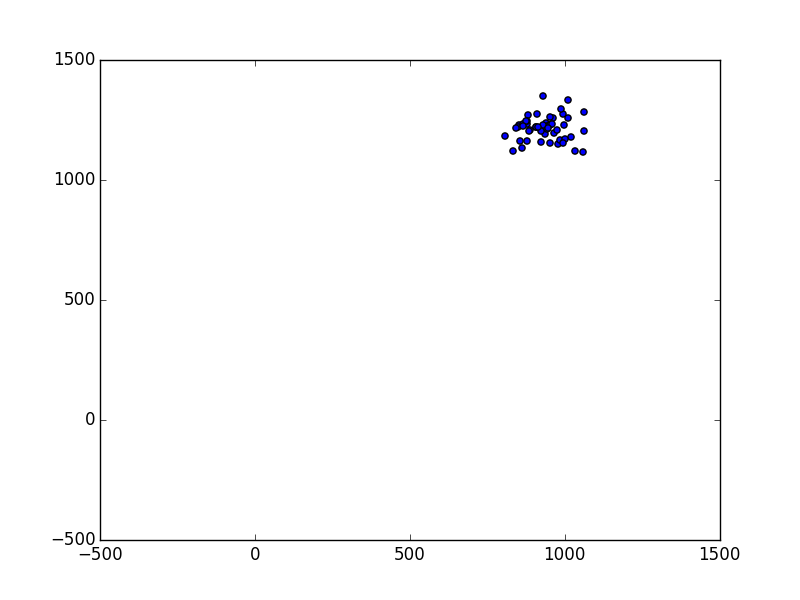

In [3]:
anim


Run bad_boids:


``` bash
cd bad_boids
python bad_boids.py
```


You should be able to see some birds flying around, and then disappearing as they leave the window.


### Your Task


Transform bad_boids into better code, while making sure it still works.


### A regression test


First, have a look at the regression test I made.

To create it, I saved out the before and after state
for one iteration of some boids, using ipython:


``` python
import yaml
import boids
from copy import deepcopy
before=deepcopy(boids.boids)
boids.update_boids(boids.boids)
after=boids.boids
fixture={"before":before,"after":after}
fixture_file=open("fixture.yml",'w')
fixture_file.write(yaml.dump(fixture))
fixture_file.close()
```

### A regression test


Then, I used the fixture file to define the test:


``` python
from boids import update_boids
from nose.tools import assert_equal
import os
import yaml

def test_bad_boids_regression():
    regression_data=yaml.load(open(os.path.join(os.path.dirname(__file__),'fixture.yml')))
    boid_data=regression_data["before"]
    update_boids(boid_data)
    assert_equal(regression_data["after"],boid_data)
```

### Make the regression test fail


Check the tests pass:


``` bash
nosetests
```


Edit the file to make the test fail, see the fail, then reset it:


```
git checkout boids.py
```

### Start Refactoring


Look at the code, consider the [list of refactorings](#refactoring-summary), and make changes

Each time, do a git commit on your fork, and write a commit message explaining the 
refactoring you did.

Try to keep the changes as small as possible.

If your refactoring creates any units, (functions, modules, or classes)
write a unit test for the unit.